# Clustering for gevtev

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from definitions import *
from utils import *

In [2]:
#path_to_gamma_bins shoud contain an absolute path to your gamma-bins directory
path_to_gamma_bins = os.path.dirname(os.getcwd()) + "/"

In [3]:
#name columns included in the final display
other_names = ['gev_1FGL_Name', 'gev_CLASS1', 'tev_fermi_names', 'tev_classes', 's_MAIN_ID', 's_class','s_simbad', 'marked'] + list_xmm_other_columns()
#from gamma bins directory
path_to_catalog = "markeddata/gevtevsimbadxmm_001_normalized.txt"

In [4]:
spectra = pd.read_csv(path_to_gamma_bins + path_to_catalog, sep='\t')
print(path_to_gamma_bins +path_to_catalog)
spectra.head()

/home/masha/PycharmProjects/gamma-bins/markeddata/gevtevsimbadxmm_001_normalized.txt


xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
0          0.081597          0.083385          0.087549          0.080252   
1          0.081538          0.073453          0.073100          0.074908   
2          0.066945          0.059547          0.057954          0.058218   
3          0.073762          0.066913          0.065305          0.065872   
4          0.070027          0.062603          0.060849          0.062475   

   xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
0          0.072789               0.058810            0.053713   
1         -0.000000               0.068704            0.068562   
2          0.062214               0.068519            0.068377   
3          0.078508               0.064035            0.063903   
4          0.067580               0.066680            0.066542   

   gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000   ...    s_class  \
0          0.056084             0.054118           0.054577   ...         []   
1          0.076194             0.070171           0.066850   ...         []   
2          0.075988             0.069982           0.066670   ...         []   
3          0.071016             0.065403           0.062307   ...         []   
4          0.073949             0.068104           0.064880   ...         []   

           gev_1FGL_Name  gev_CLASS1    gev_GLON   gev_GLAT  tev_fermi_names  \
0  b'1FGL J0007.0+7303 '    b'PSR  '  119.662102  10.460557              b''   
1  b'                  '    b'snr  '  120.125992   1.337755              b''   
2  b'                  '    b'snr  '  120.125992   1.337755              b''   
3  b'                  '    b'snr  '  120.125992   1.337755              b''   
4  b'                  '    b'snr  '  120.125992   1.337755              b''   

  tev_classes   tev_glat    tev_glon  marked  
0  b'pwn,snr'  10.203682  119.580254       0  
1      b'snr'   1.412930  120.092361       0  
2      b'snr'   1.412930  120.092361       0  
3      b'snr'   1.412930  120.092361       0  
4      b'snr'   1.412930  120.092361       0  

[5 rows x 30 columns]

In [5]:
spectra = spectra.copy()

In [6]:
spectra = spectra.reset_index(drop=True)

In [7]:
spectrum_columns = list_gev_spectrum_columns() + list_tev_spectrum_columns() + list_xmm_spectra_columns()

In [8]:
def get_distance_metric(metric_function):
    if type(metric_function) == str:
        dist = DistanceMetric.get_metric(metric_function)
    else:
        dist = DistanceMetric.get_metric("pyfunc", func=metric_function)
    return dist

In [9]:
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

In [10]:
colors = list(colors.values())[19:]

* ### earth mover's distance

In [11]:
# earth mover's distance
#metric_function = st.wasserstein_distance
#spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function, n_jobs=6)


In [12]:
from utils import *

In [13]:
#spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

In [14]:
#list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 3, colors,spectra_2D)
#for i in range(len(list_spectra_clusters)):
#    print("{} cluster ({})".format(i, colors[i]))
#    display(list_spectra_clusters[i])
#print("centroids:")
#display(centers)

In [15]:
#for i in range(len(list_spectra_clusters)):
#    print("{} cluster ({})".format(i, colors[i]))
#    display((list_spectra_clusters[i])['gev_1FGL_Name'].unique())
#print("centroids:")
#display(centers)

In [16]:
#spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

In [17]:
#list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.06, colors, spectra_2D)
#for i in range(len(list_spectra_clusters)):
#    print("{} cluster ({})".format(i, colors[i]))
#    display(list_spectra_clusters[i])
#print("centroids:")
#display(centers)

In [18]:
#list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.17, colors, spectra_2D)
#for i in range(len(list_spectra_clusters)):
#    print("{} cluster ({})".format(i, colors[i]))
#    display(list_spectra_clusters[i])
#print("centroids:")
#display(centers)

In [19]:
#spectra_distances.min(), spectra_distances.max()

* ### euclidean distance

In [20]:
# euclidean distance
from scipy.spatial.distance import euclidean
metric_function = "euclidean"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

In [21]:
spectra_distances.min(), spectra_distances.max()

(0.0, 0.39350423792389594)

Clustering


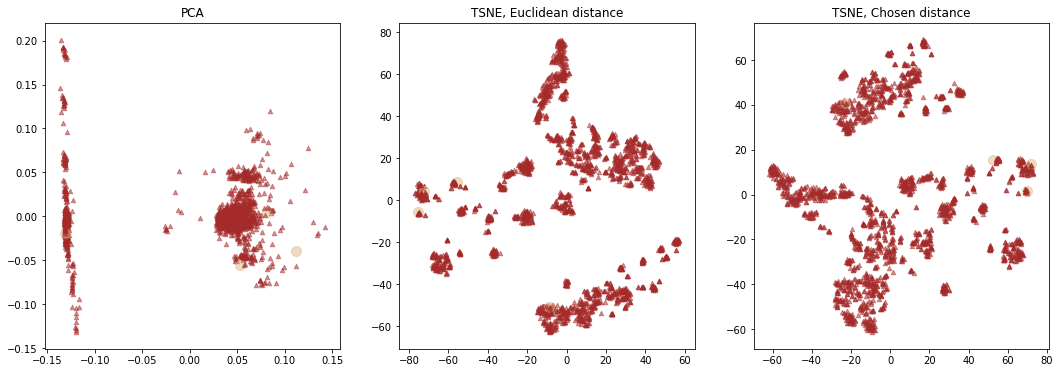

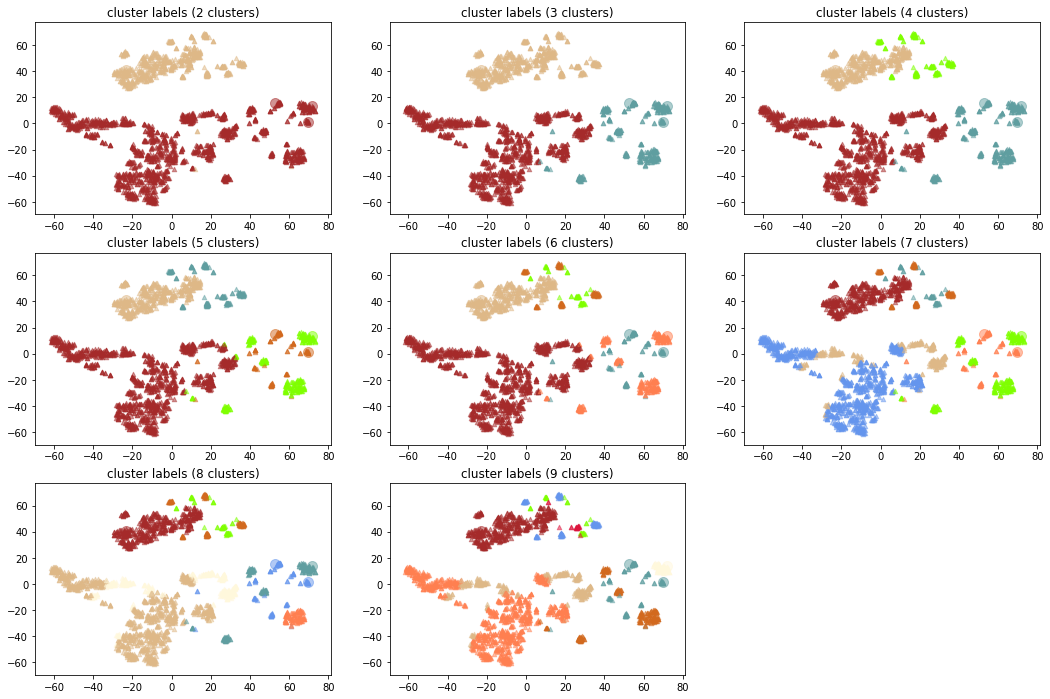

In [22]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)


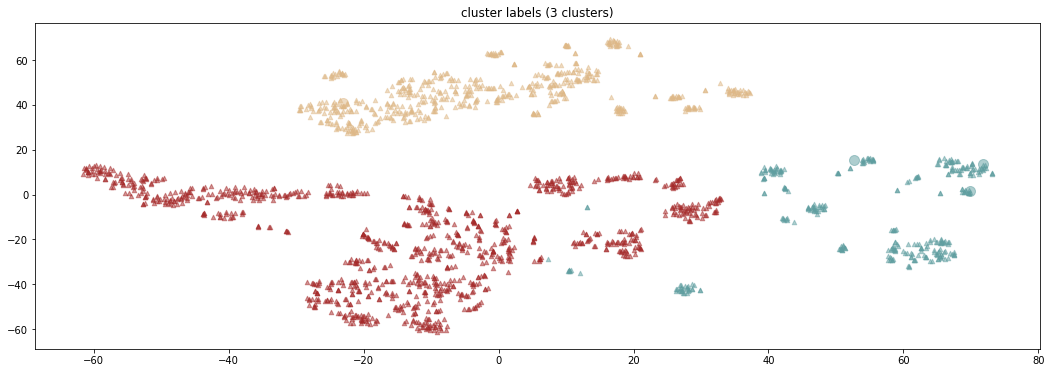

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
209          -0.000000         -0.000000          0.103970         -0.000000   
495          -0.000000          0.090377          0.091078          0.095727   
1610         -0.000000          0.089099          0.086865          0.086916   
1835          0.127572          0.114688          0.111631          0.117882   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
209           0.096625               0.080271            0.071880   
495          -0.000000               0.075041            0.066570   
1610          0.091221               0.070010            0.062826   
1835          0.116053               0.088584            0.079311   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
209           0.070557             0.074300           0.070641   
495           0.066411             0.068538           0.066934   
1610          0.060273             0.066035           0.061373   
1835          0.083231             0.080495           0.080552   

            ...                  gev_1FGL_Name  gev_CLASS1    gev_GLON  \
209         ...          b'1FGL J0240.5+6113 '    b'HMB  '  135.678848   
495         ...          b'                  '    b'PSR  '  284.083496   
1610        ...          b'1FGL J1826.2-1450 '    b'HMB  '   16.885555   
1835        ...          b'1FGL J2032.2+4127 '    b'PSR  '   80.218597   

      gev_GLAT       tev_fermi_names  tev_classes  tev_glat    tev_glon  \
209   1.086277                   b''       b'bin'  1.086135  135.675278   
495  -1.893881  b'1FGL J1018.6-5856'       b'bin' -1.779517  284.314087   
1610 -1.293795                   b''       b'bin' -1.289216   16.881586   
1835  1.018827                   b''      b'unid'  1.111117   80.299477   

     marked  KMeans_clusters_3  
209       1                  2  
495       1                  2  
1610      1                  2  
1835      1                  1  

[4 rows x 31 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
0     b'1FGL J0007.0+7303 '   b'PSR  '             b''  b'pwn,snr'        []   
2     b'                  '   b'snr  '             b''      b'snr'        []   
3     b'                  '   b'snr  '             b''      b'snr'        []   
4     b'                  '   b'snr  '             b''      b'snr'        []   
5     b'                  '   b'snr  '             b''      b'snr'        []   
6     b'                  '   b'snr  '             b''      b'snr'        []   
7     b'                  '   b'snr  '             b''      b'snr'        []   
8     b'                  '   b'snr  '             b''      b'snr'        []   
11    b'                  '   b'snr  '             b''      b'snr'        []   
12    b'                  '   b'snr  '             b''      b'snr'        []   
13    b'                  '   b'snr  '             b''      b'snr'        []   
14    b'                  '   b'snr  '             b''      b'snr'        []   
15    b'                  '   b'snr  '             b''      b'snr'        []   
16    b'                  '   b'snr  '             b''      b'snr'        []   
17    b'                  '   b'snr  '             b''      b'snr'        []   
18    b'                  '   b'snr  '             b''      b'snr'        []   
21    b'                  '   b'snr  '             b''      b'snr'        []   
22    b'                  '   b'snr  '             b''      b'snr'        []   
23    b'                  '   b'snr  '             b''      b'snr'        []   
24    b'                  '   b'snr  '             b''      b'snr'        []   
25    b'                  '   b'snr  '             b''      b'snr'        []   
26    b'                  '   b'snr  '             b''      b'snr'        []   
27    b'                  '   b'snr  '             b''      b'snr'        []   
28    b'                  '   b'snr  '             b''      b'snr'        []   
29    b'                  '   b'snr  '             b''      b'snr'        []   
31    b'                  '   b'snr  '             b''      b'snr'        []   
33    b'                  '   b'snr  '             b''      b'snr'        []   
34    b'                  '   b'snr  '             b''      b'snr'        []   
35    b'                  '   b'snr  '             b''      b'snr'        []   
36    b'                  '   b'snr  '             b''      b'snr'        []   
...                     ...        ...             ...         ...       ...   
1940  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1941  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1942  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1943  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1944  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1945  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1946  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1947  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1949  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1951  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1953  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1954  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1955  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1956  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1957  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1958  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1959  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1960  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1961  b'1FGL J

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
100   b'1FGL J0035.9+5951 '   b'bll  '             b''       b'hbl'   
101   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
102   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
103   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
104   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
105   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
106   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
107   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
108   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
109   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
110   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
111   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
112   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
113   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
114   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
115   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
116   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
117   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
118   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
119   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
120   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
121   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
122   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
123   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
124   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
125   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
126   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
127   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
128   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
129   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
...                     ...        ...             ...          ...   
1818  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1819  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1820  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1821  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1822  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1823  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1824  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1825  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1826  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1827  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1828  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1829  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1830  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1831  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1835  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1836  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1837  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1838  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1839  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1840  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1841  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1842  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1843  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1844  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1845  b'1FGL J2032.2+4127 '   b'PSR  '

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1     b'                  '   b'snr  '             b''      b'snr'   
9     b'                  '   b'snr  '             b''      b'snr'   
10    b'                  '   b'snr  '             b''      b'snr'   
19    b'                  '   b'snr  '             b''      b'snr'   
20    b'                  '   b'snr  '             b''      b'snr'   
30    b'                  '   b'snr  '             b''      b'snr'   
32    b'                  '   b'snr  '             b''      b'snr'   
37    b'                  '   b'snr  '             b''      b'snr'   
44    b'                  '   b'snr  '             b''      b'snr'   
45    b'                  '   b'snr  '             b''      b'snr'   
52    b'                  '   b'snr  '             b''      b'snr'   
55    b'                  '   b'snr  '             b''      b'snr'   
56    b'                  '   b'snr  '             b''      b'snr'   
84    b'                  '   b'snr  '             b''      b'snr'   
85    b'                  '   b'snr  '             b''      b'snr'   
197   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
207   b'                  '   b'bll  '             b''      b'hbl'   
209   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
211   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
212   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
214   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
218   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
224   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
225   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
229   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
233   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
271   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'   
273   b'                  '   b'     '             b''   b'snr,mc'   
275   b'                  '   b'     '             b''   b'snr,mc'   
276   b'                  '   b'     '             b''   b'snr,mc'   
...                     ...        ...             ...         ...   
1770  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1773  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1780  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1786  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1792  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1798  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
1800  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
1814  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
1832  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'   
1833  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'   
1834  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'   
1859  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1860  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1862  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1867  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1870  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1877  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1879  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1900  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1902  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1909  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1917  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1920  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1921  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1932  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1937  b'1FGL J2323.4+584

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0               0.060519            0.058717          0.063775   
1               0.099367            0.091640          0.092748   
2               0.068512            0.064662          0.070087   

   gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0             0.059232           0.058816              0.0    0.060084   
1             0.093475           0.091497              0.0    0.000000   
2             0.065681           0.064649              0.0    0.067319   

   tev_1TeV  tev_3TeV  tev_10TeV  tev_30TeV  xmm_SC_EP_1_FLUX  \
0  0.062146  0.063920   0.066611   0.069444          0.079376   
1  0.000000  0.000000   0.000000   0.000000          0.114342   
2  0.069113  0.070106   0.069867   0.071418          0.059831   

   xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  xmm_SC_EP_5_FLUX  
0          0.076949          0.074758          0.073079          0.072572  
1          0.109901          0.108057          0.102069          0.096904  
2          0.069139          0.071383          0.069007          0.049228

In [23]:
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 3, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [24]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display((list_spectra_clusters[i])['gev_1FGL_Name'].unique())

0 cluster (#A52A2A)


array(["b'1FGL J0007.0+7303 '", "b'                  '",
       "b'1FGL J0222.6+4302 '", "b'1FGL J0240.5+6113 '",
       "b'1FGL J0416.8+0107 '", "b'1FGL J0617.2+2233 '",
       "b'1FGL J0721.9+7120 '", "b'1FGL J0854.0-4632 '",
       "b'1FGL J1015.1+4927 '", "b'1FGL J1103.7-2329 '",
       "b'1FGL J1104.4+3812 '", "b'1FGL J1136.6+7009 '",
       "b'1FGL J1221.5+2814 '", "b'1FGL J1256.2-0547 '",
       "b'1FGL J1418.7-6057 '", "b'1FGL J1428.7+4239 '",
       "b'1FGL J1513.2-5904 '", "b'1FGL J1555.7+1111 '",
       "b'1FGL J1614.7-5138c'", "b'1FGL J1617.5-5105c'",
       "b'1FGL J1626.0-4917c'", "b'1FGL J1653.9+3945 '",
       "b'1FGL J1711.7-3944c'", "b'1FGL J1714.5-3830c'",
       "b'1FGL J1718.2-3825 '", "b'1FGL J1801.3-2322c'",
       "b'1FGL J1803.1-2147c'", "b'1FGL J1808.5-1954c'",
       "b'1FGL J1826.1-1256 '", "b'1FGL J1825.7-1410c'",
       "b'1FGL J1826.2-1450 '", "b'1FGL J1834.3-0842c'",
       "b'1FGL J1837.5-0659c'", "b'1FGL J1910.9+0906c'",
       "b'1FGL J2009.5-4849 '",

1 cluster (#DEB887)


array(["b'1FGL J0035.9+5951 '", "b'1FGL J0047.3-2512 '",
       "b'1FGL J0205.6+6449 '", "b'                  '",
       "b'1FGL J0319.7+4130 '", "b'1FGL J0633.9+1746 '",
       "b'1FGL J0650.7+2503 '", "b'1FGL J0956.5+6938 '",
       "b'1FGL J1000.1+6539 '", "b'1FGL J1119.4-6127c'",
       "b'1FGL J1221.3+3008 '", "b'1FGL J1230.8+1223 '",
       "b'1FGL J1322.0-4515 '", "b'1FGL J1747.9-2448 '",
       "b'1FGL J1813.3-1246 '", "b'1FGL J1834.3-0842c'",
       "b'1FGL J1833.5-1034 '", "b'1FGL J1850.2-0019c'",
       "b'1FGL J1922.9+1411 '", "b'1FGL J2000.0+6508 '",
       "b'1FGL J2001.1+4351 '", "b'1FGL J2021.0+3651 '",
       "b'1FGL J2032.2+4127 '"], dtype=object)

2 cluster (#5F9EA0)


array(["b'                  '", "b'1FGL J0222.6+4302 '",
       "b'1FGL J0240.5+6113 '", "b'1FGL J0416.8+0107 '",
       "b'1FGL J0617.2+2233 '", "b'1FGL J0721.9+7120 '",
       "b'1FGL J0854.0-4632 '", "b'1FGL J1015.1+4927 '",
       "b'1FGL J1104.4+3812 '", "b'1FGL J1221.5+2814 '",
       "b'1FGL J1418.7-6057 '", "b'1FGL J1428.7+4239 '",
       "b'1FGL J1513.2-5904 '", "b'1FGL J1555.7+1111 '",
       "b'1FGL J1614.7-5138c'", "b'1FGL J1617.5-5105c'",
       "b'1FGL J1626.0-4917c'", "b'1FGL J1653.9+3945 '",
       "b'1FGL J1711.7-3944c'", "b'1FGL J1714.5-3830c'",
       "b'1FGL J1718.2-3825 '", "b'1FGL J1801.3-2322c'",
       "b'1FGL J1808.5-1954c'", "b'1FGL J1826.1-1256 '",
       "b'1FGL J1825.7-1410c'", "b'1FGL J1826.2-1450 '",
       "b'1FGL J1834.3-0842c'", "b'1FGL J1837.5-0659c'",
       "b'1FGL J1848.1-0145c'", "b'1FGL J1907.9+0602 '",
       "b'1FGL J1910.9+0906c'", "b'1FGL J2009.5-4849 '",
       "b'1FGL J2015.7+3708 '", "b'1FGL J2020.0+4049 '",
       "b'1FGL J2323.4+5849 '",

In [25]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display((list_spectra_clusters[i])['s_MAIN_ID'].unique())

0 cluster (#A52A2A)


array(['[]', '["b\'LS   I +61  303\'" "b\'LS   I +61  303\'"]',
       '["b\'HD  43582\'"]', '["b\'2FGL J1019.0-5856\'"]',
       '["b\'MSX6C G331.5487-00.5364\'" "b\'MSX6C G331.5487-00.5364\'"]',
       '["b\'2FHL J1633.5-4746e\'"]',
       '["b\'SSTGC 519103\'" "b\'SSTGC 519103\'" "b\'GCIRS  1W\'" "b\'GCIRS  8\'"]',
       '["b\'[MCD2010] 18\'" "b\'[MCD2010] 13\'"]',
       '["b\'V* V479 Sct\'"]',
       '["b\'LS  IV -05   11\'" "b\'[KRL2007b] 332\'"]',
       '["b\'[KKM2013] 7\'"]'], dtype=object)

1 cluster (#DEB887)


array(['[]',
       '["b\'[CHP2004] J095549.8+693934\'" "b\'[MTK2001b] 8\'"\n "b\'[CHP2004] J095637.5+694137\'" "b\'CXOU J095601.7+694308\'"\n "b\'CXOU J095548.9+694010\'" "b\'CXOU J095527.1+693923\'"\n "b\'CXOU J095552.8+694020\'" "b\'CXOU J095552.4+694024\'"\n "b\'CXOU J095550.7+694039\'" "b\'CXOU J095547.5+694120\'"\n "b\'CXOU J095527.2+694050\'" "b\'CXOU J095600.7+694107\'"\n "b\'CXOU J095549.1+694036\'" "b\'CXOU J095546.5+694040\'"\n "b\'CXOU J095552.7+694045\'" "b\'CXOU J095622.7+694134\'"\n "b\'CXOU J095551.4+694035\'" "b\'CXOU J095553.0+694048\'"\n "b\'CXOU J095614.7+694249\'" "b\'CXOU J095550.5+694056\'"\n "b\'CXOU J095544.8+694100\'" "b\'CXOU J095550.2+694039\'"\n "b\'[RVZ2004] 40.49+57.4\'" "b\'CXOU J095615.1+693951\'"\n "b\'[SST2011] J095554.56+694100.4\'" "b\'CXOU J095550.9+694044\'"\n "b\'CXOU J095552.2+694042\'" "b\'CXOU J095621.2+694224\'"\n "b\'CXOU J095554.1+694039\'" "b\'SN 2004am\'"\n "b\'[SST2011] J095552.13+694053.1\'" "b\'CXOU J095534.5+693823\'"\n "b\'CXOU J0955

2 cluster (#5F9EA0)


array(['[]', '["b\'LS   I +61  303\'" "b\'LS   I +61  303\'"]',
       '["b\'HD  43582\'"]', '["b\'2FGL J1019.0-5856\'"]',
       '["b\'MSX6C G331.5487-00.5364\'" "b\'MSX6C G331.5487-00.5364\'"]',
       '["b\'2FHL J1633.5-4746e\'"]',
       '["b\'SSTGC 519103\'" "b\'SSTGC 519103\'" "b\'GCIRS  1W\'" "b\'GCIRS  8\'"]',
       '["b\'[MCD2010] 18\'" "b\'[MCD2010] 13\'"]',
       '["b\'V* V479 Sct\'"]',
       '["b\'LS  IV -05   11\'" "b\'[KRL2007b] 332\'"]',
       '["b\'[KKM2013] 7\'"]'], dtype=object)

[1.0, 0.8, 0.6000000000000001, 0.4, 0.2, 0.1, 0.01]


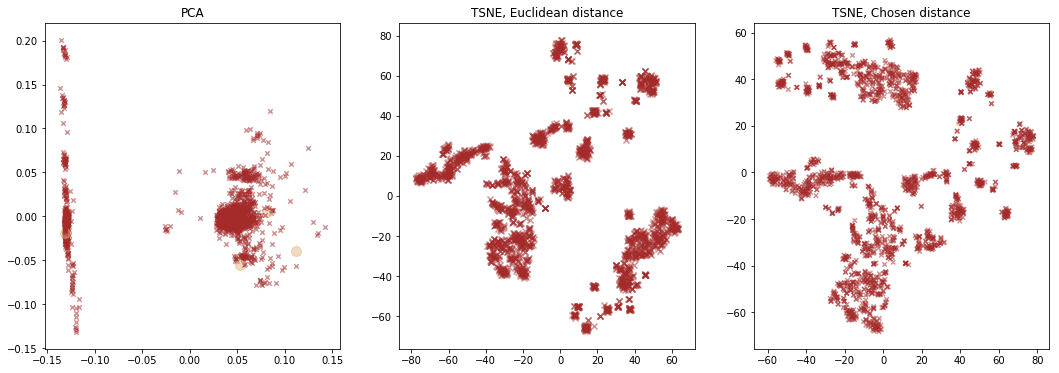

Clustering


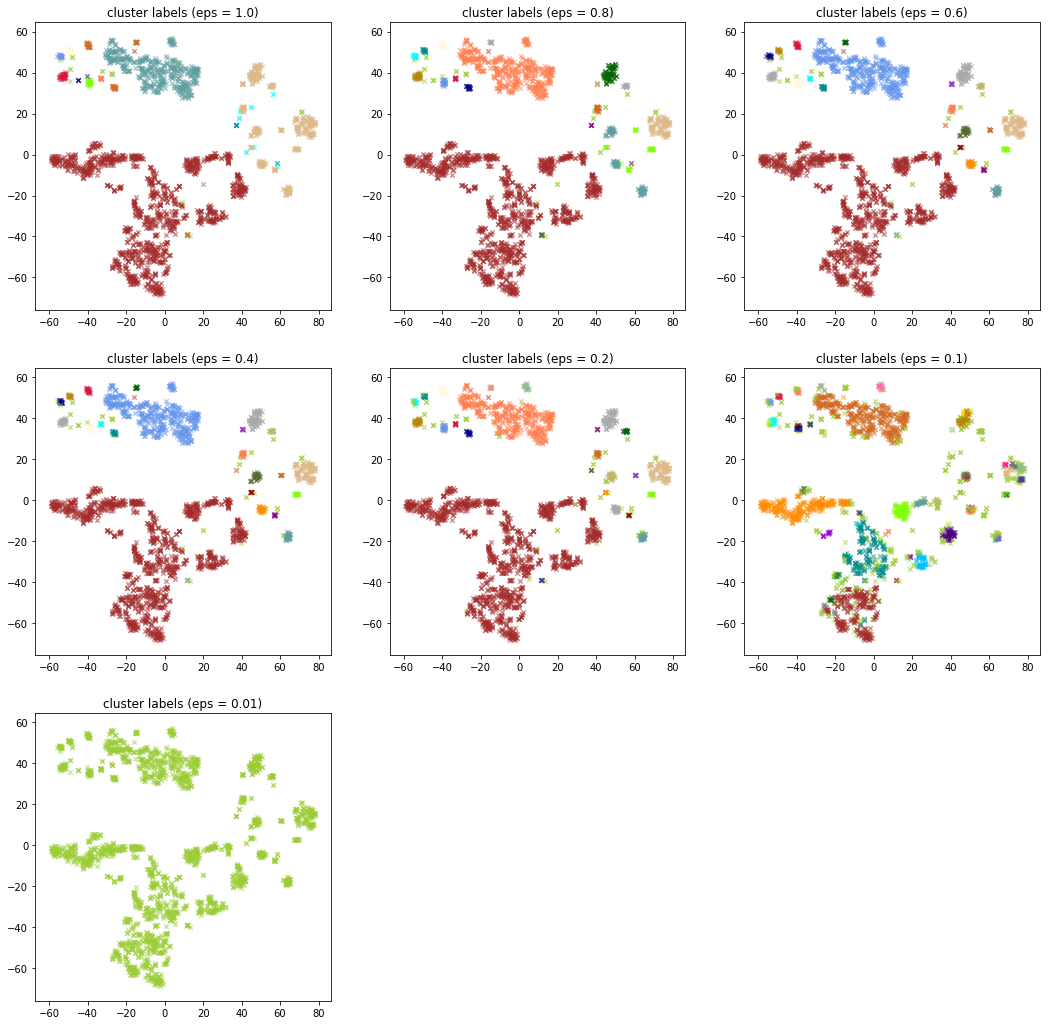

In [26]:
eps_l = [0.1 * i for i in range(10, 0, -2)] + [0.1] + [0.01]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)


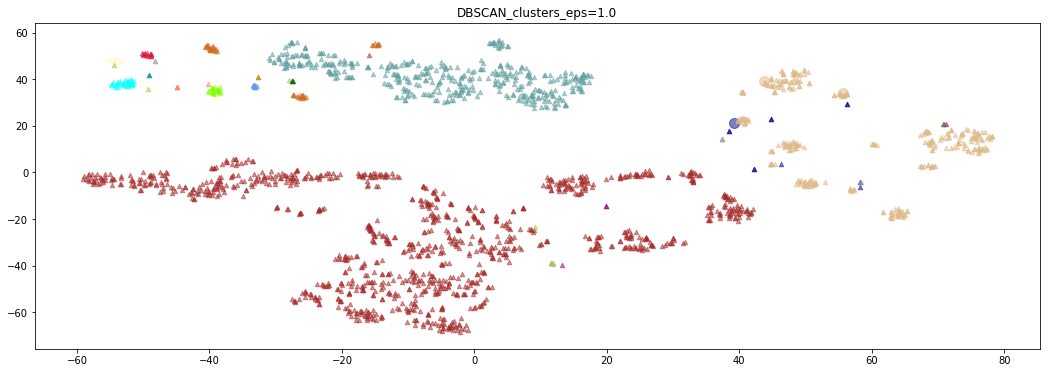

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
209          -0.000000         -0.000000          0.103970         -0.000000   
495          -0.000000          0.090377          0.091078          0.095727   
1610         -0.000000          0.089099          0.086865          0.086916   
1835          0.127572          0.114688          0.111631          0.117882   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
209           0.096625               0.080271            0.071880   
495          -0.000000               0.075041            0.066570   
1610          0.091221               0.070010            0.062826   
1835          0.116053               0.088584            0.079311   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
209           0.070557             0.074300           0.070641   
495           0.066411             0.068538           0.066934   
1610          0.060273             0.066035           0.061373   
1835          0.083231             0.080495           0.080552   

               ...                     gev_1FGL_Name  gev_CLASS1    gev_GLON  \
209            ...             b'1FGL J0240.5+6113 '    b'HMB  '  135.678848   
495            ...             b'                  '    b'PSR  '  284.083496   
1610           ...             b'1FGL J1826.2-1450 '    b'HMB  '   16.885555   
1835           ...             b'1FGL J2032.2+4127 '    b'PSR  '   80.218597   

      gev_GLAT       tev_fermi_names  tev_classes  tev_glat    tev_glon  \
209   1.086277                   b''       b'bin'  1.086135  135.675278   
495  -1.893881  b'1FGL J1018.6-5856'       b'bin' -1.779517  284.314087   
1610 -1.293795                   b''       b'bin' -1.289216   16.881586   
1835  1.018827                   b''      b'unid'  1.111117   80.299477   

     marked  DBSCAN_clusters_eps=1.0  
209       1                       10  
495       1                        1  
1610      1                        1  
1835      1                        2  

[4 rows x 31 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
0     b'1FGL J0007.0+7303 '   b'PSR  '             b''  b'pwn,snr'        []   
2     b'                  '   b'snr  '             b''      b'snr'        []   
3     b'                  '   b'snr  '             b''      b'snr'        []   
4     b'                  '   b'snr  '             b''      b'snr'        []   
5     b'                  '   b'snr  '             b''      b'snr'        []   
6     b'                  '   b'snr  '             b''      b'snr'        []   
7     b'                  '   b'snr  '             b''      b'snr'        []   
8     b'                  '   b'snr  '             b''      b'snr'        []   
11    b'                  '   b'snr  '             b''      b'snr'        []   
12    b'                  '   b'snr  '             b''      b'snr'        []   
13    b'                  '   b'snr  '             b''      b'snr'        []   
14    b'                  '   b'snr  '             b''      b'snr'        []   
15    b'                  '   b'snr  '             b''      b'snr'        []   
16    b'                  '   b'snr  '             b''      b'snr'        []   
17    b'                  '   b'snr  '             b''      b'snr'        []   
18    b'                  '   b'snr  '             b''      b'snr'        []   
21    b'                  '   b'snr  '             b''      b'snr'        []   
22    b'                  '   b'snr  '             b''      b'snr'        []   
23    b'                  '   b'snr  '             b''      b'snr'        []   
24    b'                  '   b'snr  '             b''      b'snr'        []   
25    b'                  '   b'snr  '             b''      b'snr'        []   
26    b'                  '   b'snr  '             b''      b'snr'        []   
27    b'                  '   b'snr  '             b''      b'snr'        []   
28    b'                  '   b'snr  '             b''      b'snr'        []   
29    b'                  '   b'snr  '             b''      b'snr'        []   
31    b'                  '   b'snr  '             b''      b'snr'        []   
33    b'                  '   b'snr  '             b''      b'snr'        []   
34    b'                  '   b'snr  '             b''      b'snr'        []   
35    b'                  '   b'snr  '             b''      b'snr'        []   
36    b'                  '   b'snr  '             b''      b'snr'        []   
...                     ...        ...             ...         ...       ...   
1940  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1941  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1942  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1943  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1944  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1945  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1946  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1947  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1949  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1951  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1953  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1954  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1955  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1956  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1957  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1958  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1959  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1960  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1961  b'1FGL J

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1     b'                  '   b'snr  '             b''      b'snr'   
9     b'                  '   b'snr  '             b''      b'snr'   
10    b'                  '   b'snr  '             b''      b'snr'   
19    b'                  '   b'snr  '             b''      b'snr'   
20    b'                  '   b'snr  '             b''      b'snr'   
30    b'                  '   b'snr  '             b''      b'snr'   
32    b'                  '   b'snr  '             b''      b'snr'   
37    b'                  '   b'snr  '             b''      b'snr'   
44    b'                  '   b'snr  '             b''      b'snr'   
45    b'                  '   b'snr  '             b''      b'snr'   
52    b'                  '   b'snr  '             b''      b'snr'   
55    b'                  '   b'snr  '             b''      b'snr'   
56    b'                  '   b'snr  '             b''      b'snr'   
84    b'                  '   b'snr  '             b''      b'snr'   
85    b'                  '   b'snr  '             b''      b'snr'   
197   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
207   b'                  '   b'bll  '             b''      b'hbl'   
211   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
212   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
214   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
218   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
224   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
225   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
229   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
233   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
271   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'   
273   b'                  '   b'     '             b''   b'snr,mc'   
275   b'                  '   b'     '             b''   b'snr,mc'   
276   b'                  '   b'     '             b''   b'snr,mc'   
292   b'                  '   b'     '             b''   b'snr,mc'   
...                     ...        ...             ...         ...   
1755  b'                  '   b'     '             b''  b'pwn,snr'   
1756  b'                  '   b'     '             b''  b'pwn,snr'   
1765  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1766  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1767  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1768  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1770  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1773  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1780  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1786  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1792  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1798  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
1800  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
1814  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
1859  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1860  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1862  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1867  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1877  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1879  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1900  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1902  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1909  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1917  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1920  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1921  b'1FGL J2323.4+584

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
100   b'1FGL J0035.9+5951 '   b'bll  '             b''       b'hbl'   
101   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
102   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
103   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
104   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
105   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
106   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
107   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
108   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
109   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
112   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
113   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
114   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
116   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
118   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
120   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
121   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
122   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
123   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
124   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
125   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
126   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
128   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
129   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
130   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
131   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
132   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
134   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
135   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
136   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
...                     ...        ...             ...          ...   
1758  b'1FGL J2001.1+4351 '   b'bll  '             b''       b'ibl'   
1759  b'1FGL J2001.1+4351 '   b'bll  '             b''       b'ibl'   
1761  b'1FGL J2001.1+4351 '   b'bll  '             b''       b'ibl'   
1818  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1820  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1821  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1822  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1823  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1824  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1825  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1826  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1827  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1828  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1830  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1831  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1835  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1836  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1837  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1838  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1839  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1840  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1841  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1842  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1844  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1845  b'1FGL J2032.2+4127 '   b'PSR  '

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1  \
110   b'1FGL J0047.3-2512 '   b'sbg  '   
115   b'1FGL J0047.3-2512 '   b'sbg  '   
155   b'1FGL J0205.6+6449 '   b'PSR  '   
244   b'                  '   b'rdg  '   
265   b'1FGL J0319.7+4130 '   b'RDG  '   
376   b'1FGL J0633.9+1746 '   b'PSR  '   
436   b'1FGL J0956.5+6938 '   b'sbg  '   
761   b'1FGL J1119.4-6127c'   b'PSR  '   
865   b'1FGL J1322.0-4515 '   b'RDG  '   
872   b'1FGL J1322.0-4515 '   b'RDG  '   
881   b'1FGL J1322.0-4515 '   b'RDG  '   
970   b'                  '   b'     '   
973   b'                  '   b'     '   
974   b'                  '   b'     '   
1300  b'                  '   b'     '   
1325  b'                  '   b'     '   
1460  b'1FGL J1747.9-2448 '   b'glc  '   
1546  b'1FGL J1813.3-1246 '   b'PSR  '   
1631  b'1FGL J1833.5-1034 '   b'PSR  '   
1843  b'1FGL J2032.2+4127 '   b'PSR  '   

                                        tev_fermi_names tev_classes  \
110                                                 b''   b'galaxy'   
115                                                 b''   b'galaxy'   
155                                                 b''      b'pwn'   
244                                                 b''      b'hbl'   
265                                                 b''      b'fri'   
376                                                 b''  b'psr,pwn'   
436   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
761                                                 b''      b'pwn'   
865                                                 b''      b'fri'   
872                                                 b''      b'fri'   
881                                                 b''      b'fri'   
970                                                 b''      b'pwn'   
973                                                 b''      b'pwn'   
974                                                 b''      b'pwn'   
1300                                                b''     b'unid'   
1325                                                b''     b'unid'   
1460                                                b''  b'unid,gc'   
1546                                                b''     b'unid'   
1631                                                b''      b'pwn'   
1843                                                b''     b'unid'   

                                              s_MAIN_ID   s_class  s_simbad  \
110                                                  []        []         0   
115                                                  []        []         0   
155                                                  []        []         0   
244                                                  []        []         0   
265                                                  []        []         0   
376                                                  []        []         0   
436   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
761                                                  []        []         0   
865                                                  []        []         0   
872                                                  []        []         0   
881                                                  []        []         0   
970                                                  []        []         0   
973                                                  []        []         0   
974                                                  []        []         0   
1300                                ["b'[MCD2010] 13'"]     ['O']         1   
1325                                ["b'[MCD2010] 13'"]     ['O']         1   
1460                                                 []        []         0   
1546                                                 []        []         0   
1631                                                 []        []         0   
1843                  ["b'[MT91] 213'" "b'Schulte 21'"]  ['

4 cluster (#D2691E)


gev_1FGL_Name gev_CLASS1  \
111   b'1FGL J0047.3-2512 '   b'sbg  '   
127   b'1FGL J0047.3-2512 '   b'sbg  '   
137   b'1FGL J0047.3-2512 '   b'sbg  '   
148   b'1FGL J0047.3-2512 '   b'sbg  '   
152   b'1FGL J0047.3-2512 '   b'sbg  '   
153   b'1FGL J0047.3-2512 '   b'sbg  '   
170   b'1FGL J0205.6+6449 '   b'PSR  '   
431   b'1FGL J0956.5+6938 '   b'sbg  '   
433   b'1FGL J0956.5+6938 '   b'sbg  '   
438   b'1FGL J0956.5+6938 '   b'sbg  '   
451   b'1FGL J0956.5+6938 '   b'sbg  '   
457   b'1FGL J0956.5+6938 '   b'sbg  '   
458   b'1FGL J0956.5+6938 '   b'sbg  '   
459   b'1FGL J0956.5+6938 '   b'sbg  '   
460   b'1FGL J0956.5+6938 '   b'sbg  '   
470   b'1FGL J0956.5+6938 '   b'sbg  '   
473   b'1FGL J0956.5+6938 '   b'sbg  '   
766   b'1FGL J1119.4-6127c'   b'PSR  '   
768   b'1FGL J1119.4-6127c'   b'PSR  '   
777   b'1FGL J1119.4-6127c'   b'PSR  '   
905   b'1FGL J1322.0-4515 '   b'RDG  '   
969   b'                  '   b'     '   
1308  b'                  '   b'     '   
1316  b'                  '   b'     '   
1319  b'                  '   b'     '   
1323  b'                  '   b'     '   
1333  b'                  '   b'     '   
1345  b'                  '   b'     '   
1355  b'                  '   b'     '   
1361  b'                  '   b'     '   
1544  b'1FGL J1813.3-1246 '   b'PSR  '   
1679  b'                  '   b'     '   
1680  b'                  '   b'     '   
1682  b'                  '   b'     '   
1686  b'                  '   b'     '   
1703  b'1FGL J1850.2-0019c'   b'     '   
1705  b'1FGL J1850.2-0019c'   b'     '   
1709  b'1FGL J1850.2-0019c'   b'     '   
1746  b'1FGL J1922.9+1411 '   b'SNR  '   

                                        tev_fermi_names tev_classes  \
111                                                 b''   b'galaxy'   
127                                                 b''   b'galaxy'   
137                                                 b''   b'galaxy'   
148                                                 b''   b'galaxy'   
152                                                 b''   b'galaxy'   
153                                                 b''   b'galaxy'   
170                                                 b''      b'pwn'   
431   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
433   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
438   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
451   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
457   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
458   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
459   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
460   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
470   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
473   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
766                                                 b''      b'pwn'   
768                                                 b''      b'pwn'   
777                                                 b''      b'pwn'   
905                                                 b''      b'fri'   
969                                                 b''      b'pwn'   
1308                                                b''     b'unid'   
1316                                                b''     b'unid'   
1319                                                b''     b'unid'   
1323                                                b''     b'unid'   
1333                                                b''     b'unid'   
1345                                                b''     b'unid'   
1355                                                b''     b'unid'   
1361                                                b''     b'unid'   
1544                                                b''     b'unid'   
1679                                                b''     b

5 cluster (#FF7F50)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
117   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
242   b'                  '   b'rdg  '             b''      b'hbl'   
269   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
1340  b'                  '   b'     '             b''     b'unid'   

                s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
117                    []      []         0       0  b'3XMM J004728.4-251709'   
242                    []      []         0       0  b'3XMM J031651.2+411949'   
269                    []      []         0       0  b'3XMM J032006.4+413044'   
1340  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174623.0-285652'   

                                        xmm_WEBPAGE_URL  
117   b'http://xmm-catalog.irap.omp.eu/source/201520...  
242   b'http://xmm-catalog.irap.omp.eu/source/203056...  
269   b'http://xmm-catalog.irap.omp.eu/source/203057...  
1340  b'http://xmm-catalog.irap.omp.eu/source/206043...

6 cluster (#6495ED)


gev_1FGL_Name gev_CLASS1  \
119   b'1FGL J0047.3-2512 '   b'sbg  '   
323   b'                  '   b'bll  '   
466   b'1FGL J0956.5+6938 '   b'sbg  '   
468   b'1FGL J0956.5+6938 '   b'sbg  '   
476   b'1FGL J1000.1+6539 '   b'bll  '   
772   b'1FGL J1119.4-6127c'   b'PSR  '   
775   b'1FGL J1119.4-6127c'   b'PSR  '   
1629  b'1FGL J1833.5-1034 '   b'PSR  '   

                                        tev_fermi_names tev_classes  \
119                                                 b''   b'galaxy'   
323                                                 b''      b'hbl'   
466   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
468   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
476                                                 b''   b'blazar'   
772                                                 b''      b'pwn'   
775                                                 b''      b'pwn'   
1629                                                b''      b'pwn'   

                                              s_MAIN_ID   s_class  s_simbad  \
119                                                  []        []         0   
323                                                  []        []         0   
466   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
468   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
476                                                  []        []         0   
772                                                  []        []         0   
775                                                  []        []         0   
1629                                                 []        []         0   

      marked               xmm_IAUNAME  \
119        0  b'3XMM J004728.7-251645'   
323        0  b'3XMM J055028.4-321516'   
466        0  b'3XMM J095611.4+694213'   
468        0  b'3XMM J095613.4+693939'   
476        0  b'3XMM J095828.3+653424'   
772        0  b'3XMM J111912.9-612522'   
775        0  b'3XMM J111917.6-613038'   
1629       0  b'3XMM J183258.8-102823'   

                                        xmm_WEBPAGE_URL  
119   b'http://xmm-catalog.irap.omp.eu/source/201520...  
323   b'http://xmm-catalog.irap.omp.eu/source/201422...  
466   b'http://xmm-catalog.irap.omp.eu/source/205605...  
468   b'http://xmm-catalog.irap.omp.eu/source/206578...  
476   b'http://xmm-catalog.irap.omp.eu/source/205024...  
772   b'http://xmm-catalog.irap.omp.eu/source/206727...  
775   b'http://xmm-catalog.irap.omp.eu/source/201507...  
1629  b'http://xmm-catalog.irap.omp.eu/source/201227...

7 cluster (#FFF8DC)


gev_1FGL_Name gev_CLASS1  \
133   b'1FGL J0047.3-2512 '   b'sbg  '   
178   b'1FGL J0205.6+6449 '   b'PSR  '   
439   b'1FGL J0956.5+6938 '   b'sbg  '   
447   b'1FGL J0956.5+6938 '   b'sbg  '   
450   b'1FGL J0956.5+6938 '   b'sbg  '   
452   b'1FGL J0956.5+6938 '   b'sbg  '   
453   b'1FGL J0956.5+6938 '   b'sbg  '   
456   b'1FGL J0956.5+6938 '   b'sbg  '   
849   b'1FGL J1322.0-4515 '   b'RDG  '   
856   b'1FGL J1322.0-4515 '   b'RDG  '   
857   b'1FGL J1322.0-4515 '   b'RDG  '   
862   b'1FGL J1322.0-4515 '   b'RDG  '   
1337  b'                  '   b'     '   
1741  b'1FGL J1922.9+1411 '   b'SNR  '   

                                        tev_fermi_names tev_classes  \
133                                                 b''   b'galaxy'   
178                                                 b''      b'pwn'   
439   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
447   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
450   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
452   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
453   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
456   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
849                                                 b''      b'fri'   
856                                                 b''      b'fri'   
857                                                 b''      b'fri'   
862                                                 b''      b'fri'   
1337                                                b''     b'unid'   
1741                                                b''   b'snr,mc'   

                                              s_MAIN_ID   s_class  s_simbad  \
133                                                  []        []         0   
178                                                  []        []         0   
439   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
447   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
450   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
452   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
453   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
456   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
849                                                  []        []         0   
856                                                  []        []         0   
857                                                  []        []         0   
862                                                  []        []         0   
1337                                ["b'[MCD2010] 13'"]     ['O']         1   
1741                                                 []        []         0   

      marked               xmm_IAUNAME  \
133        0  b'3XMM J004735.3-251751'   
178        0  b'3XMM J020537.5+645123'   
439        0  b'3XMM J095547.9+694202'   
447        0  b'3XMM J095551.7+694233'   
450        0  b'3XMM J095554.0+694153'   
452        0  b'3XMM J095555.6+693915'   
453        0  b'3XMM J095556.1+693943'   
456        0  b'3XMM J095558.0+693911'   
849        0  b'3XMM J132511.7-430257'   
856        0  b'3XMM J132516.6-430109'   
857        0  b'3XMM J132519.0-430110'   
862        0  b'3XMM J132523.2-430143'   
1337       0  b'3XMM J174622.0-285708'   
1741       0  b'3XMM J192306.0+140918'   

                                        xmm_WEBPAGE_URL  
133   b'http://xmm-catalog.irap.omp.eu/source/201259...  
178   b'http://xmm-catalog.irap.omp.eu/source/201537...  
439   b'http://xmm-catalog.irap.omp.eu/source/205601...  
447   b'http://xmm-catalog.irap.omp.eu/source/206578...  
450   b'http://xmm-catalog.irap.omp.eu/source/205601...  
452   b'http://xmm-catalog.irap.omp.eu/source/206578...  
453   b'http://xmm-catalog.irap.omp.eu/source/206578...  
456   b'http://xmm-catalog.irap.omp.

8 cluster (#DC143C)


gev_1FGL_Name gev_CLASS1  \
138   b'1FGL J0047.3-2512 '   b'sbg  '   
151   b'1FGL J0047.3-2512 '   b'sbg  '   
164   b'1FGL J0205.6+6449 '   b'PSR  '   
434   b'1FGL J0956.5+6938 '   b'sbg  '   
446   b'1FGL J0956.5+6938 '   b'sbg  '   
454   b'1FGL J0956.5+6938 '   b'sbg  '   
464   b'1FGL J0956.5+6938 '   b'sbg  '   
869   b'1FGL J1322.0-4515 '   b'RDG  '   
874   b'1FGL J1322.0-4515 '   b'RDG  '   
886   b'1FGL J1322.0-4515 '   b'RDG  '   
897   b'1FGL J1322.0-4515 '   b'RDG  '   
902   b'1FGL J1322.0-4515 '   b'RDG  '   
1829  b'1FGL J2021.0+3651 '   b'PSR  '   

                                        tev_fermi_names  tev_classes  \
138                                                 b''    b'galaxy'   
151                                                 b''    b'galaxy'   
164                                                 b''       b'pwn'   
434   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
446   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
454   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
464   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
869                                                 b''       b'fri'   
874                                                 b''       b'fri'   
886                                                 b''       b'fri'   
897                                                 b''       b'fri'   
902                                                 b''       b'fri'   
1829                                                b''  b'pwn,unid'   

                                              s_MAIN_ID   s_class  s_simbad  \
138                                                  []        []         0   
151                                                  []        []         0   
164                                                  []        []         0   
434   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
446   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
454   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
464   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
869                                                  []        []         0   
874                                                  []        []         0   
886                                                  []        []         0   
897                                                  []        []         0   
902                                                  []        []         0   
1829                                                 []        []         0   

      marked               xmm_IAUNAME  \
138        0  b'3XMM J004737.3-251817'   
151        0  b'3XMM J004745.6-251656'   
164        0  b'3XMM J020523.4+644807'   
434        0  b'3XMM J095542.8+694208'   
446        0  b'3XMM J095551.5+693939'   
454        0  b'3XMM J095556.3+694159'   
464        0  b'3XMM J095604.9+693731'   
869        0  b'3XMM J132526.1-425843'   
874        0  b'3XMM J132526.9-425853'   
886        0  b'3XMM J132531.8-425902'   
897        0  b'3XMM J132537.4-430052'   
902        0  b'3XMM J132541.9-430049'   
1829       0  b'3XMM J202111.6+364856'   

                                        xmm_WEBPAGE_URL  
138   b'http://xmm-catalog.irap.omp.eu/source/201259...  
151   b'http://xmm-catalog.irap.omp.eu/source/201109...  
164   b'http://xmm-catalog.irap.omp.eu/source/201537...  
434   b'http://xmm-catalog.irap.omp.eu/source/206578...  
446   b'http://xmm-catalog.irap.omp.eu/source/206578...  
454   b'http://xmm-catalog.irap.omp.eu/source/202060...  
464   b'http://xmm-catalog.irap.omp.eu/source/205605...  
869   b'http://xmm-catalog.irap.omp.eu/source/200936...  
874   b'http://xmm-catalog.irap.omp.eu/source/200936...  
886   b'http://xmm-catalog.irap.omp.eu/source/200936...  
897   b'http://xmm-catalog.irap.omp.eu/source/200936...  
902   b'http://xmm-catal

9 cluster (#00FFFF)


gev_1FGL_Name gev_CLASS1  \
141   b'1FGL J0047.3-2512 '   b'sbg  '   
154   b'1FGL J0047.3-2512 '   b'sbg  '   
243   b'                  '   b'rdg  '   
263   b'1FGL J0319.7+4130 '   b'RDG  '   
326   b'                  '   b'bll  '   
337   b'                  '   b'bll  '   
338   b'                  '   b'bll  '   
343   b'                  '   b'bll  '   
345   b'                  '   b'bll  '   
347   b'                  '   b'bll  '   
379   b'1FGL J0633.9+1746 '   b'PSR  '   
463   b'1FGL J0956.5+6938 '   b'sbg  '   
480   b'1FGL J1000.1+6539 '   b'bll  '   
483   b'1FGL J1000.1+6539 '   b'bll  '   
814   b'1FGL J1230.8+1223 '   b'rdg  '   
832   b'1FGL J1230.8+1223 '   b'rdg  '   
871   b'1FGL J1322.0-4515 '   b'RDG  '   
877   b'1FGL J1322.0-4515 '   b'RDG  '   
880   b'1FGL J1322.0-4515 '   b'RDG  '   
894   b'1FGL J1322.0-4515 '   b'RDG  '   
898   b'1FGL J1322.0-4515 '   b'RDG  '   
1312  b'                  '   b'     '   
1321  b'                  '   b'     '   
1360  b'                  '   b'     '   
1670  b'                  '   b'     '   
1688  b'                  '   b'     '   
1760  b'1FGL J2001.1+4351 '   b'bll  '   
1819  b'1FGL J2021.0+3651 '   b'PSR  '   

                                        tev_fermi_names  tev_classes  \
141                                                 b''    b'galaxy'   
154                                                 b''    b'galaxy'   
243                                                 b''       b'hbl'   
263                                                 b''       b'fri'   
326                                                 b''       b'hbl'   
337                                                 b''       b'hbl'   
338                                                 b''       b'hbl'   
343                                                 b''       b'hbl'   
345                                                 b''       b'hbl'   
347                                                 b''       b'hbl'   
379                                                 b''   b'psr,pwn'   
463   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
480                                                 b''    b'blazar'   
483                                                 b''    b'blazar'   
814                                                 b''       b'fri'   
832                                                 b''       b'fri'   
871                                                 b''       b'fri'   
877                                                 b''       b'fri'   
880                                                 b''       b'fri'   
894                                                 b''       b'fri'   
898                                                 b''       b'fri'   
1312                                                b''      b'unid'   
1321                                                b''      b'unid'   
1360                                                b''      b'unid'   
1670                                                b''      b'unid'   
1688                                                b''      b'unid'   
1760                                                b''       b'ibl'   
1819                                                b''  b'pwn,unid'   

                                              s_MAIN_ID   s_class  s_simbad  \
141                                                  []        []         0   
154                                                  []        []         0   
243                                                  []        []         0   
263                                                  []        []         0   
326                                                  []        []         0   
337                                                  []        []         0   
338                                                  []        []         0   
343                                                  []        []         

10 cluster (#00008B)


gev_1FGL_Name gev_CLASS1  \
209   b'1FGL J0240.5+6113 '   b'HMB  '   
369   b'1FGL J0617.2+2233 '   b'SNR  '   
416   b'1FGL J0854.0-4632 '   b'SNR  '   
418   b'1FGL J0854.0-4632 '   b'SNR  '   
948   b'1FGL J1428.7+4239 '   b'bll  '   
1049  b'1FGL J1626.0-4917c'   b'     '   
1236  b'                  '   b'     '   
1250  b'                  '   b'     '   
1429  b'                  '   b'     '   
1520  b'1FGL J1808.5-1954c'   b'glc  '   
1656  b'1FGL J1837.5-0659c'   b'PWN  '   
1932  b'1FGL J2323.4+5849 '   b'snr  '   

                                        tev_fermi_names tev_classes  \
209                                                 b''      b'bin'   
369                                                 b''      b'snr'   
416   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
418   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
948                                                 b''      b'hbl'   
1049                                                b''     b'unid'   
1236                                                b''     b'unid'   
1250                                                b''     b'unid'   
1429                                                b''     b'unid'   
1520                                                b''     b'unid'   
1656                                                b''      b'pwn'   
1932                                                b''      b'snr'   

                                              s_MAIN_ID             s_class  \
209         ["b'LS   I +61  303'" "b'LS   I +61  303'"]            ['B0Ve']   
369                                    ["b'HD  43582'"]            ['B0Ve']   
416                                                  []                  []   
418                                                  []                  []   
948                                                  []                  []   
1049                                                 []                  []   
1236  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1250  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1429              ["b'[MCD2010] 18'" "b'[MCD2010] 13'"]               ['O']   
1520                                                 []                  []   
1656                                                 []                  []   
1932                                                 []                  []   

      s_simbad  marked               xmm_IAUNAME  \
209          1       1  b'3XMM J024005.3+611247'   
369          1       0  b'3XMM J061803.6+224102'   
416          0       0  b'3XMM J085159.4-461830'   
418          0       0  b'3XMM J085203.1-461742'   
948          0       0  b'3XMM J142822.5+424000'   
1049         0       0  b'3XMM J162546.2-490613'   
1236         1       0  b'3XMM J174537.8-290214'   
1250         1       0  b'3XMM J174541.3-285731'   
1429         1       0  b'3XMM J174634.4-285235'   
1520         0       0  b'3XMM J180750.6-202455'   
1656         0       0  b'3XMM J183754.5-065456'   
1932         0       0  b'3XMM J232340.7+585032'   

                                        xmm_WEBPAGE_URL  
209   b'http://xmm-catalog.irap.omp.eu/source/205059...  
369   b'http://xmm-catalog.irap.omp.eu/source/203019...  
416   b'http://xmm-catalog.irap.omp.eu/source/201477...  
418   b'http://xmm-catalog.irap.omp.eu/source/206525...  
948   b'http://xmm-catalog.irap.omp.eu/source/203001...  
1049  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1236  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1250  b'http://xmm-catalog.irap.omp.eu/source/207901...  
1429  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1520  b'http://xmm-catalog.irap.omp.eu/source/205021...  
1656  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1932  b'http://xmm-catalog.irap.omp.eu/source/201655...

11 cluster (#008B8B)


gev_1FGL_Name gev_CLASS1  \
374  b'1FGL J0633.9+1746 '   b'PSR  '   
442  b'1FGL J0956.5+6938 '   b'sbg  '   

                                       tev_fermi_names tev_classes  \
374                                                b''  b'psr,pwn'   
442  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   

                                             s_MAIN_ID   s_class  s_simbad  \
374                                                 []        []         0   
442  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   

     marked               xmm_IAUNAME  \
374       0  b'3XMM J063343.5+174547'   
442       0  b'3XMM J095549.4+693903'   

                                       xmm_WEBPAGE_URL  
374  b'http://xmm-catalog.irap.omp.eu/source/205504...  
442  b'http://xmm-catalog.irap.omp.eu/source/205605...

12 cluster (#B8860B)


gev_1FGL_Name gev_CLASS1  \
472  b'1FGL J0956.5+6938 '   b'sbg  '   
895  b'1FGL J1322.0-4515 '   b'RDG  '   

                                       tev_fermi_names tev_classes  \
472  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
895                                                b''      b'fri'   

                                             s_MAIN_ID   s_class  s_simbad  \
472  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
895                                                 []        []         0   

     marked               xmm_IAUNAME  \
472       0  b'3XMM J095621.5+693901'   
895       0  b'3XMM J132536.8-430137'   

                                       xmm_WEBPAGE_URL  
472  b'http://xmm-catalog.irap.omp.eu/source/205605...  
895  b'http://xmm-catalog.irap.omp.eu/source/207240...

13 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1182  b'                  '   b'     '             b''     b'unid'   
1188  b'                  '   b'     '             b''     b'unid'   
1420  b'                  '   b'     '             b''     b'unid'   
1870  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1937  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   

                                              s_MAIN_ID             s_class  \
1182  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1188  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1420              ["b'[MCD2010] 18'" "b'[MCD2010] 13'"]               ['O']   
1870                                                 []                  []   
1937                                                 []                  []   

      s_simbad  marked               xmm_IAUNAME  \
1182         1       0  b'3XMM J174525.1-290011'   
1188         1       0  b'3XMM J174527.6-290229'   
1420         1       0  b'3XMM J174628.7-285347'   
1870         0       0  b'3XMM J232313.8+584716'   
1937         0       0  b'3XMM J232342.6+584841'   

                                        xmm_WEBPAGE_URL  
1182  b'http://xmm-catalog.irap.omp.eu/source/206904...  
1188  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1420  b'http://xmm-catalog.irap.omp.eu/source/201113...  
1870  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1937  b'http://xmm-catalog.irap.omp.eu/source/201100...

14 cluster (#006400)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1307  b'                  '   b'     '             b''     b'unid'   
1334  b'                  '   b'     '             b''     b'unid'   
1543  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'   

                s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1307  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174613.9-285924'   
1334  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174621.1-285536'   
1543                   []      []         0       0  b'3XMM J181329.8-124725'   

                                        xmm_WEBPAGE_URL  
1307  b'http://xmm-catalog.irap.omp.eu/source/207622...  
1334  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1543  b'http://xmm-catalog.irap.omp.eu/source/206939...

15 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1336  b'                  '   b'     '             b''     b'unid'   
1353  b'                  '   b'     '             b''     b'unid'   

                s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1336  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174621.5-285633'   
1353  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174625.3-285820'   

                                        xmm_WEBPAGE_URL  
1336  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1353  b'http://xmm-catalog.irap.omp.eu/source/207436...

16 cluster (#BDB76B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1689  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1690  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1691  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1693  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1694  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1696  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1689      []         0       0  b'3XMM J184825.0-014450'   
1690      []         0       0  b'3XMM J184829.3-014841'   
1691      []         0       0  b'3XMM J184829.7-014615'   
1693      []         0       0  b'3XMM J184829.8-014743'   
1694      []         0       0  b'3XMM J184829.8-014659'   
1696      []         0       0  b'3XMM J184829.9-014553'   

                                        xmm_WEBPAGE_URL  
1689  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1690  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1691  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1693  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1694  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1696  b'http://xmm-catalog.irap.omp.eu/source/206929...

17 cluster (#8B008B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1692  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1695  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1697  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1698  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1692      []         0       0  b'3XMM J184829.8-015011'   
1695      []         0       0  b'3XMM J184829.8-014540'   
1697      []         0       0  b'3XMM J184830.0-014427'   
1698      []         0       0  b'3XMM J184830.0-014456'   

                                        xmm_WEBPAGE_URL  
1692  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1695  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1697  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1698  b'http://xmm-catalog.irap.omp.eu/source/206929...

18 cluster (#556B2F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1832  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'        []   
1834  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1832      []         0       0  b'3XMM J202200.5+401632'   
1834      []         0       0  b'3XMM J202219.2+401722'   

                                        xmm_WEBPAGE_URL  
1832  b'http://xmm-catalog.irap.omp.eu/source/206705...  
1834  b'http://xmm-catalog.irap.omp.eu/source/206705...

19 cluster (#FF8C00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
149   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
1331  b'                  '   b'     '             b''     b'unid'   
1744  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1833  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'   

                s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
149                    []      []         0       0  b'3XMM J004744.6-251710'   
1331  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174620.7-285747'   
1744                   []      []         0       0  b'3XMM J192316.8+140551'   
1833                   []      []         0       0  b'3XMM J202202.2+401614'   

                                        xmm_WEBPAGE_URL  
149   b'http://xmm-catalog.irap.omp.eu/source/201520...  
1331  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1744  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1833  b'http://xmm-catalog.irap.omp.eu/source/206705...

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0                0.060519            0.058717          0.063775   
1                0.067592            0.063914          0.069273   
2                0.094490            0.087115          0.088297   
3                0.106625            0.097138          0.098095   
4                0.106089            0.095449          0.096614   
5                0.113550            0.107317          0.116887   
6                0.117504            0.113081          0.111583   
7                0.121295            0.114550          0.113590   
8                0.141400            0.132930          0.129888   
9                0.104697            0.097848          0.098370   
10               0.078617            0.074841          0.081511   
11               0.116052            0.105012          0.107937   
12               0.142577            0.135423          0.132016   
13               0.087451            0.080477          0.101665   
14               0.119781            0.103973          0.111753   
15               0.168618            0.148091          0.165882   
16               0.072290            0.062844          0.061752   
17               0.080653            0.070115          0.068897   
18               0.068530            0.072169          0.074978   
19               0.111210            0.105688          0.109322   

    gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0              0.059232           0.058816              0.0    0.060084   
1              0.064895           0.063933              0.0    0.066435   
2              0.088705           0.087001              0.0    0.000000   
3              0.100184           0.097051              0.0    0.000000   
4              0.098373           0.094581              0.0    0.000000   
5              0.108780           0.114768              0.0    0.000000   
6              0.114653           0.112793              0.0    0.000000   
7              0.117900           0.113670              0.0    0.000000   
8              0.136609           0.131228              0.0    0.000000   
9              0.098591           0.098361              0.0    0.000000   
10             0.076338           0.074815              0.0    0.079343   
11             0.108459           0.106212              0.0    0.000000   
12             0.139719           0.133709              0.0    0.000000   
13             0.082001           0.081530              0.0    0.087105   
14             0.108225           0.103538              0.0    0.000000   
15             0.153647           0.148329              0.0    0.000000   
16             0.064822           0.060988              0.0    0.067236   
17             0.072321           0.068044              0.0    0.075015   
18             0.070759           0.073568              0.0    0.068096   
19             0.106845           0.105529              0.0    0.015855   

    tev_1TeV  tev_3TeV  tev_10TeV  tev_30TeV  xmm_SC_EP_1_FLUX  \
0   0.062146  0.063920   0.066611   0.069444          0.079376   
1   0.068348  0.069306   0.071143   0.073296          0.060122   
2   0.000000  0.000000   0.000000   0.000000          0.117282   
3   0.000000  0.000000   0.000000   0.000000          0.000000   
4   0.000000  0.000000   0.000000   0.000000          0.131221   
5   0.000000  0.000000   0.000000   0.000000          0.000000   
6   0.000000  0.000000   0.000000   0.000000          0.000000   
7   0.000000  0.000000   0.000000   0.000000          0.141172   
8   0.000000  0.000000   0.000000   0.000000          0.166692   
9   0.000000  0.000000   0.000000   0.000000          0.127333   
10  0.080883  0.081820   0.084579   0.088236          0.034993   
11  0.000000  0.000000   0.000000   0.000000          0.156995   
12  0.000000  0.000000   0.000000   0.000000          0.000000   
13  0.090735  0.091308   0.095833   0.101443          0.000000   
14  0.000000  0.000000   0.000

In [27]:
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 1.0, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [28]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'1FGL J0007.0+7303 '" "b'                  '" "b'1FGL J0222.6+4302 '"
 "b'1FGL J0240.5+6113 '" "b'1FGL J0416.8+0107 '" "b'1FGL J0617.2+2233 '"
 "b'1FGL J0721.9+7120 '" "b'1FGL J0854.0-4632 '" "b'1FGL J1015.1+4927 '"
 "b'1FGL J1103.7-2329 '" "b'1FGL J1104.4+3812 '" "b'1FGL J1136.6+7009 '"
 "b'1FGL J1221.5+2814 '" "b'1FGL J1256.2-0547 '" "b'1FGL J1418.7-6057 '"
 "b'1FGL J1428.7+4239 '" "b'1FGL J1513.2-5904 '" "b'1FGL J1555.7+1111 '"
 "b'1FGL J1614.7-5138c'" "b'1FGL J1617.5-5105c'" "b'1FGL J1626.0-4917c'"
 "b'1FGL J1653.9+3945 '" "b'1FGL J1711.7-3944c'" "b'1FGL J1714.5-3830c'"
 "b'1FGL J1718.2-3825 '" "b'1FGL J1801.3-2322c'" "b'1FGL J1803.1-2147c'"
 "b'1FGL J1808.5-1954c'" "b'1FGL J1826.1-1256 '" "b'1FGL J1825.7-1410c'"
 "b'1FGL J1826.2-1450 '" "b'1FGL J1834.3-0842c'" "b'1FGL J1837.5-0659c'"
 "b'1FGL J1910.9+0906c'" "b'1FGL J2009.5-4849 '" "b'1FGL J2015.7+3708 '"
 "b'1FGL J2158.8-3013 '" "b'1FGL J2202.8+4216 '" "b'1FGL J2323.4+5849 '"
 "b'1FGL J2359.0-3035 '"]
['[]'

* ### cosine distance

In [29]:
# cosine distance
# from scipy.spatial.distance import cosine
metric_function = "cosine"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

Clustering


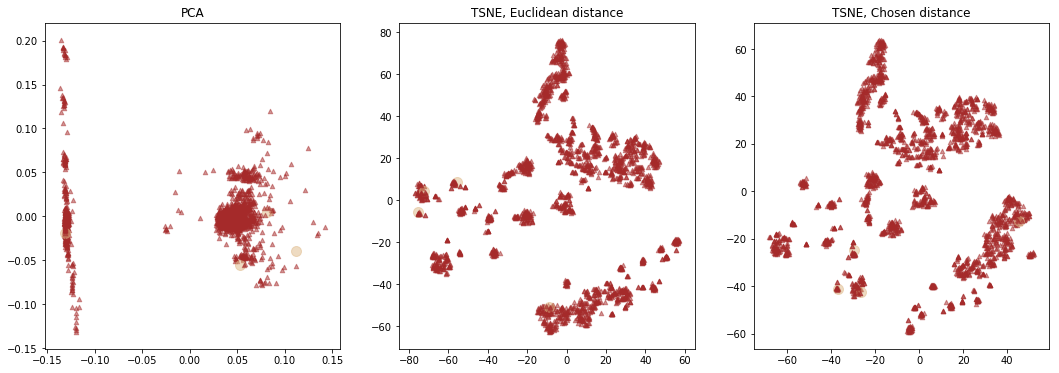

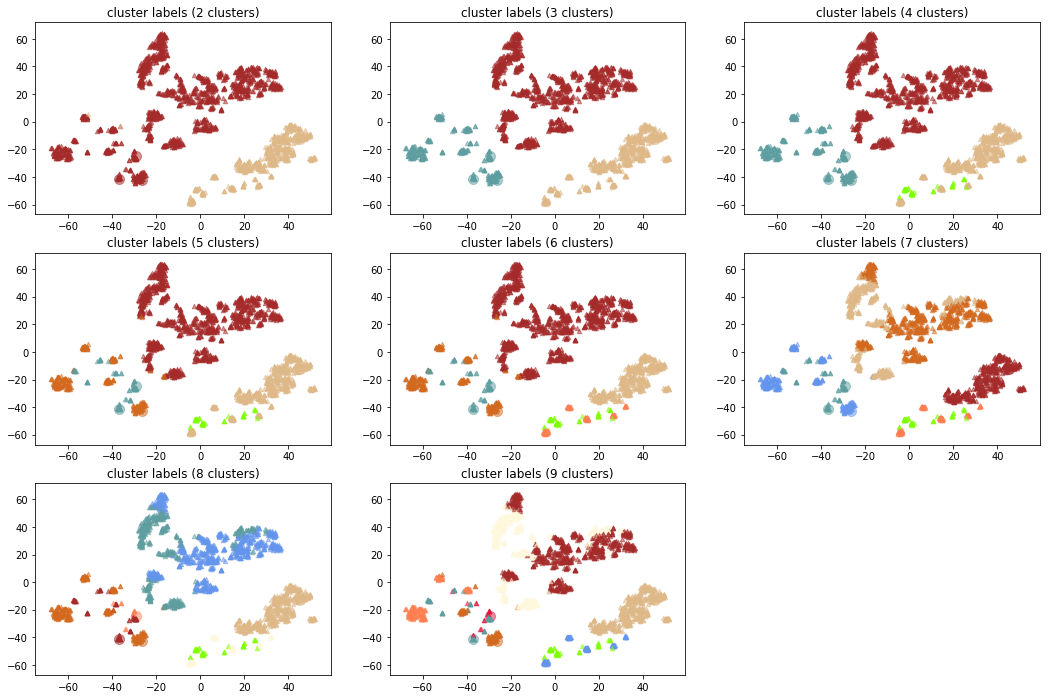

In [30]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

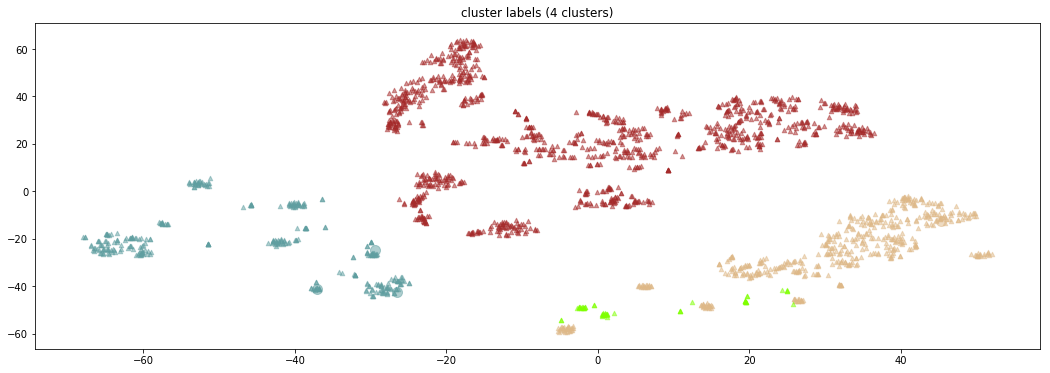

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
209          -0.000000         -0.000000          0.103970         -0.000000   
495          -0.000000          0.090377          0.091078          0.095727   
1610         -0.000000          0.089099          0.086865          0.086916   
1835          0.127572          0.114688          0.111631          0.117882   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
209           0.096625               0.080271            0.071880   
495          -0.000000               0.075041            0.066570   
1610          0.091221               0.070010            0.062826   
1835          0.116053               0.088584            0.079311   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
209           0.070557             0.074300           0.070641   
495           0.066411             0.068538           0.066934   
1610          0.060273             0.066035           0.061373   
1835          0.083231             0.080495           0.080552   

            ...                  gev_1FGL_Name  gev_CLASS1    gev_GLON  \
209         ...          b'1FGL J0240.5+6113 '    b'HMB  '  135.678848   
495         ...          b'                  '    b'PSR  '  284.083496   
1610        ...          b'1FGL J1826.2-1450 '    b'HMB  '   16.885555   
1835        ...          b'1FGL J2032.2+4127 '    b'PSR  '   80.218597   

      gev_GLAT       tev_fermi_names  tev_classes  tev_glat    tev_glon  \
209   1.086277                   b''       b'bin'  1.086135  135.675278   
495  -1.893881  b'1FGL J1018.6-5856'       b'bin' -1.779517  284.314087   
1610 -1.293795                   b''       b'bin' -1.289216   16.881586   
1835  1.018827                   b''      b'unid'  1.111117   80.299477   

     marked  KMeans_clusters_4  
209       1                  2  
495       1                  2  
1610      1                  2  
1835      1                  1  

[4 rows x 31 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
0     b'1FGL J0007.0+7303 '   b'PSR  '             b''  b'pwn,snr'        []   
2     b'                  '   b'snr  '             b''      b'snr'        []   
3     b'                  '   b'snr  '             b''      b'snr'        []   
4     b'                  '   b'snr  '             b''      b'snr'        []   
5     b'                  '   b'snr  '             b''      b'snr'        []   
6     b'                  '   b'snr  '             b''      b'snr'        []   
7     b'                  '   b'snr  '             b''      b'snr'        []   
8     b'                  '   b'snr  '             b''      b'snr'        []   
11    b'                  '   b'snr  '             b''      b'snr'        []   
12    b'                  '   b'snr  '             b''      b'snr'        []   
13    b'                  '   b'snr  '             b''      b'snr'        []   
14    b'                  '   b'snr  '             b''      b'snr'        []   
15    b'                  '   b'snr  '             b''      b'snr'        []   
16    b'                  '   b'snr  '             b''      b'snr'        []   
17    b'                  '   b'snr  '             b''      b'snr'        []   
18    b'                  '   b'snr  '             b''      b'snr'        []   
21    b'                  '   b'snr  '             b''      b'snr'        []   
22    b'                  '   b'snr  '             b''      b'snr'        []   
23    b'                  '   b'snr  '             b''      b'snr'        []   
24    b'                  '   b'snr  '             b''      b'snr'        []   
25    b'                  '   b'snr  '             b''      b'snr'        []   
26    b'                  '   b'snr  '             b''      b'snr'        []   
27    b'                  '   b'snr  '             b''      b'snr'        []   
28    b'                  '   b'snr  '             b''      b'snr'        []   
29    b'                  '   b'snr  '             b''      b'snr'        []   
31    b'                  '   b'snr  '             b''      b'snr'        []   
33    b'                  '   b'snr  '             b''      b'snr'        []   
34    b'                  '   b'snr  '             b''      b'snr'        []   
35    b'                  '   b'snr  '             b''      b'snr'        []   
36    b'                  '   b'snr  '             b''      b'snr'        []   
...                     ...        ...             ...         ...       ...   
1940  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1941  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1942  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1943  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1944  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1945  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1946  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1947  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1949  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1951  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1953  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1954  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1955  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1956  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1957  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1958  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1959  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1960  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1961  b'1FGL J

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
100   b'1FGL J0035.9+5951 '   b'bll  '             b''       b'hbl'   
101   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
102   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
103   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
104   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
105   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
106   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
107   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
108   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
109   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
110   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
111   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
112   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
113   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
114   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
115   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
116   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
118   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
120   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
121   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
122   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
123   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
124   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
125   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
126   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
127   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
128   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
129   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
130   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
131   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
...                     ...        ...             ...          ...   
1761  b'1FGL J2001.1+4351 '   b'bll  '             b''       b'ibl'   
1818  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1819  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1820  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1821  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1822  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1823  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1824  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1825  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1826  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1827  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1828  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1830  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1831  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1835  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1836  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1837  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1838  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1839  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1840  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1841  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1842  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1843  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1844  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1845  b'1FGL J2032.2+4127 '   b'PSR  '

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1     b'                  '   b'snr  '             b''      b'snr'   
9     b'                  '   b'snr  '             b''      b'snr'   
10    b'                  '   b'snr  '             b''      b'snr'   
19    b'                  '   b'snr  '             b''      b'snr'   
20    b'                  '   b'snr  '             b''      b'snr'   
30    b'                  '   b'snr  '             b''      b'snr'   
32    b'                  '   b'snr  '             b''      b'snr'   
37    b'                  '   b'snr  '             b''      b'snr'   
44    b'                  '   b'snr  '             b''      b'snr'   
45    b'                  '   b'snr  '             b''      b'snr'   
52    b'                  '   b'snr  '             b''      b'snr'   
55    b'                  '   b'snr  '             b''      b'snr'   
56    b'                  '   b'snr  '             b''      b'snr'   
84    b'                  '   b'snr  '             b''      b'snr'   
85    b'                  '   b'snr  '             b''      b'snr'   
197   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
207   b'                  '   b'bll  '             b''      b'hbl'   
209   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
211   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
212   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
214   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
218   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
224   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
225   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
229   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
233   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
271   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'   
273   b'                  '   b'     '             b''   b'snr,mc'   
275   b'                  '   b'     '             b''   b'snr,mc'   
276   b'                  '   b'     '             b''   b'snr,mc'   
...                     ...        ...             ...         ...   
1768  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1770  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1773  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1780  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1786  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1792  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1798  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
1800  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
1814  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
1832  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'   
1834  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'   
1859  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1860  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1862  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1867  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1870  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1877  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1879  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1900  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1902  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1909  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1917  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1920  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1921  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1932  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1937  b'1FGL J2323.4+584

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1  \
117   b'1FGL J0047.3-2512 '   b'sbg  '   
119   b'1FGL J0047.3-2512 '   b'sbg  '   
133   b'1FGL J0047.3-2512 '   b'sbg  '   
138   b'1FGL J0047.3-2512 '   b'sbg  '   
149   b'1FGL J0047.3-2512 '   b'sbg  '   
151   b'1FGL J0047.3-2512 '   b'sbg  '   
164   b'1FGL J0205.6+6449 '   b'PSR  '   
178   b'1FGL J0205.6+6449 '   b'PSR  '   
242   b'                  '   b'rdg  '   
269   b'1FGL J0319.7+4130 '   b'RDG  '   
323   b'                  '   b'bll  '   
374   b'1FGL J0633.9+1746 '   b'PSR  '   
434   b'1FGL J0956.5+6938 '   b'sbg  '   
439   b'1FGL J0956.5+6938 '   b'sbg  '   
442   b'1FGL J0956.5+6938 '   b'sbg  '   
446   b'1FGL J0956.5+6938 '   b'sbg  '   
447   b'1FGL J0956.5+6938 '   b'sbg  '   
450   b'1FGL J0956.5+6938 '   b'sbg  '   
452   b'1FGL J0956.5+6938 '   b'sbg  '   
453   b'1FGL J0956.5+6938 '   b'sbg  '   
454   b'1FGL J0956.5+6938 '   b'sbg  '   
456   b'1FGL J0956.5+6938 '   b'sbg  '   
464   b'1FGL J0956.5+6938 '   b'sbg  '   
466   b'1FGL J0956.5+6938 '   b'sbg  '   
468   b'1FGL J0956.5+6938 '   b'sbg  '   
472   b'1FGL J0956.5+6938 '   b'sbg  '   
476   b'1FGL J1000.1+6539 '   b'bll  '   
772   b'1FGL J1119.4-6127c'   b'PSR  '   
775   b'1FGL J1119.4-6127c'   b'PSR  '   
849   b'1FGL J1322.0-4515 '   b'RDG  '   
856   b'1FGL J1322.0-4515 '   b'RDG  '   
857   b'1FGL J1322.0-4515 '   b'RDG  '   
862   b'1FGL J1322.0-4515 '   b'RDG  '   
869   b'1FGL J1322.0-4515 '   b'RDG  '   
874   b'1FGL J1322.0-4515 '   b'RDG  '   
886   b'1FGL J1322.0-4515 '   b'RDG  '   
895   b'1FGL J1322.0-4515 '   b'RDG  '   
897   b'1FGL J1322.0-4515 '   b'RDG  '   
902   b'1FGL J1322.0-4515 '   b'RDG  '   
1307  b'                  '   b'     '   
1331  b'                  '   b'     '   
1334  b'                  '   b'     '   
1336  b'                  '   b'     '   
1337  b'                  '   b'     '   
1340  b'                  '   b'     '   
1353  b'                  '   b'     '   
1543  b'1FGL J1813.3-1246 '   b'PSR  '   
1629  b'1FGL J1833.5-1034 '   b'PSR  '   
1741  b'1FGL J1922.9+1411 '   b'SNR  '   
1744  b'1FGL J1922.9+1411 '   b'SNR  '   
1829  b'1FGL J2021.0+3651 '   b'PSR  '   

                                        tev_fermi_names  tev_classes  \
117                                                 b''    b'galaxy'   
119                                                 b''    b'galaxy'   
133                                                 b''    b'galaxy'   
138                                                 b''    b'galaxy'   
149                                                 b''    b'galaxy'   
151                                                 b''    b'galaxy'   
164                                                 b''       b'pwn'   
178                                                 b''       b'pwn'   
242                                                 b''       b'hbl'   
269                                                 b''       b'fri'   
323                                                 b''       b'hbl'   
374                                                 b''   b'psr,pwn'   
434   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
439   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
442   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
446   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
447   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
450   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
452   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
453   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
454   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
456   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
464   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
466   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
468   b'1FGL J0956.5+6938,2FG

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0               0.060587            0.058748          0.063770   
1               0.096451            0.088767          0.089902   
2               0.068457            0.064687          0.070239   
3               0.127949            0.119808          0.120655   

   gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0             0.059269           0.058837              0.0    0.060126   
1             0.090472           0.088630              0.0    0.000000   
2             0.065696           0.064703              0.0    0.067332   
3             0.122915           0.119598              0.0    0.000000   

   tev_1TeV  tev_3TeV  tev_10TeV  tev_30TeV  xmm_SC_EP_1_FLUX  \
0  0.062165  0.063939   0.066246   0.069000          0.079489   
1  0.000000  0.000000   0.000000   0.000000          0.114241   
2  0.069198  0.070173   0.071146   0.072933          0.059042   
3  0.000000  0.000000   0.000000   0.000000          0.115336   

   xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  xmm_SC_EP_5_FLUX  
0          0.077055          0.074888          0.073202          0.072680  
1          0.111395          0.110763          0.106861          0.102518  
2          0.068624          0.070883          0.068511          0.048374  
3          0.095256          0.081529          0.055085          0.041868

In [31]:
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 4, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [32]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display((list_spectra_clusters[i])['gev_1FGL_Name'].unique())
print("centroids:")
display(centers)

0 cluster (#A52A2A)


array(["b'1FGL J0007.0+7303 '", "b'                  '",
       "b'1FGL J0222.6+4302 '", "b'1FGL J0240.5+6113 '",
       "b'1FGL J0416.8+0107 '", "b'1FGL J0617.2+2233 '",
       "b'1FGL J0721.9+7120 '", "b'1FGL J0854.0-4632 '",
       "b'1FGL J1015.1+4927 '", "b'1FGL J1103.7-2329 '",
       "b'1FGL J1104.4+3812 '", "b'1FGL J1136.6+7009 '",
       "b'1FGL J1221.5+2814 '", "b'1FGL J1256.2-0547 '",
       "b'1FGL J1418.7-6057 '", "b'1FGL J1428.7+4239 '",
       "b'1FGL J1513.2-5904 '", "b'1FGL J1555.7+1111 '",
       "b'1FGL J1614.7-5138c'", "b'1FGL J1617.5-5105c'",
       "b'1FGL J1626.0-4917c'", "b'1FGL J1653.9+3945 '",
       "b'1FGL J1711.7-3944c'", "b'1FGL J1714.5-3830c'",
       "b'1FGL J1718.2-3825 '", "b'1FGL J1801.3-2322c'",
       "b'1FGL J1803.1-2147c'", "b'1FGL J1808.5-1954c'",
       "b'1FGL J1826.1-1256 '", "b'1FGL J1825.7-1410c'",
       "b'1FGL J1826.2-1450 '", "b'1FGL J1834.3-0842c'",
       "b'1FGL J1837.5-0659c'", "b'1FGL J1848.1-0145c'",
       "b'1FGL J1910.9+0906c'",

1 cluster (#DEB887)


array(["b'1FGL J0035.9+5951 '", "b'1FGL J0047.3-2512 '",
       "b'1FGL J0205.6+6449 '", "b'                  '",
       "b'1FGL J0319.7+4130 '", "b'1FGL J0633.9+1746 '",
       "b'1FGL J0650.7+2503 '", "b'1FGL J0956.5+6938 '",
       "b'1FGL J1000.1+6539 '", "b'1FGL J1119.4-6127c'",
       "b'1FGL J1221.3+3008 '", "b'1FGL J1230.8+1223 '",
       "b'1FGL J1322.0-4515 '", "b'1FGL J1747.9-2448 '",
       "b'1FGL J1813.3-1246 '", "b'1FGL J1834.3-0842c'",
       "b'1FGL J1833.5-1034 '", "b'1FGL J1850.2-0019c'",
       "b'1FGL J1922.9+1411 '", "b'1FGL J2000.0+6508 '",
       "b'1FGL J2001.1+4351 '", "b'1FGL J2021.0+3651 '",
       "b'1FGL J2032.2+4127 '"], dtype=object)

2 cluster (#5F9EA0)


array(["b'                  '", "b'1FGL J0222.6+4302 '",
       "b'1FGL J0240.5+6113 '", "b'1FGL J0416.8+0107 '",
       "b'1FGL J0617.2+2233 '", "b'1FGL J0721.9+7120 '",
       "b'1FGL J0854.0-4632 '", "b'1FGL J1015.1+4927 '",
       "b'1FGL J1104.4+3812 '", "b'1FGL J1221.5+2814 '",
       "b'1FGL J1418.7-6057 '", "b'1FGL J1428.7+4239 '",
       "b'1FGL J1513.2-5904 '", "b'1FGL J1555.7+1111 '",
       "b'1FGL J1614.7-5138c'", "b'1FGL J1617.5-5105c'",
       "b'1FGL J1626.0-4917c'", "b'1FGL J1653.9+3945 '",
       "b'1FGL J1711.7-3944c'", "b'1FGL J1714.5-3830c'",
       "b'1FGL J1718.2-3825 '", "b'1FGL J1801.3-2322c'",
       "b'1FGL J1808.5-1954c'", "b'1FGL J1826.1-1256 '",
       "b'1FGL J1825.7-1410c'", "b'1FGL J1826.2-1450 '",
       "b'1FGL J1834.3-0842c'", "b'1FGL J1837.5-0659c'",
       "b'1FGL J1848.1-0145c'", "b'1FGL J1907.9+0602 '",
       "b'1FGL J1910.9+0906c'", "b'1FGL J2009.5-4849 '",
       "b'1FGL J2015.7+3708 '", "b'1FGL J2020.0+4049 '",
       "b'1FGL J2323.4+5849 '",

3 cluster (#7FFF00)


array(["b'1FGL J0047.3-2512 '", "b'1FGL J0205.6+6449 '",
       "b'                  '", "b'1FGL J0319.7+4130 '",
       "b'1FGL J0633.9+1746 '", "b'1FGL J0956.5+6938 '",
       "b'1FGL J1000.1+6539 '", "b'1FGL J1119.4-6127c'",
       "b'1FGL J1322.0-4515 '", "b'1FGL J1813.3-1246 '",
       "b'1FGL J1833.5-1034 '", "b'1FGL J1922.9+1411 '",
       "b'1FGL J2021.0+3651 '"], dtype=object)

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0               0.060587            0.058748          0.063770   
1               0.096451            0.088767          0.089902   
2               0.068457            0.064687          0.070239   
3               0.127949            0.119808          0.120655   

   gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0             0.059269           0.058837              0.0    0.060126   
1             0.090472           0.088630              0.0    0.000000   
2             0.065696           0.064703              0.0    0.067332   
3             0.122915           0.119598              0.0    0.000000   

   tev_1TeV  tev_3TeV  tev_10TeV  tev_30TeV  xmm_SC_EP_1_FLUX  \
0  0.062165  0.063939   0.066246   0.069000          0.079489   
1  0.000000  0.000000   0.000000   0.000000          0.114241   
2  0.069198  0.070173   0.071146   0.072933          0.059042   
3  0.000000  0.000000   0.000000   0.000000          0.115336   

   xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  xmm_SC_EP_5_FLUX  
0          0.077055          0.074888          0.073202          0.072680  
1          0.111395          0.110763          0.106861          0.102518  
2          0.068624          0.070883          0.068511          0.048374  
3          0.095256          0.081529          0.055085          0.041868

In [33]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'1FGL J0007.0+7303 '" "b'                  '" "b'1FGL J0222.6+4302 '"
 "b'1FGL J0240.5+6113 '" "b'1FGL J0416.8+0107 '" "b'1FGL J0617.2+2233 '"
 "b'1FGL J0721.9+7120 '" "b'1FGL J0854.0-4632 '" "b'1FGL J1015.1+4927 '"
 "b'1FGL J1103.7-2329 '" "b'1FGL J1104.4+3812 '" "b'1FGL J1136.6+7009 '"
 "b'1FGL J1221.5+2814 '" "b'1FGL J1256.2-0547 '" "b'1FGL J1418.7-6057 '"
 "b'1FGL J1428.7+4239 '" "b'1FGL J1513.2-5904 '" "b'1FGL J1555.7+1111 '"
 "b'1FGL J1614.7-5138c'" "b'1FGL J1617.5-5105c'" "b'1FGL J1626.0-4917c'"
 "b'1FGL J1653.9+3945 '" "b'1FGL J1711.7-3944c'" "b'1FGL J1714.5-3830c'"
 "b'1FGL J1718.2-3825 '" "b'1FGL J1801.3-2322c'" "b'1FGL J1803.1-2147c'"
 "b'1FGL J1808.5-1954c'" "b'1FGL J1826.1-1256 '" "b'1FGL J1825.7-1410c'"
 "b'1FGL J1826.2-1450 '" "b'1FGL J1834.3-0842c'" "b'1FGL J1837.5-0659c'"
 "b'1FGL J1848.1-0145c'" "b'1FGL J1910.9+0906c'" "b'1FGL J2009.5-4849 '"
 "b'1FGL J2015.7+3708 '" "b'1FGL J2020.0+4049 '" "b'1FGL J2158.8-3013 '"
 "b'1FGL J2202.8+4216 '" "b'1FG

[1.0, 0.8, 0.6000000000000001, 0.4, 0.2, 0.1]


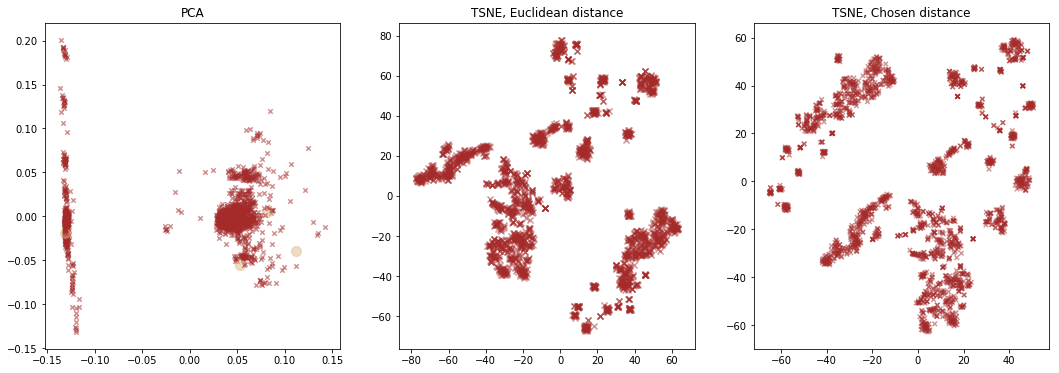

Clustering


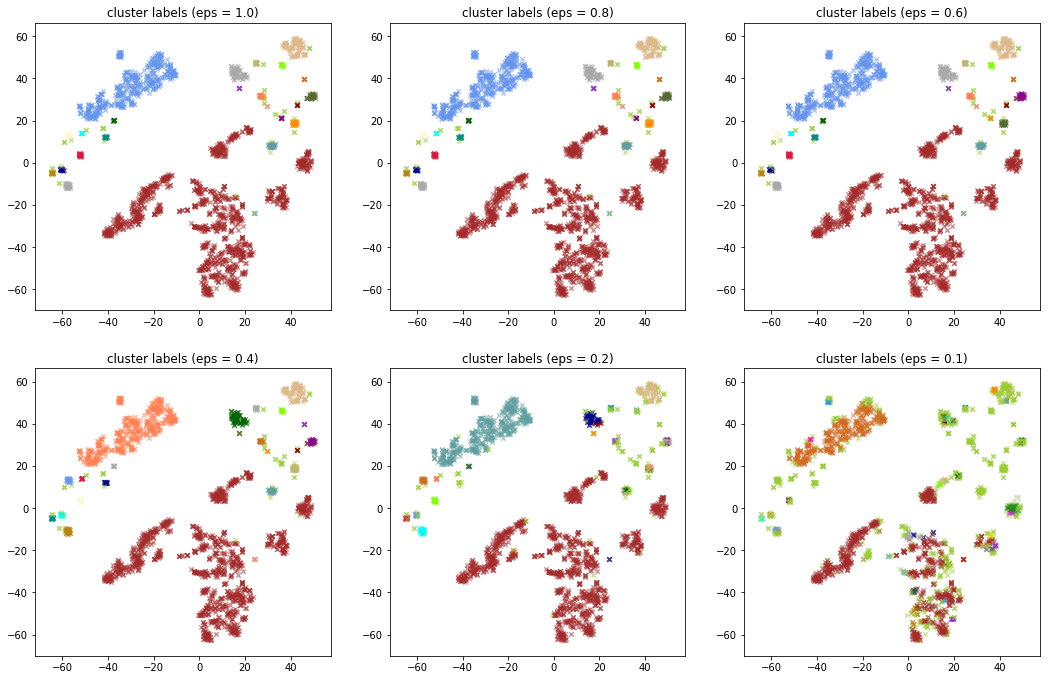

In [34]:
eps_l = [0.1 * i for i in range(10, 0, -2)] + [0.1]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)


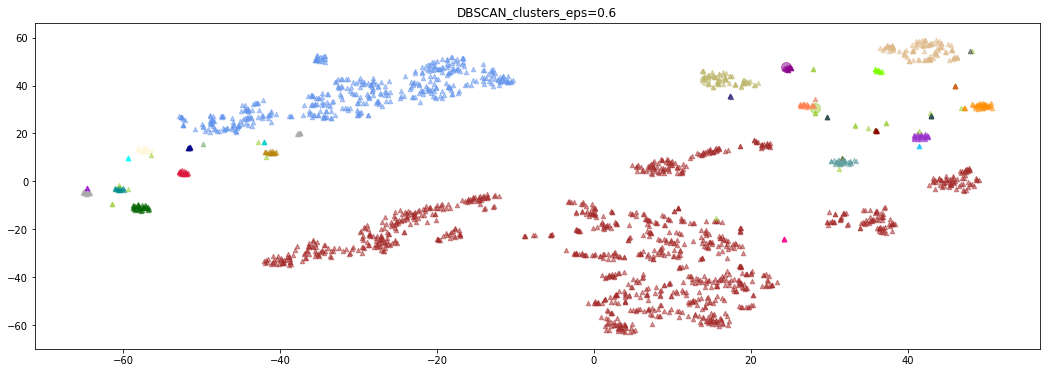

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
209          -0.000000         -0.000000          0.103970         -0.000000   
495          -0.000000          0.090377          0.091078          0.095727   
1610         -0.000000          0.089099          0.086865          0.086916   
1835          0.127572          0.114688          0.111631          0.117882   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
209           0.096625               0.080271            0.071880   
495          -0.000000               0.075041            0.066570   
1610          0.091221               0.070010            0.062826   
1835          0.116053               0.088584            0.079311   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
209           0.070557             0.074300           0.070641   
495           0.066411             0.068538           0.066934   
1610          0.060273             0.066035           0.061373   
1835          0.083231             0.080495           0.080552   

               ...                     gev_1FGL_Name  gev_CLASS1    gev_GLON  \
209            ...             b'1FGL J0240.5+6113 '    b'HMB  '  135.678848   
495            ...             b'                  '    b'PSR  '  284.083496   
1610           ...             b'1FGL J1826.2-1450 '    b'HMB  '   16.885555   
1835           ...             b'1FGL J2032.2+4127 '    b'PSR  '   80.218597   

      gev_GLAT       tev_fermi_names  tev_classes  tev_glat    tev_glon  \
209   1.086277                   b''       b'bin'  1.086135  135.675278   
495  -1.893881  b'1FGL J1018.6-5856'       b'bin' -1.779517  284.314087   
1610 -1.293795                   b''       b'bin' -1.289216   16.881586   
1835  1.018827                   b''      b'unid'  1.111117   80.299477   

     marked  DBSCAN_clusters_eps=0.6  
209       1                       -1  
495       1                       17  
1610      1                       16  
1835      1                        6  

[4 rows x 31 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
0     b'1FGL J0007.0+7303 '   b'PSR  '             b''  b'pwn,snr'        []   
2     b'                  '   b'snr  '             b''      b'snr'        []   
3     b'                  '   b'snr  '             b''      b'snr'        []   
4     b'                  '   b'snr  '             b''      b'snr'        []   
5     b'                  '   b'snr  '             b''      b'snr'        []   
6     b'                  '   b'snr  '             b''      b'snr'        []   
7     b'                  '   b'snr  '             b''      b'snr'        []   
8     b'                  '   b'snr  '             b''      b'snr'        []   
11    b'                  '   b'snr  '             b''      b'snr'        []   
12    b'                  '   b'snr  '             b''      b'snr'        []   
13    b'                  '   b'snr  '             b''      b'snr'        []   
14    b'                  '   b'snr  '             b''      b'snr'        []   
15    b'                  '   b'snr  '             b''      b'snr'        []   
16    b'                  '   b'snr  '             b''      b'snr'        []   
17    b'                  '   b'snr  '             b''      b'snr'        []   
18    b'                  '   b'snr  '             b''      b'snr'        []   
21    b'                  '   b'snr  '             b''      b'snr'        []   
22    b'                  '   b'snr  '             b''      b'snr'        []   
23    b'                  '   b'snr  '             b''      b'snr'        []   
24    b'                  '   b'snr  '             b''      b'snr'        []   
25    b'                  '   b'snr  '             b''      b'snr'        []   
26    b'                  '   b'snr  '             b''      b'snr'        []   
27    b'                  '   b'snr  '             b''      b'snr'        []   
28    b'                  '   b'snr  '             b''      b'snr'        []   
29    b'                  '   b'snr  '             b''      b'snr'        []   
31    b'                  '   b'snr  '             b''      b'snr'        []   
33    b'                  '   b'snr  '             b''      b'snr'        []   
34    b'                  '   b'snr  '             b''      b'snr'        []   
35    b'                  '   b'snr  '             b''      b'snr'        []   
36    b'                  '   b'snr  '             b''      b'snr'        []   
...                     ...        ...             ...         ...       ...   
1940  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1941  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1942  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1943  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1944  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1945  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1946  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1947  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1949  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1951  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1953  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1954  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1955  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1956  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1957  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1958  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1959  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1960  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1961  b'1FGL J

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1  \
1     b'                  '   b'snr  '   
9     b'                  '   b'snr  '   
10    b'                  '   b'snr  '   
19    b'                  '   b'snr  '   
20    b'                  '   b'snr  '   
30    b'                  '   b'snr  '   
44    b'                  '   b'snr  '   
52    b'                  '   b'snr  '   
56    b'                  '   b'snr  '   
85    b'                  '   b'snr  '   
197   b'1FGL J0222.6+4302 '   b'BLL  '   
271   b'1FGL J0416.8+0107 '   b'bll  '   
300   b'                  '   b'     '   
352   b'1FGL J0617.2+2233 '   b'SNR  '   
353   b'1FGL J0617.2+2233 '   b'SNR  '   
389   b'1FGL J0721.9+7120 '   b'BLL  '   
392   b'1FGL J0721.9+7120 '   b'BLL  '   
410   b'1FGL J0854.0-4632 '   b'SNR  '   
492   b'1FGL J1015.1+4927 '   b'bll  '   
496   b'                  '   b'PSR  '   
499   b'                  '   b'PSR  '   
501   b'                  '   b'PSR  '   
522   b'1FGL J1104.4+3812 '   b'BLL  '   
533   b'1FGL J1104.4+3812 '   b'BLL  '   
549   b'1FGL J1104.4+3812 '   b'BLL  '   
564   b'1FGL J1104.4+3812 '   b'BLL  '   
569   b'1FGL J1104.4+3812 '   b'BLL  '   
574   b'1FGL J1104.4+3812 '   b'BLL  '   
599   b'1FGL J1104.4+3812 '   b'BLL  '   
608   b'1FGL J1104.4+3812 '   b'BLL  '   
...                     ...        ...   
1385  b'                  '   b'     '   
1388  b'                  '   b'     '   
1393  b'                  '   b'     '   
1428  b'                  '   b'     '   
1450  b'                  '   b'     '   
1453  b'                  '   b'     '   
1454  b'                  '   b'     '   
1494  b'1FGL J1801.3-2322c'   b'SNR  '   
1501  b'1FGL J1801.3-2322c'   b'SNR  '   
1556  b'                  '   b'     '   
1566  b'                  '   b'     '   
1568  b'                  '   b'     '   
1571  b'                  '   b'     '   
1573  b'                  '   b'     '   
1581  b'                  '   b'spp  '   
1596  b'1FGL J1826.1-1256 '   b'PSR  '   
1600  b'1FGL J1826.1-1256 '   b'PSR  '   
1611  b'1FGL J1826.2-1450 '   b'HMB  '   
1727  b'1FGL J1910.9+0906c'   b'snr  '   
1731  b'1FGL J1910.9+0906c'   b'snr  '   
1766  b'1FGL J2009.5-4849 '   b'BLL  '   
1768  b'1FGL J2009.5-4849 '   b'BLL  '   
1770  b'1FGL J2009.5-4849 '   b'BLL  '   
1773  b'1FGL J2009.5-4849 '   b'BLL  '   
1909  b'1FGL J2323.4+5849 '   b'snr  '   
1920  b'1FGL J2323.4+5849 '   b'snr  '   
1921  b'1FGL J2323.4+5849 '   b'snr  '   
1948  b'1FGL J2359.0-3035 '   b'bll  '   
1952  b'1FGL J2359.0-3035 '   b'bll  '   
1972  b'1FGL J2359.0-3035 '   b'bll  '   

                                        tev_fermi_names tev_classes  \
1                                                   b''      b'snr'   
9                                                   b''      b'snr'   
10                                                  b''      b'snr'   
19                                                  b''      b'snr'   
20                                                  b''      b'snr'   
30                                                  b''      b'snr'   
44                                                  b''      b'snr'   
52                                                  b''      b'snr'   
56                                                  b''      b'snr'   
85                                                  b''      b'snr'   
197                                                 b''      b'ibl'   
271                                                 b''      b'hbl'   
300                                                 b''   b'snr,mc'   
352                                                 b''      b'snr'   
353                                                 b''      b'snr'   
389                                                 b''      b'ibl'   
392                                                 b''      b'ibl'   
410   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
492                                                 b''     

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1  \
32    b'                  '   b'snr  '   
37    b'                  '   b'snr  '   
292   b'                  '   b'     '   
403   b'1FGL J0854.0-4632 '   b'SNR  '   
409   b'1FGL J0854.0-4632 '   b'SNR  '   
420   b'1FGL J0854.0-4632 '   b'SNR  '   
505   b'                  '   b'PSR  '   
546   b'1FGL J1104.4+3812 '   b'BLL  '   
547   b'1FGL J1104.4+3812 '   b'BLL  '   
616   b'1FGL J1104.4+3812 '   b'BLL  '   
938   b'1FGL J1418.7-6057 '   b'PSR  '   
939   b'1FGL J1418.7-6057 '   b'PSR  '   
942   b'1FGL J1418.7-6057 '   b'PSR  '   
945   b'1FGL J1428.7+4239 '   b'bll  '   
1052  b'1FGL J1626.0-4917c'   b'     '   
1101  b'1FGL J1653.9+3945 '   b'BLL  '   
1124  b'1FGL J1653.9+3945 '   b'BLL  '   
1431  b'                  '   b'     '   
1490  b'1FGL J1801.3-2322c'   b'SNR  '   
1554  b'                  '   b'     '   
1567  b'                  '   b'     '   
1715  b'                  '   b'     '   
1765  b'1FGL J2009.5-4849 '   b'BLL  '   
1767  b'1FGL J2009.5-4849 '   b'BLL  '   
1800  b'1FGL J2015.7+3708 '   b'FSRQ '   
1859  b'1FGL J2323.4+5849 '   b'snr  '   

                                        tev_fermi_names tev_classes  \
32                                                  b''      b'snr'   
37                                                  b''      b'snr'   
292                                                 b''   b'snr,mc'   
403   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
409   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
420   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
505                                b'1FGL J1018.6-5856'      b'bin'   
546                                                 b''      b'hbl'   
547                                                 b''      b'hbl'   
616                                                 b''      b'hbl'   
938                                                 b''      b'pwn'   
939                                                 b''      b'pwn'   
942                                                 b''      b'pwn'   
945                                                 b''      b'hbl'   
1052                                                b''     b'unid'   
1101                                                b''      b'hbl'   
1124                                                b''      b'hbl'   
1431                                                b''     b'unid'   
1490                                                b''   b'snr,mc'   
1554                                                b''      b'pwn'   
1567                                                b''      b'pwn'   
1715                                                b''     b'unid'   
1765                                                b''      b'hbl'   
1767                                                b''      b'hbl'   
1800                                                b''     b'unid'   
1859                                                b''      b'snr'   

                                  s_MAIN_ID   s_class  s_simbad  marked  \
32                                       []        []         0       0   
37                                       []        []         0       0   
292                                      []        []         0       0   
403                                      []        []         0       0   
409                                      []        []         0       0   
420                                      []        []         0       0   
505                ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
546                                      []        []         0       0   
547                                      []        []         0       0   
616                                      []        []         0       0   
938                                      []        []         0       0   
939                                      []        []        

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1  \
45    b'                  '   b'snr  '   
275   b'                  '   b'     '   
276   b'                  '   b'     '   
406   b'1FGL J0854.0-4632 '   b'SNR  '   
412   b'1FGL J0854.0-4632 '   b'SNR  '   
937   b'1FGL J1418.7-6057 '   b'PSR  '   
1248  b'                  '   b'     '   
1274  b'                  '   b'     '   
1448  b'                  '   b'     '   
1662  b'                  '   b'PSR  '   
1792  b'1FGL J2015.7+3708 '   b'FSRQ '   
1867  b'1FGL J2323.4+5849 '   b'snr  '   

                                        tev_fermi_names tev_classes  \
45                                                  b''      b'snr'   
275                                                 b''   b'snr,mc'   
276                                                 b''   b'snr,mc'   
406   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
412   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
937                                                 b''      b'pwn'   
1248                                                b''     b'unid'   
1274                                                b''     b'unid'   
1448                                                b''      b'pwn'   
1662                                                b''     b'unid'   
1792                                                b''  b'pwn,snr'   
1867                                                b''      b'snr'   

                                              s_MAIN_ID             s_class  \
45                                                   []                  []   
275                                                  []                  []   
276                                                  []                  []   
406                                                  []                  []   
412                                                  []                  []   
937                                                  []                  []   
1248  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1274  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1448                                                 []                  []   
1662         ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]        ['B' 'B0Ve']   
1792                                                 []                  []   
1867                                                 []                  []   

      s_simbad  marked               xmm_IAUNAME  \
45           0       0  b'3XMM J002525.6+640609'   
275          0       0  b'3XMM J052444.0-694058'   
276          0       0  b'3XMM J052450.8-693633'   
406          0       0  b'3XMM J085149.4-461732'   
412          0       0  b'3XMM J085154.8-462219'   
937          0       0  b'3XMM J141848.1-605632'   
1248         1       0  b'3XMM J174540.7-290331'   
1274         1       0  b'3XMM J174548.6-290104'   
1448         0       0  b'3XMM J174718.6-280742'   
1662         1       0  b'3XMM J184058.8-052957'   
1792         0       0  b'3XMM J201603.6+371617'   
1867         0       0  b'3XMM J232312.9+584727'   

                                        xmm_WEBPAGE_URL  
45    b'http://xmm-catalog.irap.omp.eu/source/203105...  
275   b'http://xmm-catalog.irap.omp.eu/source/206907...  
276   b'http://xmm-catalog.irap.omp.eu/source/206907...  
406   b'http://xmm-catalog.irap.omp.eu/source/201477...  
412   b'http://xmm-catalog.irap.omp.eu/source/201477...  
937   b'http://xmm-catalog.irap.omp.eu/source/205557...  
1248  b'http://xmm-catalog.irap.omp.eu/source/207436...  
1274  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1448  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1662  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1792  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1867  b'http://xmm-catalog.irap.omp.eu/source/200976...

4 cluster (#D2691E)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
55    b'                  '   b'snr  '             b''      b'snr'   
1224  b'                  '   b'     '             b''     b'unid'   
1283  b'                  '   b'     '             b''     b'unid'   
1374  b'                  '   b'     '             b''     b'unid'   
1598  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1728  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   

                                              s_MAIN_ID             s_class  \
55                                                   []                  []   
1224  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1283  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1374              ["b'[MCD2010] 18'" "b'[MCD2010] 13'"]               ['O']   
1598                                                 []                  []   
1728                                                 []                  []   

      s_simbad  marked               xmm_IAUNAME  \
55           0       0  b'3XMM J002528.1+640737'   
1224         1       0  b'3XMM J174535.4-285910'   
1283         1       0  b'3XMM J174552.8-290007'   
1374         1       0  b'3XMM J174612.5-285135'   
1598         0       0  b'3XMM J182603.7-130431'   
1728         0       0  b'3XMM J191105.6+090507'   

                                        xmm_WEBPAGE_URL  
55    b'http://xmm-catalog.irap.omp.eu/source/200962...  
1224  b'http://xmm-catalog.irap.omp.eu/source/206904...  
1283  b'http://xmm-catalog.irap.omp.eu/source/207901...  
1374  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1598  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1728  b'http://xmm-catalog.irap.omp.eu/source/200841...

5 cluster (#FF7F50)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
84    b'                  '   b'snr  '             b''      b'snr'   
218   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
989   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1089  b'                  '   b'psr  '             b''      b'pwn'   
1090  b'                  '   b'psr  '             b''      b'pwn'   
1146  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'   
1172  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1363  b'                  '   b'     '             b''     b'unid'   
1528  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'   
1653  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'   
1658  b'                  '   b'PSR  '             b''     b'unid'   
1660  b'                  '   b'PSR  '             b''     b'unid'   
1756  b'                  '   b'     '             b''  b'pwn,snr'   
1814  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
1900  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1902  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1917  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   

                                        s_MAIN_ID       s_class  s_simbad  \
84                                             []            []         0   
218   ["b'LS   I +61  303'" "b'LS   I +61  303'"]      ['B0Ve']         1   
989                                            []            []         0   
1089                    ["b'2FHL J1633.5-4746e'"]      ['B0Ve']         2   
1090                    ["b'2FHL J1633.5-4746e'"]      ['B0Ve']         2   
1146                                           []            []         0   
1172                                           []            []         0   
1363        ["b'[MCD2010] 18'" "b'[MCD2010] 13'"]         ['O']         1   
1528                                           []            []         0   
1653                                           []            []         0   
1658   ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   
1660   ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   
1756                           ["b'[KKM2013] 7'"]         ['B']         1   
1814                                           []            []         0   
1900                                           []            []         0   
1902                                           []            []         0   
1917                                           []            []         0   

      marked               xmm_IAUNAME  \
84         0  b'3XMM J002537.9+641116'   
218        0  b'3XMM J024031.0+611527'   
989        0  b'3XMM J151350.0-591124'   
1089       0  b'3XMM J163211.8-475126'   
1090       0  b'3XMM J163212.6-475016'   
1146       0  b'3XMM J171329.7-394346'   
1172       0  b'3XMM J171755.5-383316'   
1363       0  b'3XMM J174609.6-285400'   
1528       0  b'3XMM J180801.5-202315'   
1653       0  b'3XMM J183746.7-065652'   
1658       0  b'3XMM J184042.8-053159'   
1660       0  b'3XMM J184051.3-053325'   
1756       0  b'3XMM J193035.6+184933'   
1814       0  b'3XMM J201608.6+370901'   
1900       0  b'3XMM J232326.0+584832'   
1902       0  b'3XMM J232326.7+584903'   
1917       0  b'3XMM J232334.6+584730'   

                                        xmm_WEBPAGE_URL  
84    b'http://xmm-catalog.irap.omp.eu/source/200962...  
218   b'http://xmm-catalog.irap.omp.eu/source/205059...  
989   b'http://xmm-catalog.irap.omp.eu/source/202070...  
1089  b'http://xmm-catalog.irap.omp.eu/source/202017...  
1090  b'http://xmm-catalog.irap.omp.eu/source/202017...  
1146  b'http://xmm-catalog.irap.omp.eu/source/207221...  
1172  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1363  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1528  b'http://xmm-catalog.irap.omp.eu/source/201645...  
1653  b'http://xmm-catalog.ir

6 cluster (#6495ED)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
100   b'1FGL J0035.9+5951 '   b'bll  '             b''       b'hbl'   
101   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
102   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
103   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
104   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
105   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
106   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
107   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
108   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
109   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
112   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
113   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
114   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
116   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
118   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
120   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
121   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
122   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
123   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
124   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
125   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
126   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
128   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
129   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
130   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
131   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
132   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
134   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
135   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
136   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
...                     ...        ...             ...          ...   
1758  b'1FGL J2001.1+4351 '   b'bll  '             b''       b'ibl'   
1759  b'1FGL J2001.1+4351 '   b'bll  '             b''       b'ibl'   
1761  b'1FGL J2001.1+4351 '   b'bll  '             b''       b'ibl'   
1818  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1820  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1821  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1822  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1823  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1824  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1825  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1826  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1827  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1828  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1830  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1831  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1835  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1836  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1837  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1838  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1839  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1840  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1841  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1842  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1844  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1845  b'1FGL J2032.2+4127 '   b'PSR  '

7 cluster (#FFF8DC)


gev_1FGL_Name gev_CLASS1  \
110   b'1FGL J0047.3-2512 '   b'sbg  '   
115   b'1FGL J0047.3-2512 '   b'sbg  '   
155   b'1FGL J0205.6+6449 '   b'PSR  '   
244   b'                  '   b'rdg  '   
265   b'1FGL J0319.7+4130 '   b'RDG  '   
376   b'1FGL J0633.9+1746 '   b'PSR  '   
436   b'1FGL J0956.5+6938 '   b'sbg  '   
761   b'1FGL J1119.4-6127c'   b'PSR  '   
865   b'1FGL J1322.0-4515 '   b'RDG  '   
872   b'1FGL J1322.0-4515 '   b'RDG  '   
881   b'1FGL J1322.0-4515 '   b'RDG  '   
970   b'                  '   b'     '   
973   b'                  '   b'     '   
974   b'                  '   b'     '   
1300  b'                  '   b'     '   
1325  b'                  '   b'     '   
1460  b'1FGL J1747.9-2448 '   b'glc  '   
1546  b'1FGL J1813.3-1246 '   b'PSR  '   
1631  b'1FGL J1833.5-1034 '   b'PSR  '   
1843  b'1FGL J2032.2+4127 '   b'PSR  '   

                                        tev_fermi_names tev_classes  \
110                                                 b''   b'galaxy'   
115                                                 b''   b'galaxy'   
155                                                 b''      b'pwn'   
244                                                 b''      b'hbl'   
265                                                 b''      b'fri'   
376                                                 b''  b'psr,pwn'   
436   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
761                                                 b''      b'pwn'   
865                                                 b''      b'fri'   
872                                                 b''      b'fri'   
881                                                 b''      b'fri'   
970                                                 b''      b'pwn'   
973                                                 b''      b'pwn'   
974                                                 b''      b'pwn'   
1300                                                b''     b'unid'   
1325                                                b''     b'unid'   
1460                                                b''  b'unid,gc'   
1546                                                b''     b'unid'   
1631                                                b''      b'pwn'   
1843                                                b''     b'unid'   

                                              s_MAIN_ID   s_class  s_simbad  \
110                                                  []        []         0   
115                                                  []        []         0   
155                                                  []        []         0   
244                                                  []        []         0   
265                                                  []        []         0   
376                                                  []        []         0   
436   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
761                                                  []        []         0   
865                                                  []        []         0   
872                                                  []        []         0   
881                                                  []        []         0   
970                                                  []        []         0   
973                                                  []        []         0   
974                                                  []        []         0   
1300                                ["b'[MCD2010] 13'"]     ['O']         1   
1325                                ["b'[MCD2010] 13'"]     ['O']         1   
1460                                                 []        []         0   
1546                                                 []        []         0   
1631                                                 []        []         0   
1843                  ["b'[MT91] 213'" "b'Schulte 21'"]  ['

8 cluster (#DC143C)


gev_1FGL_Name gev_CLASS1  \
111   b'1FGL J0047.3-2512 '   b'sbg  '   
127   b'1FGL J0047.3-2512 '   b'sbg  '   
153   b'1FGL J0047.3-2512 '   b'sbg  '   
170   b'1FGL J0205.6+6449 '   b'PSR  '   
431   b'1FGL J0956.5+6938 '   b'sbg  '   
433   b'1FGL J0956.5+6938 '   b'sbg  '   
438   b'1FGL J0956.5+6938 '   b'sbg  '   
451   b'1FGL J0956.5+6938 '   b'sbg  '   
457   b'1FGL J0956.5+6938 '   b'sbg  '   
458   b'1FGL J0956.5+6938 '   b'sbg  '   
459   b'1FGL J0956.5+6938 '   b'sbg  '   
460   b'1FGL J0956.5+6938 '   b'sbg  '   
766   b'1FGL J1119.4-6127c'   b'PSR  '   
905   b'1FGL J1322.0-4515 '   b'RDG  '   
1316  b'                  '   b'     '   
1319  b'                  '   b'     '   
1355  b'                  '   b'     '   

                                        tev_fermi_names tev_classes  \
111                                                 b''   b'galaxy'   
127                                                 b''   b'galaxy'   
153                                                 b''   b'galaxy'   
170                                                 b''      b'pwn'   
431   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
433   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
438   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
451   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
457   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
458   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
459   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
460   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
766                                                 b''      b'pwn'   
905                                                 b''      b'fri'   
1316                                                b''     b'unid'   
1319                                                b''     b'unid'   
1355                                                b''     b'unid'   

                                              s_MAIN_ID   s_class  s_simbad  \
111                                                  []        []         0   
127                                                  []        []         0   
153                                                  []        []         0   
170                                                  []        []         0   
431   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
433   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
438   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
451   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
457   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
458   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
459   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
460   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
766                                                  []        []         0   
905                                                  []        []         0   
1316                                ["b'[MCD2010] 13'"]     ['O']         1   
1319                                ["b'[MCD2010] 13'"]     ['O']         1   
1355                                ["b'[MCD2010] 13'"]     ['O']         1   

      marked               xmm_IAUNAME  \
111        0  b'3XMM J004726.0-251543'   
127        0  b'3XMM J004733.3-251624'   
153        0  b'3XMM J004746.6-251641'   
170        0  b'3XMM J020529.0+644753'   
431        0  b'3XMM J095539.2+694120'   
433        0  b'3XMM J095539.6+694317'   
438        0  b'3XMM J095547.2+694139'   
451        0  b'3XMM J095554.9+694322'   
457        0  b'3XMM J095558.2+693901'   
458        0  b'3XMM J095558.6+694140'   
459        0  b'3XMM J095558.8+693918'   
460        0  b'3XMM J095558.9+694348'   
766      

9 cluster (#00FFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
117  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
242  b'                  '   b'rdg  '             b''      b'hbl'        []   
269  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
117      []         0       0  b'3XMM J004728.4-251709'   
242      []         0       0  b'3XMM J031651.2+411949'   
269      []         0       0  b'3XMM J032006.4+413044'   

                                       xmm_WEBPAGE_URL  
117  b'http://xmm-catalog.irap.omp.eu/source/201520...  
242  b'http://xmm-catalog.irap.omp.eu/source/203056...  
269  b'http://xmm-catalog.irap.omp.eu/source/203057...

10 cluster (#00008B)


gev_1FGL_Name gev_CLASS1  \
119   b'1FGL J0047.3-2512 '   b'sbg  '   
323   b'                  '   b'bll  '   
466   b'1FGL J0956.5+6938 '   b'sbg  '   
468   b'1FGL J0956.5+6938 '   b'sbg  '   
476   b'1FGL J1000.1+6539 '   b'bll  '   
772   b'1FGL J1119.4-6127c'   b'PSR  '   
775   b'1FGL J1119.4-6127c'   b'PSR  '   
1629  b'1FGL J1833.5-1034 '   b'PSR  '   

                                        tev_fermi_names tev_classes  \
119                                                 b''   b'galaxy'   
323                                                 b''      b'hbl'   
466   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
468   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
476                                                 b''   b'blazar'   
772                                                 b''      b'pwn'   
775                                                 b''      b'pwn'   
1629                                                b''      b'pwn'   

                                              s_MAIN_ID   s_class  s_simbad  \
119                                                  []        []         0   
323                                                  []        []         0   
466   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
468   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
476                                                  []        []         0   
772                                                  []        []         0   
775                                                  []        []         0   
1629                                                 []        []         0   

      marked               xmm_IAUNAME  \
119        0  b'3XMM J004728.7-251645'   
323        0  b'3XMM J055028.4-321516'   
466        0  b'3XMM J095611.4+694213'   
468        0  b'3XMM J095613.4+693939'   
476        0  b'3XMM J095828.3+653424'   
772        0  b'3XMM J111912.9-612522'   
775        0  b'3XMM J111917.6-613038'   
1629       0  b'3XMM J183258.8-102823'   

                                        xmm_WEBPAGE_URL  
119   b'http://xmm-catalog.irap.omp.eu/source/201520...  
323   b'http://xmm-catalog.irap.omp.eu/source/201422...  
466   b'http://xmm-catalog.irap.omp.eu/source/205605...  
468   b'http://xmm-catalog.irap.omp.eu/source/206578...  
476   b'http://xmm-catalog.irap.omp.eu/source/205024...  
772   b'http://xmm-catalog.irap.omp.eu/source/206727...  
775   b'http://xmm-catalog.irap.omp.eu/source/201507...  
1629  b'http://xmm-catalog.irap.omp.eu/source/201227...

11 cluster (#008B8B)


gev_1FGL_Name gev_CLASS1  \
133   b'1FGL J0047.3-2512 '   b'sbg  '   
178   b'1FGL J0205.6+6449 '   b'PSR  '   
439   b'1FGL J0956.5+6938 '   b'sbg  '   
447   b'1FGL J0956.5+6938 '   b'sbg  '   
450   b'1FGL J0956.5+6938 '   b'sbg  '   
452   b'1FGL J0956.5+6938 '   b'sbg  '   
453   b'1FGL J0956.5+6938 '   b'sbg  '   
456   b'1FGL J0956.5+6938 '   b'sbg  '   
849   b'1FGL J1322.0-4515 '   b'RDG  '   
856   b'1FGL J1322.0-4515 '   b'RDG  '   
857   b'1FGL J1322.0-4515 '   b'RDG  '   
862   b'1FGL J1322.0-4515 '   b'RDG  '   
1741  b'1FGL J1922.9+1411 '   b'SNR  '   

                                        tev_fermi_names tev_classes  \
133                                                 b''   b'galaxy'   
178                                                 b''      b'pwn'   
439   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
447   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
450   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
452   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
453   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
456   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
849                                                 b''      b'fri'   
856                                                 b''      b'fri'   
857                                                 b''      b'fri'   
862                                                 b''      b'fri'   
1741                                                b''   b'snr,mc'   

                                              s_MAIN_ID   s_class  s_simbad  \
133                                                  []        []         0   
178                                                  []        []         0   
439   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
447   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
450   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
452   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
453   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
456   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
849                                                  []        []         0   
856                                                  []        []         0   
857                                                  []        []         0   
862                                                  []        []         0   
1741                                                 []        []         0   

      marked               xmm_IAUNAME  \
133        0  b'3XMM J004735.3-251751'   
178        0  b'3XMM J020537.5+645123'   
439        0  b'3XMM J095547.9+694202'   
447        0  b'3XMM J095551.7+694233'   
450        0  b'3XMM J095554.0+694153'   
452        0  b'3XMM J095555.6+693915'   
453        0  b'3XMM J095556.1+693943'   
456        0  b'3XMM J095558.0+693911'   
849        0  b'3XMM J132511.7-430257'   
856        0  b'3XMM J132516.6-430109'   
857        0  b'3XMM J132519.0-430110'   
862        0  b'3XMM J132523.2-430143'   
1741       0  b'3XMM J192306.0+140918'   

                                        xmm_WEBPAGE_URL  
133   b'http://xmm-catalog.irap.omp.eu/source/201259...  
178   b'http://xmm-catalog.irap.omp.eu/source/201537...  
439   b'http://xmm-catalog.irap.omp.eu/source/205601...  
447   b'http://xmm-catalog.irap.omp.eu/source/206578...  
450   b'http://xmm-catalog.irap.omp.eu/source/205601...  
452   b'http://xmm-catalog.irap.omp.eu/source/206578...  
453   b'http://xmm-catalog.irap.omp.eu/source/206578...  
456   b'http://xmm-catalog.irap.omp.eu/source/205605...  
849   b'http://xmm-catalog.irap.omp.eu/source/200936...  
856   b'http://xmm-catalog.irap.omp.eu/source/207240...  
857   b'http://xmm-catalog.irap.omp.eu/source/200936...  
862   b'http://xmm-catalog.irap.omp.eu

12 cluster (#B8860B)


gev_1FGL_Name gev_CLASS1  \
137   b'1FGL J0047.3-2512 '   b'sbg  '   
470   b'1FGL J0956.5+6938 '   b'sbg  '   
473   b'1FGL J0956.5+6938 '   b'sbg  '   
768   b'1FGL J1119.4-6127c'   b'PSR  '   
777   b'1FGL J1119.4-6127c'   b'PSR  '   
969   b'                  '   b'     '   
1308  b'                  '   b'     '   
1345  b'                  '   b'     '   
1544  b'1FGL J1813.3-1246 '   b'PSR  '   
1679  b'                  '   b'     '   
1680  b'                  '   b'     '   
1686  b'                  '   b'     '   
1703  b'1FGL J1850.2-0019c'   b'     '   
1746  b'1FGL J1922.9+1411 '   b'SNR  '   

                                        tev_fermi_names tev_classes  \
137                                                 b''   b'galaxy'   
470   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
473   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
768                                                 b''      b'pwn'   
777                                                 b''      b'pwn'   
969                                                 b''      b'pwn'   
1308                                                b''     b'unid'   
1345                                                b''     b'unid'   
1544                                                b''     b'unid'   
1679                                                b''     b'unid'   
1680                                                b''     b'unid'   
1686                                                b''     b'unid'   
1703                                                b''      b'pwn'   
1746                                                b''   b'snr,mc'   

                                              s_MAIN_ID   s_class  s_simbad  \
137                                                  []        []         0   
470   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
473   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
768                                                  []        []         0   
777                                                  []        []         0   
969                                                  []        []         0   
1308                                ["b'[MCD2010] 13'"]     ['O']         1   
1345                                ["b'[MCD2010] 13'"]     ['O']         1   
1544                                                 []        []         0   
1679                                                 []        []         0   
1680                                                 []        []         0   
1686                                                 []        []         0   
1703                                                 []        []         0   
1746                                                 []        []         0   

      marked               xmm_IAUNAME  \
137        0  b'3XMM J004737.0-252001'   
470        0  b'3XMM J095620.1+693848'   
473        0  b'3XMM J095624.7+694038'   
768        0  b'3XMM J111903.4-612440'   
777        0  b'3XMM J111920.4-612624'   
969        0  b'3XMM J145920.1-605350'   
1308       0  b'3XMM J174614.1-285749'   
1345       0  b'3XMM J174623.9-285856'   
1544       0  b'3XMM J181330.8-124757'   
1679       0  b'3XMM J184437.9-030546'   
1680       0  b'3XMM J184439.8-030548'   
1686       0  b'3XMM J184444.9-030753'   
1703       0  b'3XMM J184902.6-000044'   
1746       0  b'3XMM J192319.4+140850'   

                                        xmm_WEBPAGE_URL  
137   b'http://xmm-catalog.irap.omp.eu/source/201520...  
470   b'http://xmm-catalog.irap.omp.eu/source/206578...  
473   b'http://xmm-catalog.irap.omp.eu/source/205601...  
768   b'http://xmm-catalog.irap.omp.eu/source/206727...  
777   b'http://xmm-catalog.irap.omp.eu/source/206727...  
969   b'http://xmm-catalog.irap.omp.eu/source/206550...  
1308  b'http://xmm-catalog.irap.omp.eu/source/206586...  
1345  b'http://xmm-catalog.irap.omp.

13 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1  \
138   b'1FGL J0047.3-2512 '   b'sbg  '   
151   b'1FGL J0047.3-2512 '   b'sbg  '   
164   b'1FGL J0205.6+6449 '   b'PSR  '   
434   b'1FGL J0956.5+6938 '   b'sbg  '   
446   b'1FGL J0956.5+6938 '   b'sbg  '   
454   b'1FGL J0956.5+6938 '   b'sbg  '   
464   b'1FGL J0956.5+6938 '   b'sbg  '   
869   b'1FGL J1322.0-4515 '   b'RDG  '   
874   b'1FGL J1322.0-4515 '   b'RDG  '   
886   b'1FGL J1322.0-4515 '   b'RDG  '   
897   b'1FGL J1322.0-4515 '   b'RDG  '   
902   b'1FGL J1322.0-4515 '   b'RDG  '   
1829  b'1FGL J2021.0+3651 '   b'PSR  '   

                                        tev_fermi_names  tev_classes  \
138                                                 b''    b'galaxy'   
151                                                 b''    b'galaxy'   
164                                                 b''       b'pwn'   
434   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
446   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
454   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
464   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
869                                                 b''       b'fri'   
874                                                 b''       b'fri'   
886                                                 b''       b'fri'   
897                                                 b''       b'fri'   
902                                                 b''       b'fri'   
1829                                                b''  b'pwn,unid'   

                                              s_MAIN_ID   s_class  s_simbad  \
138                                                  []        []         0   
151                                                  []        []         0   
164                                                  []        []         0   
434   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
446   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
454   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
464   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
869                                                  []        []         0   
874                                                  []        []         0   
886                                                  []        []         0   
897                                                  []        []         0   
902                                                  []        []         0   
1829                                                 []        []         0   

      marked               xmm_IAUNAME  \
138        0  b'3XMM J004737.3-251817'   
151        0  b'3XMM J004745.6-251656'   
164        0  b'3XMM J020523.4+644807'   
434        0  b'3XMM J095542.8+694208'   
446        0  b'3XMM J095551.5+693939'   
454        0  b'3XMM J095556.3+694159'   
464        0  b'3XMM J095604.9+693731'   
869        0  b'3XMM J132526.1-425843'   
874        0  b'3XMM J132526.9-425853'   
886        0  b'3XMM J132531.8-425902'   
897        0  b'3XMM J132537.4-430052'   
902        0  b'3XMM J132541.9-430049'   
1829       0  b'3XMM J202111.6+364856'   

                                        xmm_WEBPAGE_URL  
138   b'http://xmm-catalog.irap.omp.eu/source/201259...  
151   b'http://xmm-catalog.irap.omp.eu/source/201109...  
164   b'http://xmm-catalog.irap.omp.eu/source/201537...  
434   b'http://xmm-catalog.irap.omp.eu/source/206578...  
446   b'http://xmm-catalog.irap.omp.eu/source/206578...  
454   b'http://xmm-catalog.irap.omp.eu/source/202060...  
464   b'http://xmm-catalog.irap.omp.eu/source/205605...  
869   b'http://xmm-catalog.irap.omp.eu/source/200936...  
874   b'http://xmm-catalog.irap.omp.eu/source/200936...  
886   b'http://xmm-catalog.irap.omp.eu/source/200936...  
897   b'http://xmm-catalog.irap.omp.eu/source/200936...  
902   b'http://xmm-catal

14 cluster (#006400)


gev_1FGL_Name gev_CLASS1  \
141   b'1FGL J0047.3-2512 '   b'sbg  '   
154   b'1FGL J0047.3-2512 '   b'sbg  '   
243   b'                  '   b'rdg  '   
263   b'1FGL J0319.7+4130 '   b'RDG  '   
326   b'                  '   b'bll  '   
337   b'                  '   b'bll  '   
338   b'                  '   b'bll  '   
343   b'                  '   b'bll  '   
345   b'                  '   b'bll  '   
347   b'                  '   b'bll  '   
379   b'1FGL J0633.9+1746 '   b'PSR  '   
463   b'1FGL J0956.5+6938 '   b'sbg  '   
480   b'1FGL J1000.1+6539 '   b'bll  '   
483   b'1FGL J1000.1+6539 '   b'bll  '   
814   b'1FGL J1230.8+1223 '   b'rdg  '   
832   b'1FGL J1230.8+1223 '   b'rdg  '   
871   b'1FGL J1322.0-4515 '   b'RDG  '   
877   b'1FGL J1322.0-4515 '   b'RDG  '   
880   b'1FGL J1322.0-4515 '   b'RDG  '   
894   b'1FGL J1322.0-4515 '   b'RDG  '   
898   b'1FGL J1322.0-4515 '   b'RDG  '   
1312  b'                  '   b'     '   
1321  b'                  '   b'     '   
1360  b'                  '   b'     '   
1670  b'                  '   b'     '   
1688  b'                  '   b'     '   
1760  b'1FGL J2001.1+4351 '   b'bll  '   
1819  b'1FGL J2021.0+3651 '   b'PSR  '   

                                        tev_fermi_names  tev_classes  \
141                                                 b''    b'galaxy'   
154                                                 b''    b'galaxy'   
243                                                 b''       b'hbl'   
263                                                 b''       b'fri'   
326                                                 b''       b'hbl'   
337                                                 b''       b'hbl'   
338                                                 b''       b'hbl'   
343                                                 b''       b'hbl'   
345                                                 b''       b'hbl'   
347                                                 b''       b'hbl'   
379                                                 b''   b'psr,pwn'   
463   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
480                                                 b''    b'blazar'   
483                                                 b''    b'blazar'   
814                                                 b''       b'fri'   
832                                                 b''       b'fri'   
871                                                 b''       b'fri'   
877                                                 b''       b'fri'   
880                                                 b''       b'fri'   
894                                                 b''       b'fri'   
898                                                 b''       b'fri'   
1312                                                b''      b'unid'   
1321                                                b''      b'unid'   
1360                                                b''      b'unid'   
1670                                                b''      b'unid'   
1688                                                b''      b'unid'   
1760                                                b''       b'ibl'   
1819                                                b''  b'pwn,unid'   

                                              s_MAIN_ID   s_class  s_simbad  \
141                                                  []        []         0   
154                                                  []        []         0   
243                                                  []        []         0   
263                                                  []        []         0   
326                                                  []        []         0   
337                                                  []        []         0   
338                                                  []        []         0   
343                                                  []        []         

15 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
148   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
152   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
1323  b'                  '   b'     '             b''     b'unid'   
1333  b'                  '   b'     '             b''     b'unid'   
1361  b'                  '   b'     '             b''     b'unid'   
1682  b'                  '   b'     '             b''     b'unid'   
1705  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'   
1709  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'   

                s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
148                    []      []         0       0  b'3XMM J004744.4-251650'   
152                    []      []         0       0  b'3XMM J004745.9-251811'   
1323  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174617.9-285934'   
1333  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174621.1-285438'   
1361  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174633.6-285853'   
1682                   []      []         0       0  b'3XMM J184441.6-030826'   
1705                   []      []         0       0  b'3XMM J184908.0-000209'   
1709                   []      []         0       0  b'3XMM J185156.2+000200'   

                                        xmm_WEBPAGE_URL  
148   b'http://xmm-catalog.irap.omp.eu/source/201259...  
152   b'http://xmm-catalog.irap.omp.eu/source/201259...  
1323  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1333  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1361  b'http://xmm-catalog.irap.omp.eu/source/207009...  
1682  b'http://xmm-catalog.irap.omp.eu/source/206023...  
1705  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1709  b'http://xmm-catalog.irap.omp.eu/source/200177...

16 cluster (#BDB76B)


gev_1FGL_Name gev_CLASS1       tev_fermi_names tev_classes  \
207   b'                  '   b'bll  '                   b''      b'hbl'   
214   b'1FGL J0240.5+6113 '   b'HMB  '                   b''      b'bin'   
225   b'1FGL J0240.5+6113 '   b'HMB  '                   b''      b'bin'   
233   b'1FGL J0240.5+6113 '   b'HMB  '                   b''      b'bin'   
359   b'1FGL J0617.2+2233 '   b'SNR  '                   b''      b'snr'   
390   b'1FGL J0721.9+7120 '   b'BLL  '                   b''      b'ibl'   
399   b'1FGL J0721.9+7120 '   b'BLL  '                   b''      b'ibl'   
497   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
907   b'                  '   b'PSR  '                   b''      b'pwn'   
923   b'1FGL J1418.7-6057 '   b'PSR  '                   b''      b'pwn'   
924   b'1FGL J1418.7-6057 '   b'PSR  '                   b''      b'pwn'   
927   b'1FGL J1418.7-6057 '   b'PSR  '                   b''      b'pwn'   
928   b'1FGL J1418.7-6057 '   b'PSR  '                   b''      b'pwn'   
983   b'1FGL J1513.2-5904 '   b'PSR  '                   b''      b'pwn'   
987   b'1FGL J1513.2-5904 '   b'PSR  '                   b''      b'pwn'   
1000  b'1FGL J1513.2-5904 '   b'PSR  '                   b''      b'pwn'   
1002  b'1FGL J1513.2-5904 '   b'PSR  '                   b''      b'pwn'   
1039  b'1FGL J1614.7-5138c'   b'spp  '                   b''     b'unid'   
1046  b'1FGL J1617.5-5105c'   b'PWN  '                   b''      b'pwn'   
1060  b'                  '   b'psr  '                   b''      b'pwn'   
1061  b'                  '   b'psr  '                   b''      b'pwn'   
1078  b'                  '   b'psr  '                   b''      b'pwn'   
1079  b'                  '   b'psr  '                   b''      b'pwn'   
1080  b'                  '   b'psr  '                   b''      b'pwn'   
1119  b'1FGL J1653.9+3945 '   b'BLL  '                   b''      b'hbl'   
1132  b'1FGL J1711.7-3944c'   b'SNR  '                   b''      b'snr'   
1139  b'1FGL J1711.7-3944c'   b'SNR  '                   b''      b'snr'   
1148  b'1FGL J1711.7-3944c'   b'SNR  '                   b''      b'snr'   
1171  b'1FGL J1718.2-3825 '   b'PSR  '                   b''      b'pwn'   
1186  b'                  '   b'     '                   b''     b'unid'   
...                     ...        ...                   ...         ...   
1409  b'                  '   b'     '                   b''     b'unid'   
1417  b'                  '   b'     '                   b''     b'unid'   
1467  b'                  '   b'     '                   b''   b'snr,mc'   
1472  b'                  '   b'     '                   b''   b'snr,mc'   
1475  b'                  '   b'     '                   b''   b'snr,mc'   
1477  b'                  '   b'     '                   b''   b'snr,mc'   
1478  b'                  '   b'     '                   b''   b'snr,mc'   
1481  b'                  '   b'     '                   b''   b'snr,mc'   
1483  b'                  '   b'     '                   b''   b'snr,mc'   
1488  b'                  '   b'     '                   b''   b'snr,mc'   
1489  b'                  '   b'     '                   b''   b'snr,mc'   
1531  b'1FGL J1808.5-1954c'   b'glc  '                   b''     b'unid'   
1532  b'1FGL J1808.5-1954c'   b'glc  '                   b''     b'unid'   
1562  b'                  '   b'     '                   b''      b'pwn'   
1569  b'                  '   b'     '                   b''      b'pwn'   
1592  b'1FGL J1826.1-1256 '   b'PSR  '                   b''     b'unid'   
1597  b'1FGL J1826.1-1256 '   b'PSR  '                   b''     b'unid'   
1602  b'1FGL J1825.7-1410c'   b'PWN  '                   b''      b'pwn'   
1604  b'1FGL J1825.7-1410c'   b'PWN  '                   b''      b'pwn'   
1610  b'1FGL J1826.2-1450 '   b'HMB  '                   b''      b'bin'   
1635  b'1FGL J1834.3-0842c'   b'snr  '                   b''  

17 cluster (#8B008B)


gev_1FGL_Name gev_CLASS1       tev_fermi_names tev_classes  \
211   b'1FGL J0240.5+6113 '   b'HMB  '                   b''      b'bin'   
212   b'1FGL J0240.5+6113 '   b'HMB  '                   b''      b'bin'   
224   b'1FGL J0240.5+6113 '   b'HMB  '                   b''      b'bin'   
229   b'1FGL J0240.5+6113 '   b'HMB  '                   b''      b'bin'   
495   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
1147  b'1FGL J1711.7-3944c'   b'SNR  '                   b''      b'snr'   
1178  b'1FGL J1718.2-3825 '   b'PSR  '                   b''      b'pwn'   
1200  b'                  '   b'     '                   b''     b'unid'   
1282  b'                  '   b'     '                   b''     b'unid'   
1564  b'                  '   b'     '                   b''      b'pwn'   
1575  b'                  '   b'     '                   b''      b'pwn'   
1645  b'1FGL J1834.3-0842c'   b'snr  '                   b''     b'unid'   
1950  b'1FGL J2359.0-3035 '   b'bll  '                   b''      b'hbl'   

                                              s_MAIN_ID             s_class  \
211         ["b'LS   I +61  303'" "b'LS   I +61  303'"]            ['B0Ve']   
212         ["b'LS   I +61  303'" "b'LS   I +61  303'"]            ['B0Ve']   
224         ["b'LS   I +61  303'" "b'LS   I +61  303'"]            ['B0Ve']   
229         ["b'LS   I +61  303'" "b'LS   I +61  303'"]            ['B0Ve']   
495                            ["b'2FGL J1019.0-5856'"]            ['B0Ve']   
1147                                                 []                  []   
1178                                                 []                  []   
1200  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1282  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1564                                                 []                  []   
1575                                                 []                  []   
1645                                                 []                  []   
1950                                                 []                  []   

      s_simbad  marked               xmm_IAUNAME  \
211          1       0  b'3XMM J024010.8+611213'   
212          1       0  b'3XMM J024025.4+611525'   
224          1       0  b'3XMM J024036.6+611603'   
229          1       0  b'3XMM J024039.8+611252'   
495          2       1  b'3XMM J101754.1-590131'   
1147         0       0  b'3XMM J171330.9-394344'   
1178         0       0  b'3XMM J171821.0-383416'   
1200         1       0  b'3XMM J174530.1-285858'   
1282         1       0  b'3XMM J174552.1-290202'   
1564         0       0  b'3XMM J181325.9-175135'   
1575         0       0  b'3XMM J181332.2-175352'   
1645         0       0  b'3XMM J183454.0-084313'   
1950         0       0  b'3XMM J235903.0-303514'   

                                        xmm_WEBPAGE_URL  
211   b'http://xmm-catalog.irap.omp.eu/source/205059...  
212   b'http://xmm-catalog.irap.omp.eu/source/205059...  
224   b'http://xmm-catalog.irap.omp.eu/source/205059...  
229   b'http://xmm-catalog.irap.omp.eu/source/205059...  
495   b'http://xmm-catalog.irap.omp.eu/source/206943...  
1147  b'http://xmm-catalog.irap.omp.eu/source/207408...  
1178  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1200  b'http://xmm-catalog.irap.omp.eu/source/204024...  
1282  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1564  b'http://xmm-catalog.irap.omp.eu/source/205527...  
1575  b'http://xmm-catalog.irap.omp.eu/source/205527...  
1645  b'http://xmm-catalog.irap.omp.eu/source/206793...  
1950  b'http://xmm-catalog.irap.omp.eu/source/203040...

18 cluster (#556B2F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
356  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
373  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   

            s_MAIN_ID   s_class  s_simbad  marked               xmm_IAUNAME  \
356  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061754.9+224021'   
373  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061816.6+224026'   

                                       xmm_WEBPAGE_URL  
356  b'http://xmm-catalog.irap.omp.eu/source/203019...  
373  b'http://xmm-catalog.irap.omp.eu/source/203019...

19 cluster (#FF8C00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names     tev_classes  \
396   b'1FGL J0721.9+7120 '   b'BLL  '             b''          b'ibl'   
931   b'1FGL J1418.7-6057 '   b'PSR  '             b''          b'pwn'   
984   b'1FGL J1513.2-5904 '   b'PSR  '             b''          b'pwn'   
985   b'1FGL J1513.2-5904 '   b'PSR  '             b''          b'pwn'   
1063  b'                  '   b'psr  '             b''          b'pwn'   
1068  b'                  '   b'psr  '             b''          b'pwn'   
1073  b'                  '   b'psr  '             b''          b'pwn'   
1092  b'                  '   b'psr  '             b''          b'pwn'   
1093  b'                  '   b'psr  '             b''          b'pwn'   
1142  b'1FGL J1711.7-3944c'   b'SNR  '             b''          b'snr'   
1165  b'1FGL J1714.5-3830c'   b'snr  '             b''       b'snr,mc'   
1181  b'                  '   b'     '             b''  b'unid,snr,mc'   
1187  b'                  '   b'     '             b''         b'unid'   
1191  b'                  '   b'     '             b''         b'unid'   
1196  b'                  '   b'     '             b''         b'unid'   
1204  b'                  '   b'     '             b''         b'unid'   
1386  b'                  '   b'     '             b''         b'unid'   
1445  b'                  '   b'     '             b''          b'pwn'   
1468  b'                  '   b'     '             b''       b'snr,mc'   
1474  b'                  '   b'     '             b''       b'snr,mc'   
1529  b'1FGL J1808.5-1954c'   b'glc  '             b''         b'unid'   
1553  b'                  '   b'     '             b''          b'pwn'   
1557  b'                  '   b'     '             b''          b'pwn'   
1595  b'1FGL J1826.1-1256 '   b'PSR  '             b''         b'unid'   
1657  b'1FGL J1837.5-0659c'   b'PWN  '             b''          b'pwn'   
1718  b'1FGL J1907.9+0602 '   b'PSR  '             b''         b'unid'   
1751  b'                  '   b'     '             b''      b'pwn,snr'   
1860  b'1FGL J2323.4+5849 '   b'snr  '             b''          b'snr'   
1862  b'1FGL J2323.4+5849 '   b'snr  '             b''          b'snr'   
1879  b'1FGL J2323.4+5849 '   b'snr  '             b''          b'snr'   

                                              s_MAIN_ID             s_class  \
396                                                  []                  []   
931                                                  []                  []   
984                                                  []                  []   
985                                                  []                  []   
1063                          ["b'2FHL J1633.5-4746e'"]            ['B0Ve']   
1068                          ["b'2FHL J1633.5-4746e'"]            ['B0Ve']   
1073                          ["b'2FHL J1633.5-4746e'"]            ['B0Ve']   
1092                          ["b'2FHL J1633.5-4746e'"]            ['B0Ve']   
1093                          ["b'2FHL J1633.5-4746e'"]            ['B0Ve']   
1142                                                 []                  []   
1165                                                 []                  []   
1181                                                 []                  []   
1187  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1191  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1196  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1204  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1386              ["b'[MCD2010] 18'" "b'[MCD2010] 13'"]               ['O']   
1445                                                 []                  []   
1468                                                 []                  []   
1474                                                 []                  []   
1529                                                 []     

20 cluster (#9932CC)


gev_1FGL_Name gev_CLASS1  \
400   b'1FGL J0854.0-4632 '   b'SNR  '   
414   b'1FGL J0854.0-4632 '   b'SNR  '   
844   b'                  '   b'PWN  '   
1050  b'1FGL J1626.0-4917c'   b'     '   
1053  b'1FGL J1626.0-4917c'   b'     '   
1067  b'                  '   b'psr  '   
1081  b'                  '   b'psr  '   
1082  b'                  '   b'psr  '   
1095  b'                  '   b'psr  '   
1161  b'1FGL J1714.5-3830c'   b'snr  '   
1194  b'                  '   b'     '   
1195  b'                  '   b'     '   
1211  b'                  '   b'     '   
1218  b'                  '   b'     '   
1221  b'                  '   b'     '   
1228  b'                  '   b'     '   
1233  b'                  '   b'     '   
1256  b'                  '   b'     '   
1270  b'                  '   b'     '   
1397  b'                  '   b'     '   
1424  b'                  '   b'     '   
1426  b'                  '   b'     '   
1427  b'                  '   b'     '   
1465  b'                  '   b'     '   
1714  b'                  '   b'     '   

                                        tev_fermi_names tev_classes  \
400   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
414   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
844                                                 b''      b'pwn'   
1050                                                b''     b'unid'   
1053                                                b''     b'unid'   
1067                                                b''      b'pwn'   
1081                                                b''      b'pwn'   
1082                                                b''      b'pwn'   
1095                                                b''      b'pwn'   
1161                                                b''      b'snr'   
1194                                                b''     b'unid'   
1195                                                b''     b'unid'   
1211                                                b''     b'unid'   
1218                                                b''     b'unid'   
1221                                                b''     b'unid'   
1228                                                b''     b'unid'   
1233                                                b''     b'unid'   
1256                                                b''     b'unid'   
1270                                                b''     b'unid'   
1397                                                b''     b'unid'   
1424                                                b''     b'unid'   
1426                                                b''     b'unid'   
1427                                                b''     b'unid'   
1465                                                b''   b'snr,mc'   
1714                                                b''     b'unid'   

                                              s_MAIN_ID             s_class  \
400                                                  []                  []   
414                                                  []                  []   
844                                                  []                  []   
1050                                                 []                  []   
1053                                                 []                  []   
1067                          ["b'2FHL J1633.5-4746e'"]            ['B0Ve']   
1081                          ["b'2FHL J1633.5-4746e'"]            ['B0Ve']   
1082                          ["b'2FHL J1633.5-4746e'"]            ['B0Ve']   
1095                          ["b'2FHL J1633.5-4746e'"]            ['B0Ve']   
1161                                                 []                  []   
1194  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1195  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1211  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'G

21 cluster (#8B0000)


gev_1FGL_Name gev_CLASS1  \
402   b'1FGL J0854.0-4632 '   b'SNR  '   
415   b'1FGL J0854.0-4632 '   b'SNR  '   
1234  b'                  '   b'     '   
1238  b'                  '   b'     '   
1649  b'1FGL J1837.5-0659c'   b'PWN  '   

                                        tev_fermi_names tev_classes  \
402   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
415   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
1234                                                b''     b'unid'   
1238                                                b''     b'unid'   
1649                                                b''      b'pwn'   

                                              s_MAIN_ID             s_class  \
402                                                  []                  []   
415                                                  []                  []   
1234  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1238  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1649                                                 []                  []   

      s_simbad  marked               xmm_IAUNAME  \
402          0       0  b'3XMM J085145.3-462208'   
415          0       0  b'3XMM J085157.1-462146'   
1234         1       0  b'3XMM J174536.9-290211'   
1238         1       0  b'3XMM J174538.2-290048'   
1649         0       0  b'3XMM J183736.5-065603'   

                                        xmm_WEBPAGE_URL  
402   b'http://xmm-catalog.irap.omp.eu/source/202073...  
415   b'http://xmm-catalog.irap.omp.eu/source/202073...  
1234  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1238  b'http://xmm-catalog.irap.omp.eu/source/204024...  
1649  b'http://xmm-catalog.irap.omp.eu/source/205529...

22 cluster (#E9967A)


gev_1FGL_Name gev_CLASS1  \
416  b'1FGL J0854.0-4632 '   b'SNR  '   
418  b'1FGL J0854.0-4632 '   b'SNR  '   

                                       tev_fermi_names tev_classes s_MAIN_ID  \
416  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
418  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
416      []         0       0  b'3XMM J085159.4-461830'   
418      []         0       0  b'3XMM J085203.1-461742'   

                                       xmm_WEBPAGE_URL  
416  b'http://xmm-catalog.irap.omp.eu/source/201477...  
418  b'http://xmm-catalog.irap.omp.eu/source/206525...

23 cluster (#8FBC8F)


gev_1FGL_Name gev_CLASS1  \
472  b'1FGL J0956.5+6938 '   b'sbg  '   
895  b'1FGL J1322.0-4515 '   b'RDG  '   

                                       tev_fermi_names tev_classes  \
472  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
895                                                b''      b'fri'   

                                             s_MAIN_ID   s_class  s_simbad  \
472  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
895                                                 []        []         0   

     marked               xmm_IAUNAME  \
472       0  b'3XMM J095621.5+693901'   
895       0  b'3XMM J132536.8-430137'   

                                       xmm_WEBPAGE_URL  
472  b'http://xmm-catalog.irap.omp.eu/source/205605...  
895  b'http://xmm-catalog.irap.omp.eu/source/207240...

24 cluster (#483D8B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1058  b'                  '   b'psr  '             b''      b'pwn'   
1084  b'                  '   b'psr  '             b''      b'pwn'   
1217  b'                  '   b'     '             b''     b'unid'   
1389  b'                  '   b'     '             b''     b'unid'   
1616  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1633  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'   

                                              s_MAIN_ID             s_class  \
1058                          ["b'2FHL J1633.5-4746e'"]            ['B0Ve']   
1084                          ["b'2FHL J1633.5-4746e'"]            ['B0Ve']   
1217  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1389              ["b'[MCD2010] 18'" "b'[MCD2010] 13'"]               ['O']   
1616                                 ["b'V* V479 Sct'"]            ['B0Ve']   
1633                                                 []                  []   

      s_simbad  marked               xmm_IAUNAME  \
1058         2       0  b'3XMM J163151.9-474949'   
1084         2       0  b'3XMM J163205.5-475013'   
1217         1       0  b'3XMM J174534.2-290300'   
1389         1       0  b'3XMM J174618.6-285425'   
1616         1       0  b'3XMM J182614.2-145325'   
1633         0       0  b'3XMM J183444.2-084540'   

                                        xmm_WEBPAGE_URL  
1058  b'http://xmm-catalog.irap.omp.eu/source/202017...  
1084  b'http://xmm-catalog.irap.omp.eu/source/202017...  
1217  b'http://xmm-catalog.irap.omp.eu/source/205049...  
1389  b'http://xmm-catalog.irap.omp.eu/source/207622...  
1616  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1633  b'http://xmm-catalog.irap.omp.eu/source/207232...

25 cluster (#2F4F4F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1141  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'   
1184  b'                  '   b'     '             b''     b'unid'   
1216  b'                  '   b'     '             b''     b'unid'   
1398  b'                  '   b'     '             b''     b'unid'   
1471  b'                  '   b'     '             b''   b'snr,mc'   
1717  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'   

                                              s_MAIN_ID             s_class  \
1141                                                 []                  []   
1184  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1216  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1398              ["b'[MCD2010] 18'" "b'[MCD2010] 13'"]               ['O']   
1471                                                 []                  []   
1717                                                 []                  []   

      s_simbad  marked               xmm_IAUNAME  \
1141         0       0  b'3XMM J171324.2-394446'   
1184         1       0  b'3XMM J174525.7-290134'   
1216         1       0  b'3XMM J174533.8-290208'   
1398         1       0  b'3XMM J174621.1-285536'   
1471         0       0  b'3XMM J180020.8-240452'   
1717         0       0  b'3XMM J190832.8+061318'   

                                        xmm_WEBPAGE_URL  
1141  b'http://xmm-catalog.irap.omp.eu/source/207408...  
1184  b'http://xmm-catalog.irap.omp.eu/source/206586...  
1216  b'http://xmm-catalog.irap.omp.eu/source/205110...  
1398  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1471  b'http://xmm-catalog.irap.omp.eu/source/205038...  
1717  b'http://xmm-catalog.irap.omp.eu/source/205536...

26 cluster (#2F4F4F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1182  b'                  '   b'     '             b''     b'unid'   
1188  b'                  '   b'     '             b''     b'unid'   
1420  b'                  '   b'     '             b''     b'unid'   
1937  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   

                                              s_MAIN_ID             s_class  \
1182  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1188  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1420              ["b'[MCD2010] 18'" "b'[MCD2010] 13'"]               ['O']   
1937                                                 []                  []   

      s_simbad  marked               xmm_IAUNAME  \
1182         1       0  b'3XMM J174525.1-290011'   
1188         1       0  b'3XMM J174527.6-290229'   
1420         1       0  b'3XMM J174628.7-285347'   
1937         0       0  b'3XMM J232342.6+584841'   

                                        xmm_WEBPAGE_URL  
1182  b'http://xmm-catalog.irap.omp.eu/source/206904...  
1188  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1420  b'http://xmm-catalog.irap.omp.eu/source/201113...  
1937  b'http://xmm-catalog.irap.omp.eu/source/201100...

27 cluster (#00CED1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1307  b'                  '   b'     '             b''     b'unid'   
1334  b'                  '   b'     '             b''     b'unid'   
1543  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'   

                s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1307  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174613.9-285924'   
1334  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174621.1-285536'   
1543                   []      []         0       0  b'3XMM J181329.8-124725'   

                                        xmm_WEBPAGE_URL  
1307  b'http://xmm-catalog.irap.omp.eu/source/207622...  
1334  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1543  b'http://xmm-catalog.irap.omp.eu/source/206939...

28 cluster (#9400D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1336  b'                  '   b'     '             b''     b'unid'   
1353  b'                  '   b'     '             b''     b'unid'   

                s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1336  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174621.5-285633'   
1353  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174625.3-285820'   

                                        xmm_WEBPAGE_URL  
1336  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1353  b'http://xmm-catalog.irap.omp.eu/source/207436...

29 cluster (#FF1493)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1689  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1690  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1691  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1693  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1694  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1696  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1689      []         0       0  b'3XMM J184825.0-014450'   
1690      []         0       0  b'3XMM J184829.3-014841'   
1691      []         0       0  b'3XMM J184829.7-014615'   
1693      []         0       0  b'3XMM J184829.8-014743'   
1694      []         0       0  b'3XMM J184829.8-014659'   
1696      []         0       0  b'3XMM J184829.9-014553'   

                                        xmm_WEBPAGE_URL  
1689  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1690  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1691  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1693  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1694  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1696  b'http://xmm-catalog.irap.omp.eu/source/206929...

30 cluster (#00BFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1697  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1698  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1697      []         0       0  b'3XMM J184830.0-014427'   
1698      []         0       0  b'3XMM J184830.0-014456'   

                                        xmm_WEBPAGE_URL  
1697  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1698  b'http://xmm-catalog.irap.omp.eu/source/206929...

31 cluster (#696969)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1832  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'        []   
1834  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1832      []         0       0  b'3XMM J202200.5+401632'   
1834      []         0       0  b'3XMM J202219.2+401722'   

                                        xmm_WEBPAGE_URL  
1832  b'http://xmm-catalog.irap.omp.eu/source/206705...  
1834  b'http://xmm-catalog.irap.omp.eu/source/206705...

32 cluster (#696969)


gev_1FGL_Name gev_CLASS1  \
149   b'1FGL J0047.3-2512 '   b'sbg  '   
209   b'1FGL J0240.5+6113 '   b'HMB  '   
273   b'                  '   b'     '   
355   b'1FGL J0617.2+2233 '   b'SNR  '   
369   b'1FGL J0617.2+2233 '   b'SNR  '   
374   b'1FGL J0633.9+1746 '   b'PSR  '   
442   b'1FGL J0956.5+6938 '   b'sbg  '   
948   b'1FGL J1428.7+4239 '   b'bll  '   
1049  b'1FGL J1626.0-4917c'   b'     '   
1236  b'                  '   b'     '   
1250  b'                  '   b'     '   
1331  b'                  '   b'     '   
1337  b'                  '   b'     '   
1340  b'                  '   b'     '   
1379  b'                  '   b'     '   
1429  b'                  '   b'     '   
1520  b'1FGL J1808.5-1954c'   b'glc  '   
1656  b'1FGL J1837.5-0659c'   b'PWN  '   
1692  b'1FGL J1848.1-0145c'   b'     '   
1695  b'1FGL J1848.1-0145c'   b'     '   
1744  b'1FGL J1922.9+1411 '   b'SNR  '   
1833  b'1FGL J2020.0+4049 '   b'SNR  '   
1870  b'1FGL J2323.4+5849 '   b'snr  '   
1877  b'1FGL J2323.4+5849 '   b'snr  '   
1932  b'1FGL J2323.4+5849 '   b'snr  '   

                                        tev_fermi_names tev_classes  \
149                                                 b''   b'galaxy'   
209                                                 b''      b'bin'   
273                                                 b''   b'snr,mc'   
355                                                 b''      b'snr'   
369                                                 b''      b'snr'   
374                                                 b''  b'psr,pwn'   
442   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
948                                                 b''      b'hbl'   
1049                                                b''     b'unid'   
1236                                                b''     b'unid'   
1250                                                b''     b'unid'   
1331                                                b''     b'unid'   
1337                                                b''     b'unid'   
1340                                                b''     b'unid'   
1379                                                b''     b'unid'   
1429                                                b''     b'unid'   
1520                                                b''     b'unid'   
1656                                                b''      b'pwn'   
1692                                                b''     b'unid'   
1695                                                b''     b'unid'   
1744                                                b''   b'snr,mc'   
1833                                                b''     b'unid'   
1870                                                b''      b'snr'   
1877                                                b''      b'snr'   
1932                                                b''      b'snr'   

                                              s_MAIN_ID             s_class  \
149                                                  []                  []   
209         ["b'LS   I +61  303'" "b'LS   I +61  303'"]            ['B0Ve']   
273                                                  []                  []   
355                                    ["b'HD  43582'"]            ['B0Ve']   
369                                    ["b'HD  43582'"]            ['B0Ve']   
374                                                  []                  []   
442   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...            ['B0Ve']   
948                                                  []                  []   
1049                                                 []                  []   
1236  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1250  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1331                                ["b'[MCD2010] 13'"]               ['O']   
1337                                ["b'[MCD201

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0                0.060519            0.058717          0.063775   
1                0.065275            0.063134          0.068078   
2                0.064790            0.062734          0.067772   
3                0.071961            0.068296          0.076234   
4                0.072733            0.065858          0.071043   
5                0.074103            0.069653          0.077350   
6                0.094490            0.087115          0.088297   
7                0.106625            0.097138          0.098095   
8                0.103267            0.097430          0.098754   
9                0.112307            0.108755          0.117390   
10               0.117504            0.113081          0.111583   
11               0.122333            0.116078          0.114169   
12               0.109370            0.093861          0.094053   
13               0.141400            0.132930          0.129888   
14               0.104697            0.097848          0.098370   
15               0.106345            0.094020          0.096549   
16               0.066716            0.062869          0.067132   
17               0.073465            0.067149          0.072958   
18               0.061746            0.059018          0.060409   
19               0.067129            0.062353          0.069052   
20               0.067539            0.061742          0.066071   
21               0.071198            0.067956          0.074424   
22               0.079313            0.080217          0.079506   
23               0.142577            0.135423          0.132016   
24               0.074985            0.068025          0.069836   
25               0.072595            0.067094          0.073995   
26               0.088772            0.080269          0.097138   
27               0.119781            0.103973          0.111753   
28               0.168618            0.148091          0.165882   
29               0.072290            0.062844          0.061752   
30               0.080719            0.070172          0.068953   
31               0.068530            0.072169          0.074978   
32               0.088234            0.082262          0.091188   

    gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0              0.059232           0.058816              0.0    0.060084   
1              0.063800           0.063051              0.0    0.065076   
2              0.063409           0.062677              0.0    0.064855   
3              0.069677           0.067995              0.0    0.071873   
4              0.067802           0.065428              0.0    0.072513   
5              0.070898           0.069790              0.0    0.071663   
6              0.088705           0.087001              0.0    0.000000   
7              0.100184           0.097051              0.0    0.000000   
8              0.100096           0.097327              0.0    0.000000   
9              0.109418           0.118635              0.0    0.000000   
10             0.114653           0.112793              0.0    0.000000   
11             0.119412           0.115119              0.0    0.000000   
12             0.097297           0.092364              0.0    0.000000   
13             0.136609           0.131228              0.0    0.000000   
14             0.098591           0.098361              0.0    0.000000   
15             0.096593           0.092624              0.0    0.000000   
16             0.063663           0.062801              0.0    0.064835   
17             0.068589           0.066733              0.0    0.071264   
18             0.059534           0.059058              0.0    0.066586   
19             0.063469           0.062706              0.0    0.064425   
20             0.063378           0.062172              0.0    0.065272   
21             0.069492           0.067626              0.0    0.071206   


In [35]:
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.6, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [36]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'1FGL J0007.0+7303 '" "b'                  '" "b'1FGL J0222.6+4302 '"
 "b'1FGL J0240.5+6113 '" "b'1FGL J0416.8+0107 '" "b'1FGL J0617.2+2233 '"
 "b'1FGL J0721.9+7120 '" "b'1FGL J0854.0-4632 '" "b'1FGL J1015.1+4927 '"
 "b'1FGL J1103.7-2329 '" "b'1FGL J1104.4+3812 '" "b'1FGL J1136.6+7009 '"
 "b'1FGL J1221.5+2814 '" "b'1FGL J1256.2-0547 '" "b'1FGL J1418.7-6057 '"
 "b'1FGL J1428.7+4239 '" "b'1FGL J1513.2-5904 '" "b'1FGL J1555.7+1111 '"
 "b'1FGL J1614.7-5138c'" "b'1FGL J1617.5-5105c'" "b'1FGL J1626.0-4917c'"
 "b'1FGL J1653.9+3945 '" "b'1FGL J1711.7-3944c'" "b'1FGL J1714.5-3830c'"
 "b'1FGL J1718.2-3825 '" "b'1FGL J1801.3-2322c'" "b'1FGL J1803.1-2147c'"
 "b'1FGL J1808.5-1954c'" "b'1FGL J1826.1-1256 '" "b'1FGL J1825.7-1410c'"
 "b'1FGL J1826.2-1450 '" "b'1FGL J1834.3-0842c'" "b'1FGL J1837.5-0659c'"
 "b'1FGL J1910.9+0906c'" "b'1FGL J2009.5-4849 '" "b'1FGL J2015.7+3708 '"
 "b'1FGL J2158.8-3013 '" "b'1FGL J2202.8+4216 '" "b'1FGL J2323.4+5849 '"
 "b'1FGL J2359.0-3035 '"]
['[]'

* ### energy distance

In [37]:
# energy distance
metric_function = st.energy_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

Clustering


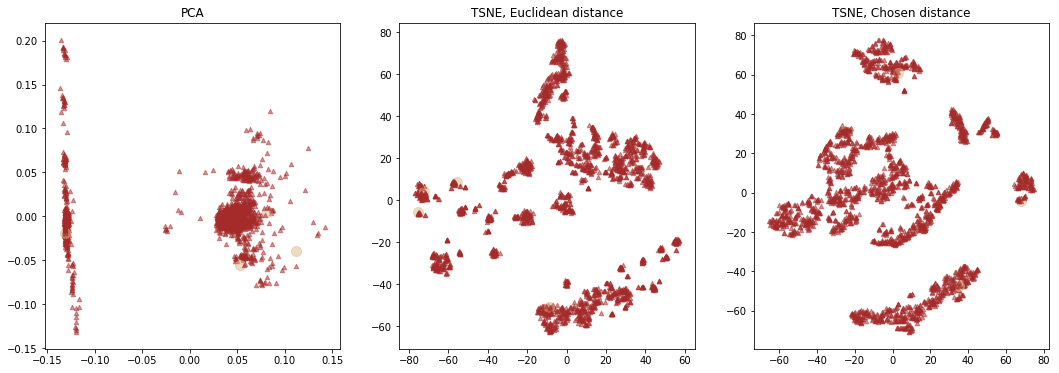

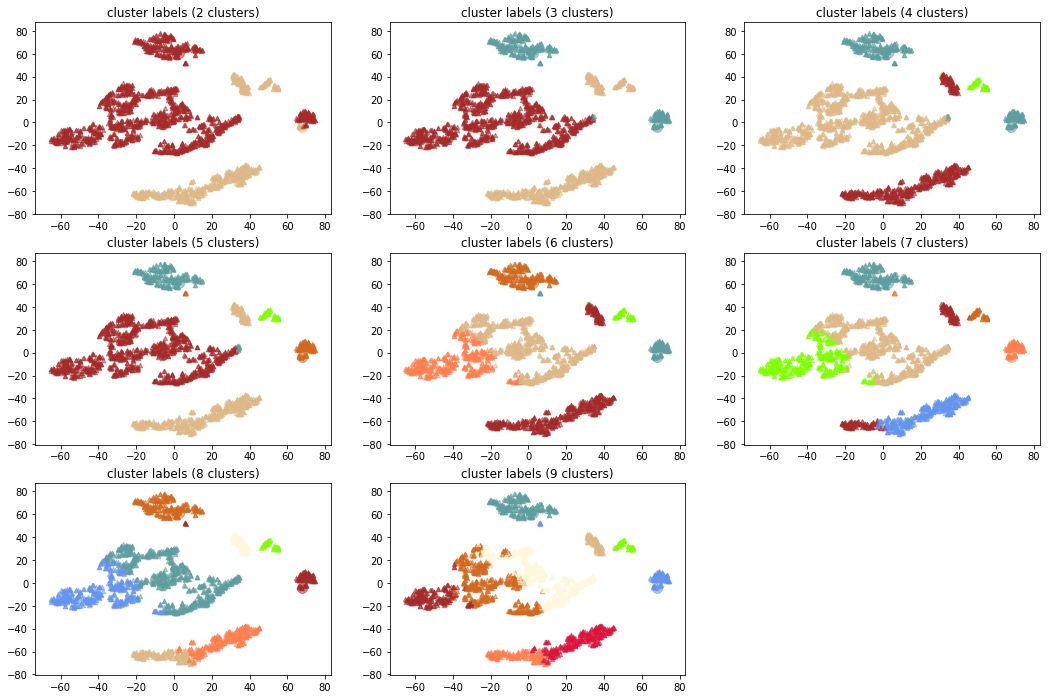

In [38]:
spectra_2D  = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

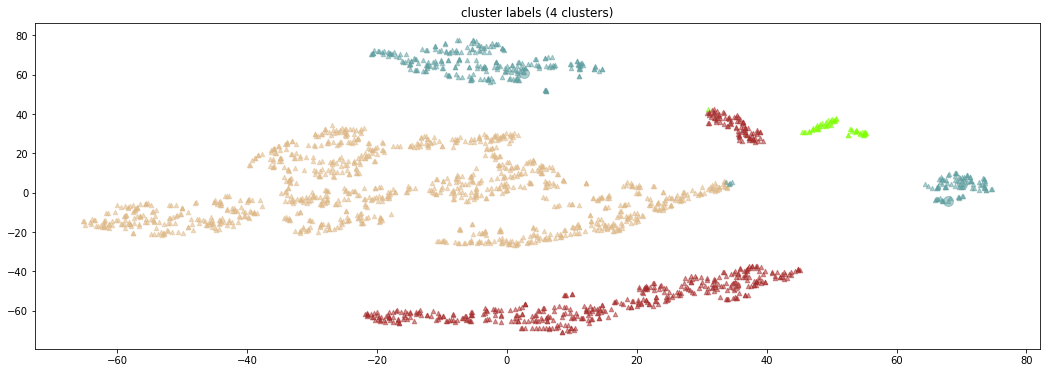

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
209          -0.000000         -0.000000          0.103970         -0.000000   
495          -0.000000          0.090377          0.091078          0.095727   
1610         -0.000000          0.089099          0.086865          0.086916   
1835          0.127572          0.114688          0.111631          0.117882   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
209           0.096625               0.080271            0.071880   
495          -0.000000               0.075041            0.066570   
1610          0.091221               0.070010            0.062826   
1835          0.116053               0.088584            0.079311   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
209           0.070557             0.074300           0.070641   
495           0.066411             0.068538           0.066934   
1610          0.060273             0.066035           0.061373   
1835          0.083231             0.080495           0.080552   

            ...                  gev_1FGL_Name  gev_CLASS1    gev_GLON  \
209         ...          b'1FGL J0240.5+6113 '    b'HMB  '  135.678848   
495         ...          b'                  '    b'PSR  '  284.083496   
1610        ...          b'1FGL J1826.2-1450 '    b'HMB  '   16.885555   
1835        ...          b'1FGL J2032.2+4127 '    b'PSR  '   80.218597   

      gev_GLAT       tev_fermi_names  tev_classes  tev_glat    tev_glon  \
209   1.086277                   b''       b'bin'  1.086135  135.675278   
495  -1.893881  b'1FGL J1018.6-5856'       b'bin' -1.779517  284.314087   
1610 -1.293795                   b''       b'bin' -1.289216   16.881586   
1835  1.018827                   b''      b'unid'  1.111117   80.299477   

     marked  KMeans_clusters_4  
209       1                  2  
495       1                  2  
1610      1                  2  
1835      1                  0  

[4 rows x 31 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
100   b'1FGL J0035.9+5951 '   b'bll  '             b''       b'hbl'   
101   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
102   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
103   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
104   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
105   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
106   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
107   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
108   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
109   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
110   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
111   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
112   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
113   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
114   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
115   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
116   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
118   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
120   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
121   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
122   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
123   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
124   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
125   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
126   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
127   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
128   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
129   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
130   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
131   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
...                     ...        ...             ...          ...   
1819  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1820  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1821  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1822  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1823  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1824  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1825  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1826  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1827  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1828  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1830  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1831  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1835  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1836  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1837  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1838  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1839  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1840  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1841  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1842  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1843  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1844  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1845  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1846  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1847  b'1FGL J2032.2+4127 '   b'PSR  '

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
0     b'1FGL J0007.0+7303 '   b'PSR  '             b''  b'pwn,snr'        []   
2     b'                  '   b'snr  '             b''      b'snr'        []   
3     b'                  '   b'snr  '             b''      b'snr'        []   
4     b'                  '   b'snr  '             b''      b'snr'        []   
5     b'                  '   b'snr  '             b''      b'snr'        []   
6     b'                  '   b'snr  '             b''      b'snr'        []   
7     b'                  '   b'snr  '             b''      b'snr'        []   
8     b'                  '   b'snr  '             b''      b'snr'        []   
11    b'                  '   b'snr  '             b''      b'snr'        []   
12    b'                  '   b'snr  '             b''      b'snr'        []   
13    b'                  '   b'snr  '             b''      b'snr'        []   
14    b'                  '   b'snr  '             b''      b'snr'        []   
15    b'                  '   b'snr  '             b''      b'snr'        []   
16    b'                  '   b'snr  '             b''      b'snr'        []   
17    b'                  '   b'snr  '             b''      b'snr'        []   
18    b'                  '   b'snr  '             b''      b'snr'        []   
21    b'                  '   b'snr  '             b''      b'snr'        []   
22    b'                  '   b'snr  '             b''      b'snr'        []   
23    b'                  '   b'snr  '             b''      b'snr'        []   
24    b'                  '   b'snr  '             b''      b'snr'        []   
25    b'                  '   b'snr  '             b''      b'snr'        []   
26    b'                  '   b'snr  '             b''      b'snr'        []   
27    b'                  '   b'snr  '             b''      b'snr'        []   
28    b'                  '   b'snr  '             b''      b'snr'        []   
29    b'                  '   b'snr  '             b''      b'snr'        []   
31    b'                  '   b'snr  '             b''      b'snr'        []   
33    b'                  '   b'snr  '             b''      b'snr'        []   
34    b'                  '   b'snr  '             b''      b'snr'        []   
35    b'                  '   b'snr  '             b''      b'snr'        []   
36    b'                  '   b'snr  '             b''      b'snr'        []   
...                     ...        ...             ...         ...       ...   
1940  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1941  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1942  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1943  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1944  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1945  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1946  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1947  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1949  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1951  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1953  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1954  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1955  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1956  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1957  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1958  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1959  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1960  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1961  b'1FGL J

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1     b'                  '   b'snr  '             b''      b'snr'   
9     b'                  '   b'snr  '             b''      b'snr'   
10    b'                  '   b'snr  '             b''      b'snr'   
19    b'                  '   b'snr  '             b''      b'snr'   
20    b'                  '   b'snr  '             b''      b'snr'   
30    b'                  '   b'snr  '             b''      b'snr'   
32    b'                  '   b'snr  '             b''      b'snr'   
37    b'                  '   b'snr  '             b''      b'snr'   
44    b'                  '   b'snr  '             b''      b'snr'   
45    b'                  '   b'snr  '             b''      b'snr'   
52    b'                  '   b'snr  '             b''      b'snr'   
55    b'                  '   b'snr  '             b''      b'snr'   
56    b'                  '   b'snr  '             b''      b'snr'   
84    b'                  '   b'snr  '             b''      b'snr'   
85    b'                  '   b'snr  '             b''      b'snr'   
197   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
207   b'                  '   b'bll  '             b''      b'hbl'   
209   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
211   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
212   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
214   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
218   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
224   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
225   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
229   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
233   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
271   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'   
273   b'                  '   b'     '             b''   b'snr,mc'   
275   b'                  '   b'     '             b''   b'snr,mc'   
276   b'                  '   b'     '             b''   b'snr,mc'   
...                     ...        ...             ...         ...   
1767  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1768  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1770  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1773  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1780  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1786  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1792  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1798  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
1800  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
1814  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
1832  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'   
1833  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'   
1834  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'   
1859  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1860  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1862  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1867  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1877  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1879  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1900  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1902  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1909  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1917  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1920  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1921  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1932  b'1FGL J2323.4+584

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1  \
117   b'1FGL J0047.3-2512 '   b'sbg  '   
119   b'1FGL J0047.3-2512 '   b'sbg  '   
133   b'1FGL J0047.3-2512 '   b'sbg  '   
138   b'1FGL J0047.3-2512 '   b'sbg  '   
149   b'1FGL J0047.3-2512 '   b'sbg  '   
151   b'1FGL J0047.3-2512 '   b'sbg  '   
164   b'1FGL J0205.6+6449 '   b'PSR  '   
178   b'1FGL J0205.6+6449 '   b'PSR  '   
242   b'                  '   b'rdg  '   
269   b'1FGL J0319.7+4130 '   b'RDG  '   
323   b'                  '   b'bll  '   
374   b'1FGL J0633.9+1746 '   b'PSR  '   
434   b'1FGL J0956.5+6938 '   b'sbg  '   
436   b'1FGL J0956.5+6938 '   b'sbg  '   
439   b'1FGL J0956.5+6938 '   b'sbg  '   
442   b'1FGL J0956.5+6938 '   b'sbg  '   
446   b'1FGL J0956.5+6938 '   b'sbg  '   
447   b'1FGL J0956.5+6938 '   b'sbg  '   
450   b'1FGL J0956.5+6938 '   b'sbg  '   
452   b'1FGL J0956.5+6938 '   b'sbg  '   
453   b'1FGL J0956.5+6938 '   b'sbg  '   
454   b'1FGL J0956.5+6938 '   b'sbg  '   
456   b'1FGL J0956.5+6938 '   b'sbg  '   
464   b'1FGL J0956.5+6938 '   b'sbg  '   
466   b'1FGL J0956.5+6938 '   b'sbg  '   
468   b'1FGL J0956.5+6938 '   b'sbg  '   
472   b'1FGL J0956.5+6938 '   b'sbg  '   
476   b'1FGL J1000.1+6539 '   b'bll  '   
772   b'1FGL J1119.4-6127c'   b'PSR  '   
775   b'1FGL J1119.4-6127c'   b'PSR  '   
849   b'1FGL J1322.0-4515 '   b'RDG  '   
856   b'1FGL J1322.0-4515 '   b'RDG  '   
857   b'1FGL J1322.0-4515 '   b'RDG  '   
862   b'1FGL J1322.0-4515 '   b'RDG  '   
869   b'1FGL J1322.0-4515 '   b'RDG  '   
874   b'1FGL J1322.0-4515 '   b'RDG  '   
886   b'1FGL J1322.0-4515 '   b'RDG  '   
895   b'1FGL J1322.0-4515 '   b'RDG  '   
897   b'1FGL J1322.0-4515 '   b'RDG  '   
902   b'1FGL J1322.0-4515 '   b'RDG  '   
1307  b'                  '   b'     '   
1331  b'                  '   b'     '   
1334  b'                  '   b'     '   
1336  b'                  '   b'     '   
1337  b'                  '   b'     '   
1340  b'                  '   b'     '   
1353  b'                  '   b'     '   
1543  b'1FGL J1813.3-1246 '   b'PSR  '   
1629  b'1FGL J1833.5-1034 '   b'PSR  '   
1741  b'1FGL J1922.9+1411 '   b'SNR  '   
1744  b'1FGL J1922.9+1411 '   b'SNR  '   
1829  b'1FGL J2021.0+3651 '   b'PSR  '   

                                        tev_fermi_names  tev_classes  \
117                                                 b''    b'galaxy'   
119                                                 b''    b'galaxy'   
133                                                 b''    b'galaxy'   
138                                                 b''    b'galaxy'   
149                                                 b''    b'galaxy'   
151                                                 b''    b'galaxy'   
164                                                 b''       b'pwn'   
178                                                 b''       b'pwn'   
242                                                 b''       b'hbl'   
269                                                 b''       b'fri'   
323                                                 b''       b'hbl'   
374                                                 b''   b'psr,pwn'   
434   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
436   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
439   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
442   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
446   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
447   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
450   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
452   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
453   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
454   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
456   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
464   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0               0.096332            0.088647          0.089981   
1               0.060549            0.058735          0.063807   
2               0.068039            0.064298          0.069439   
3               0.127635            0.119580          0.120424   

   gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0             0.090346           0.088520              0.0    0.000864   
1             0.059254           0.058832              0.0    0.060110   
2             0.065290           0.064276              0.0    0.066854   
3             0.122694           0.119391              0.0    0.000000   

   tev_1TeV  tev_3TeV  tev_10TeV  tev_30TeV  xmm_SC_EP_1_FLUX  \
0  0.000900  0.000906   0.000951   0.001006          0.113334   
1  0.062172  0.063935   0.066609   0.069428          0.079352   
2  0.068625  0.069667   0.069448   0.071001          0.061033   
3  0.000000  0.000000   0.000000   0.000000          0.113118   

   xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  xmm_SC_EP_5_FLUX  
0          0.110462          0.109662          0.105797          0.102291  
1          0.076914          0.074716          0.073033          0.072553  
2          0.070080          0.072622          0.070227          0.049099  
3          0.095788          0.082115          0.056121          0.043134

In [39]:
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 4, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [40]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'1FGL J0035.9+5951 '" "b'1FGL J0047.3-2512 '" "b'1FGL J0205.6+6449 '"
 "b'                  '" "b'1FGL J0319.7+4130 '" "b'1FGL J0633.9+1746 '"
 "b'1FGL J0650.7+2503 '" "b'1FGL J0956.5+6938 '" "b'1FGL J1000.1+6539 '"
 "b'1FGL J1119.4-6127c'" "b'1FGL J1221.3+3008 '" "b'1FGL J1230.8+1223 '"
 "b'1FGL J1322.0-4515 '" "b'1FGL J1747.9-2448 '" "b'1FGL J1813.3-1246 '"
 "b'1FGL J1834.3-0842c'" "b'1FGL J1833.5-1034 '" "b'1FGL J1850.2-0019c'"
 "b'1FGL J1922.9+1411 '" "b'1FGL J2000.0+6508 '" "b'1FGL J2001.1+4351 '"
 "b'1FGL J2021.0+3651 '" "b'1FGL J2032.2+4127 '" "b'1FGL J2323.4+5849 '"]
['[]'
 '["b\'[CHP2004] J095549.8+693934\'" "b\'[MTK2001b] 8\'"\n "b\'[CHP2004] J095637.5+694137\'" "b\'CXOU J095601.7+694308\'"\n "b\'CXOU J095548.9+694010\'" "b\'CXOU J095527.1+693923\'"\n "b\'CXOU J095552.8+694020\'" "b\'CXOU J095552.4+694024\'"\n "b\'CXOU J095550.7+694039\'" "b\'CXOU J095547.5+694120\'"\n "b\'CXOU J095527.2+694050\'" "b\'CXOU J095600.7+694107\'"\n "b\'CXOU J095549.1+694036

[0.2, 0.17, 0.14, 0.11, 0.08, 0.05, 0.02]


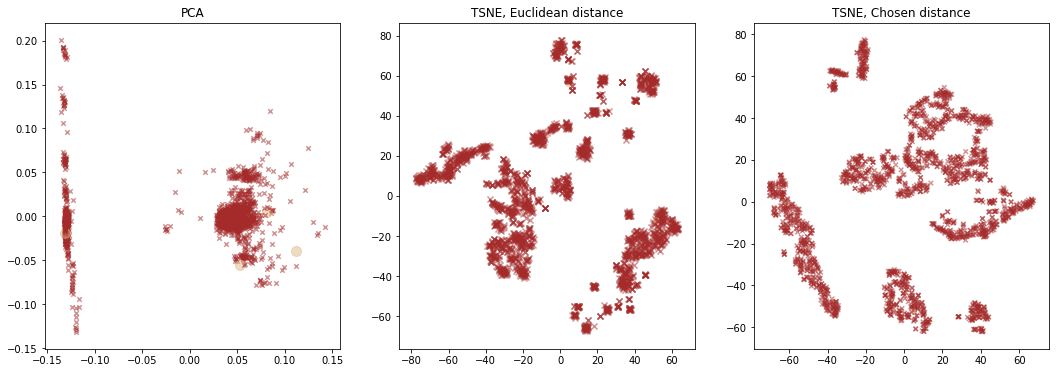

Clustering


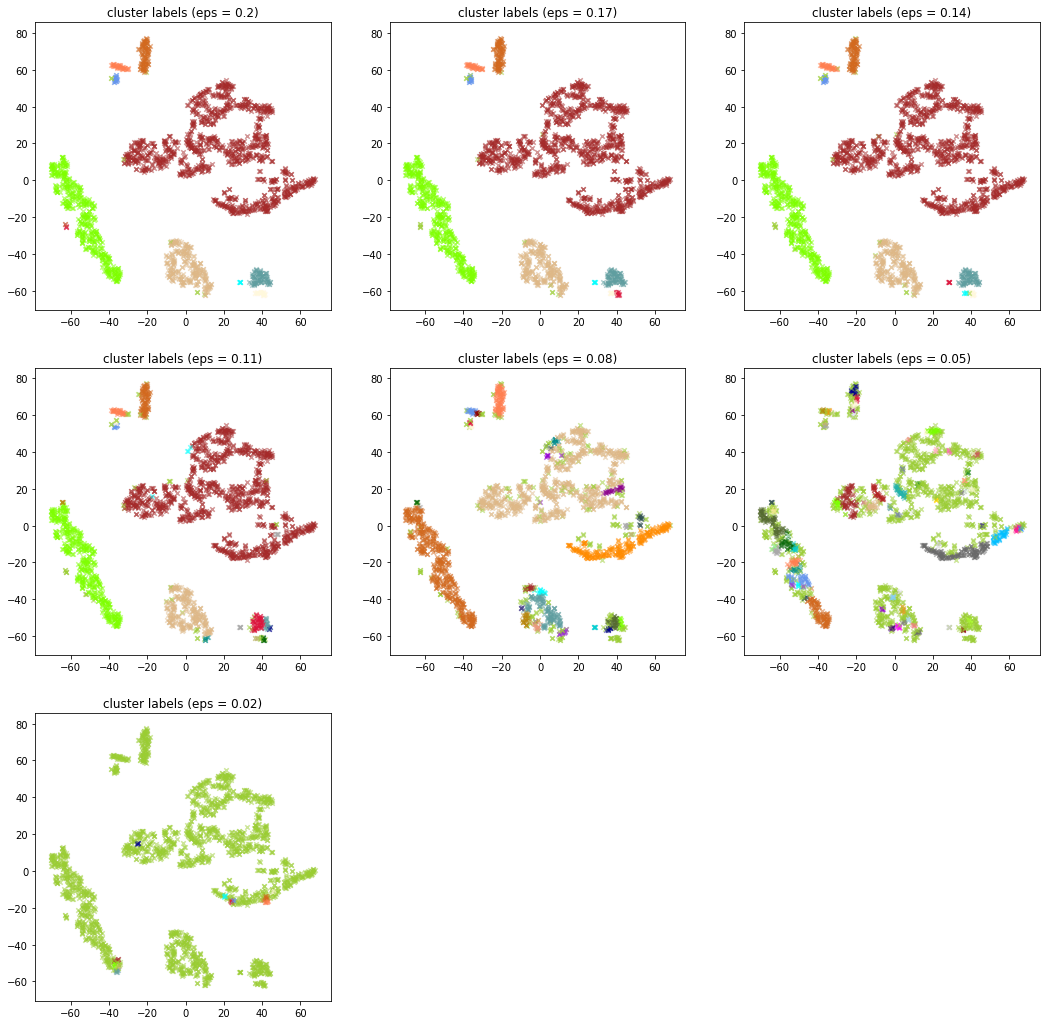

In [41]:
eps_l = [0.01 * i for i in range(20, 0, -3)]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)


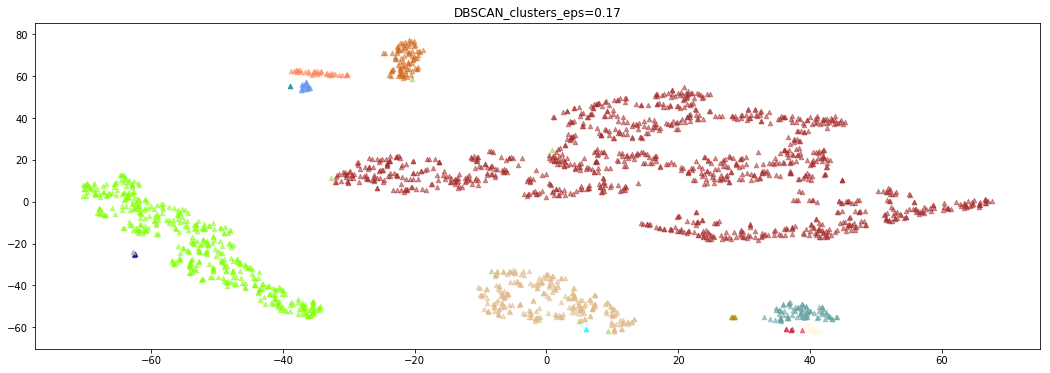

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
209          -0.000000         -0.000000          0.103970         -0.000000   
495          -0.000000          0.090377          0.091078          0.095727   
1610         -0.000000          0.089099          0.086865          0.086916   
1835          0.127572          0.114688          0.111631          0.117882   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
209           0.096625               0.080271            0.071880   
495          -0.000000               0.075041            0.066570   
1610          0.091221               0.070010            0.062826   
1835          0.116053               0.088584            0.079311   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
209           0.070557             0.074300           0.070641   
495           0.066411             0.068538           0.066934   
1610          0.060273             0.066035           0.061373   
1835          0.083231             0.080495           0.080552   

                ...                     gev_1FGL_Name  gev_CLASS1    gev_GLON  \
209             ...             b'1FGL J0240.5+6113 '    b'HMB  '  135.678848   
495             ...             b'                  '    b'PSR  '  284.083496   
1610            ...             b'1FGL J1826.2-1450 '    b'HMB  '   16.885555   
1835            ...             b'1FGL J2032.2+4127 '    b'PSR  '   80.218597   

      gev_GLAT       tev_fermi_names  tev_classes  tev_glat    tev_glon  \
209   1.086277                   b''       b'bin'  1.086135  135.675278   
495  -1.893881  b'1FGL J1018.6-5856'       b'bin' -1.779517  284.314087   
1610 -1.293795                   b''       b'bin' -1.289216   16.881586   
1835  1.018827                   b''      b'unid'  1.111117   80.299477   

     marked  DBSCAN_clusters_eps=0.17  
209       1                         7  
495       1                         2  
1610      1                         1  
1835      1                         3  

[4 rows x 31 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
0     b'1FGL J0007.0+7303 '   b'PSR  '             b''  b'pwn,snr'        []   
2     b'                  '   b'snr  '             b''      b'snr'        []   
3     b'                  '   b'snr  '             b''      b'snr'        []   
4     b'                  '   b'snr  '             b''      b'snr'        []   
5     b'                  '   b'snr  '             b''      b'snr'        []   
6     b'                  '   b'snr  '             b''      b'snr'        []   
7     b'                  '   b'snr  '             b''      b'snr'        []   
8     b'                  '   b'snr  '             b''      b'snr'        []   
11    b'                  '   b'snr  '             b''      b'snr'        []   
12    b'                  '   b'snr  '             b''      b'snr'        []   
13    b'                  '   b'snr  '             b''      b'snr'        []   
14    b'                  '   b'snr  '             b''      b'snr'        []   
15    b'                  '   b'snr  '             b''      b'snr'        []   
16    b'                  '   b'snr  '             b''      b'snr'        []   
17    b'                  '   b'snr  '             b''      b'snr'        []   
18    b'                  '   b'snr  '             b''      b'snr'        []   
21    b'                  '   b'snr  '             b''      b'snr'        []   
22    b'                  '   b'snr  '             b''      b'snr'        []   
23    b'                  '   b'snr  '             b''      b'snr'        []   
24    b'                  '   b'snr  '             b''      b'snr'        []   
25    b'                  '   b'snr  '             b''      b'snr'        []   
26    b'                  '   b'snr  '             b''      b'snr'        []   
27    b'                  '   b'snr  '             b''      b'snr'        []   
28    b'                  '   b'snr  '             b''      b'snr'        []   
29    b'                  '   b'snr  '             b''      b'snr'        []   
31    b'                  '   b'snr  '             b''      b'snr'        []   
33    b'                  '   b'snr  '             b''      b'snr'        []   
34    b'                  '   b'snr  '             b''      b'snr'        []   
35    b'                  '   b'snr  '             b''      b'snr'        []   
36    b'                  '   b'snr  '             b''      b'snr'        []   
...                     ...        ...             ...         ...       ...   
1940  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1941  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1942  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1943  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1944  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1945  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1946  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1947  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1949  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1951  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1953  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1954  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1955  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1956  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1957  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1958  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1959  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1960  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1961  b'1FGL J

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1  \
1     b'                  '   b'snr  '   
9     b'                  '   b'snr  '   
10    b'                  '   b'snr  '   
19    b'                  '   b'snr  '   
20    b'                  '   b'snr  '   
30    b'                  '   b'snr  '   
32    b'                  '   b'snr  '   
37    b'                  '   b'snr  '   
44    b'                  '   b'snr  '   
52    b'                  '   b'snr  '   
56    b'                  '   b'snr  '   
85    b'                  '   b'snr  '   
197   b'1FGL J0222.6+4302 '   b'BLL  '   
207   b'                  '   b'bll  '   
214   b'1FGL J0240.5+6113 '   b'HMB  '   
225   b'1FGL J0240.5+6113 '   b'HMB  '   
233   b'1FGL J0240.5+6113 '   b'HMB  '   
271   b'1FGL J0416.8+0107 '   b'bll  '   
292   b'                  '   b'     '   
300   b'                  '   b'     '   
352   b'1FGL J0617.2+2233 '   b'SNR  '   
356   b'1FGL J0617.2+2233 '   b'SNR  '   
359   b'1FGL J0617.2+2233 '   b'SNR  '   
373   b'1FGL J0617.2+2233 '   b'SNR  '   
389   b'1FGL J0721.9+7120 '   b'BLL  '   
390   b'1FGL J0721.9+7120 '   b'BLL  '   
392   b'1FGL J0721.9+7120 '   b'BLL  '   
396   b'1FGL J0721.9+7120 '   b'BLL  '   
399   b'1FGL J0721.9+7120 '   b'BLL  '   
400   b'1FGL J0854.0-4632 '   b'SNR  '   
...                     ...        ...   
1714  b'                  '   b'     '   
1715  b'                  '   b'     '   
1718  b'1FGL J1907.9+0602 '   b'PSR  '   
1719  b'1FGL J1907.9+0602 '   b'PSR  '   
1727  b'1FGL J1910.9+0906c'   b'snr  '   
1731  b'1FGL J1910.9+0906c'   b'snr  '   
1751  b'                  '   b'     '   
1755  b'                  '   b'     '   
1765  b'1FGL J2009.5-4849 '   b'BLL  '   
1766  b'1FGL J2009.5-4849 '   b'BLL  '   
1767  b'1FGL J2009.5-4849 '   b'BLL  '   
1768  b'1FGL J2009.5-4849 '   b'BLL  '   
1770  b'1FGL J2009.5-4849 '   b'BLL  '   
1773  b'1FGL J2009.5-4849 '   b'BLL  '   
1780  b'1FGL J2015.7+3708 '   b'FSRQ '   
1786  b'1FGL J2015.7+3708 '   b'FSRQ '   
1798  b'1FGL J2015.7+3708 '   b'FSRQ '   
1800  b'1FGL J2015.7+3708 '   b'FSRQ '   
1833  b'1FGL J2020.0+4049 '   b'SNR  '   
1859  b'1FGL J2323.4+5849 '   b'snr  '   
1860  b'1FGL J2323.4+5849 '   b'snr  '   
1862  b'1FGL J2323.4+5849 '   b'snr  '   
1877  b'1FGL J2323.4+5849 '   b'snr  '   
1879  b'1FGL J2323.4+5849 '   b'snr  '   
1909  b'1FGL J2323.4+5849 '   b'snr  '   
1920  b'1FGL J2323.4+5849 '   b'snr  '   
1921  b'1FGL J2323.4+5849 '   b'snr  '   
1948  b'1FGL J2359.0-3035 '   b'bll  '   
1952  b'1FGL J2359.0-3035 '   b'bll  '   
1972  b'1FGL J2359.0-3035 '   b'bll  '   

                                        tev_fermi_names tev_classes  \
1                                                   b''      b'snr'   
9                                                   b''      b'snr'   
10                                                  b''      b'snr'   
19                                                  b''      b'snr'   
20                                                  b''      b'snr'   
30                                                  b''      b'snr'   
32                                                  b''      b'snr'   
37                                                  b''      b'snr'   
44                                                  b''      b'snr'   
52                                                  b''      b'snr'   
56                                                  b''      b'snr'   
85                                                  b''      b'snr'   
197                                                 b''      b'ibl'   
207                                                 b''      b'hbl'   
214                                                 b''      b'bin'   
225                                                 b''      b'bin'   
233                                                 b''      b'bin'   
271                                                 b''      b'hbl'   
292                                                 b''   b'

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1  \
45    b'                  '   b'snr  '   
55    b'                  '   b'snr  '   
84    b'                  '   b'snr  '   
211   b'1FGL J0240.5+6113 '   b'HMB  '   
212   b'1FGL J0240.5+6113 '   b'HMB  '   
218   b'1FGL J0240.5+6113 '   b'HMB  '   
224   b'1FGL J0240.5+6113 '   b'HMB  '   
229   b'1FGL J0240.5+6113 '   b'HMB  '   
273   b'                  '   b'     '   
275   b'                  '   b'     '   
276   b'                  '   b'     '   
355   b'1FGL J0617.2+2233 '   b'SNR  '   
402   b'1FGL J0854.0-4632 '   b'SNR  '   
406   b'1FGL J0854.0-4632 '   b'SNR  '   
412   b'1FGL J0854.0-4632 '   b'SNR  '   
415   b'1FGL J0854.0-4632 '   b'SNR  '   
495   b'                  '   b'PSR  '   
937   b'1FGL J1418.7-6057 '   b'PSR  '   
989   b'1FGL J1513.2-5904 '   b'PSR  '   
1058  b'                  '   b'psr  '   
1084  b'                  '   b'psr  '   
1089  b'                  '   b'psr  '   
1090  b'                  '   b'psr  '   
1141  b'1FGL J1711.7-3944c'   b'SNR  '   
1146  b'1FGL J1711.7-3944c'   b'SNR  '   
1147  b'1FGL J1711.7-3944c'   b'SNR  '   
1172  b'1FGL J1718.2-3825 '   b'PSR  '   
1178  b'1FGL J1718.2-3825 '   b'PSR  '   
1184  b'                  '   b'     '   
1200  b'                  '   b'     '   
...                     ...        ...   
1379  b'                  '   b'     '   
1389  b'                  '   b'     '   
1398  b'                  '   b'     '   
1448  b'                  '   b'     '   
1471  b'                  '   b'     '   
1528  b'1FGL J1808.5-1954c'   b'glc  '   
1564  b'                  '   b'     '   
1575  b'                  '   b'     '   
1598  b'1FGL J1826.1-1256 '   b'PSR  '   
1616  b'1FGL J1826.2-1450 '   b'HMB  '   
1633  b'1FGL J1834.3-0842c'   b'snr  '   
1645  b'1FGL J1834.3-0842c'   b'snr  '   
1649  b'1FGL J1837.5-0659c'   b'PWN  '   
1653  b'1FGL J1837.5-0659c'   b'PWN  '   
1658  b'                  '   b'PSR  '   
1660  b'                  '   b'PSR  '   
1662  b'                  '   b'PSR  '   
1689  b'1FGL J1848.1-0145c'   b'     '   
1717  b'1FGL J1907.9+0602 '   b'PSR  '   
1728  b'1FGL J1910.9+0906c'   b'snr  '   
1756  b'                  '   b'     '   
1792  b'1FGL J2015.7+3708 '   b'FSRQ '   
1814  b'1FGL J2015.7+3708 '   b'FSRQ '   
1832  b'1FGL J2020.0+4049 '   b'SNR  '   
1834  b'1FGL J2020.0+4049 '   b'SNR  '   
1867  b'1FGL J2323.4+5849 '   b'snr  '   
1900  b'1FGL J2323.4+5849 '   b'snr  '   
1902  b'1FGL J2323.4+5849 '   b'snr  '   
1917  b'1FGL J2323.4+5849 '   b'snr  '   
1950  b'1FGL J2359.0-3035 '   b'bll  '   

                                        tev_fermi_names tev_classes  \
45                                                  b''      b'snr'   
55                                                  b''      b'snr'   
84                                                  b''      b'snr'   
211                                                 b''      b'bin'   
212                                                 b''      b'bin'   
218                                                 b''      b'bin'   
224                                                 b''      b'bin'   
229                                                 b''      b'bin'   
273                                                 b''   b'snr,mc'   
275                                                 b''   b'snr,mc'   
276                                                 b''   b'snr,mc'   
355                                                 b''      b'snr'   
402   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
406   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
412   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
415   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
495                                b'1FGL J1018.6-5856'      b'bin'   
937                                                 b''      b'pwn'   
989                                                 b''     

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
100   b'1FGL J0035.9+5951 '   b'bll  '             b''       b'hbl'   
101   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
102   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
103   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
104   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
105   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
106   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
107   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
108   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
109   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
112   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
113   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
114   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
116   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
118   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
120   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
121   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
122   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
123   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
124   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
125   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
126   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
128   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
129   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
130   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
131   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
132   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
134   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
135   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
136   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
...                     ...        ...             ...          ...   
1758  b'1FGL J2001.1+4351 '   b'bll  '             b''       b'ibl'   
1759  b'1FGL J2001.1+4351 '   b'bll  '             b''       b'ibl'   
1761  b'1FGL J2001.1+4351 '   b'bll  '             b''       b'ibl'   
1818  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1820  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1821  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1822  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1823  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1824  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1825  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1826  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1827  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1828  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1830  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1831  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1835  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1836  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1837  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1838  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1839  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1840  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1841  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1842  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1844  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1845  b'1FGL J2032.2+4127 '   b'PSR  '

4 cluster (#D2691E)


gev_1FGL_Name gev_CLASS1  \
110   b'1FGL J0047.3-2512 '   b'sbg  '   
111   b'1FGL J0047.3-2512 '   b'sbg  '   
115   b'1FGL J0047.3-2512 '   b'sbg  '   
127   b'1FGL J0047.3-2512 '   b'sbg  '   
137   b'1FGL J0047.3-2512 '   b'sbg  '   
141   b'1FGL J0047.3-2512 '   b'sbg  '   
148   b'1FGL J0047.3-2512 '   b'sbg  '   
152   b'1FGL J0047.3-2512 '   b'sbg  '   
153   b'1FGL J0047.3-2512 '   b'sbg  '   
154   b'1FGL J0047.3-2512 '   b'sbg  '   
155   b'1FGL J0205.6+6449 '   b'PSR  '   
170   b'1FGL J0205.6+6449 '   b'PSR  '   
243   b'                  '   b'rdg  '   
244   b'                  '   b'rdg  '   
263   b'1FGL J0319.7+4130 '   b'RDG  '   
265   b'1FGL J0319.7+4130 '   b'RDG  '   
326   b'                  '   b'bll  '   
337   b'                  '   b'bll  '   
338   b'                  '   b'bll  '   
343   b'                  '   b'bll  '   
345   b'                  '   b'bll  '   
347   b'                  '   b'bll  '   
379   b'1FGL J0633.9+1746 '   b'PSR  '   
431   b'1FGL J0956.5+6938 '   b'sbg  '   
433   b'1FGL J0956.5+6938 '   b'sbg  '   
436   b'1FGL J0956.5+6938 '   b'sbg  '   
438   b'1FGL J0956.5+6938 '   b'sbg  '   
451   b'1FGL J0956.5+6938 '   b'sbg  '   
457   b'1FGL J0956.5+6938 '   b'sbg  '   
458   b'1FGL J0956.5+6938 '   b'sbg  '   
...                     ...        ...   
1300  b'                  '   b'     '   
1308  b'                  '   b'     '   
1312  b'                  '   b'     '   
1316  b'                  '   b'     '   
1319  b'                  '   b'     '   
1321  b'                  '   b'     '   
1323  b'                  '   b'     '   
1325  b'                  '   b'     '   
1333  b'                  '   b'     '   
1345  b'                  '   b'     '   
1355  b'                  '   b'     '   
1360  b'                  '   b'     '   
1361  b'                  '   b'     '   
1460  b'1FGL J1747.9-2448 '   b'glc  '   
1544  b'1FGL J1813.3-1246 '   b'PSR  '   
1546  b'1FGL J1813.3-1246 '   b'PSR  '   
1631  b'1FGL J1833.5-1034 '   b'PSR  '   
1670  b'                  '   b'     '   
1679  b'                  '   b'     '   
1680  b'                  '   b'     '   
1682  b'                  '   b'     '   
1686  b'                  '   b'     '   
1688  b'                  '   b'     '   
1703  b'1FGL J1850.2-0019c'   b'     '   
1705  b'1FGL J1850.2-0019c'   b'     '   
1709  b'1FGL J1850.2-0019c'   b'     '   
1746  b'1FGL J1922.9+1411 '   b'SNR  '   
1760  b'1FGL J2001.1+4351 '   b'bll  '   
1819  b'1FGL J2021.0+3651 '   b'PSR  '   
1843  b'1FGL J2032.2+4127 '   b'PSR  '   

                                        tev_fermi_names  tev_classes  \
110                                                 b''    b'galaxy'   
111                                                 b''    b'galaxy'   
115                                                 b''    b'galaxy'   
127                                                 b''    b'galaxy'   
137                                                 b''    b'galaxy'   
141                                                 b''    b'galaxy'   
148                                                 b''    b'galaxy'   
152                                                 b''    b'galaxy'   
153                                                 b''    b'galaxy'   
154                                                 b''    b'galaxy'   
155                                                 b''       b'pwn'   
170                                                 b''       b'pwn'   
243                                                 b''       b'hbl'   
244                                                 b''       b'hbl'   
263                                                 b''       b'fri'   
265                                                 b''       b'fri'   
326                                                 b''       b'hbl'   
337                                                 b''       b'hbl'   
338                                      

5 cluster (#FF7F50)


gev_1FGL_Name gev_CLASS1  \
117   b'1FGL J0047.3-2512 '   b'sbg  '   
119   b'1FGL J0047.3-2512 '   b'sbg  '   
133   b'1FGL J0047.3-2512 '   b'sbg  '   
178   b'1FGL J0205.6+6449 '   b'PSR  '   
242   b'                  '   b'rdg  '   
269   b'1FGL J0319.7+4130 '   b'RDG  '   
323   b'                  '   b'bll  '   
374   b'1FGL J0633.9+1746 '   b'PSR  '   
439   b'1FGL J0956.5+6938 '   b'sbg  '   
442   b'1FGL J0956.5+6938 '   b'sbg  '   
447   b'1FGL J0956.5+6938 '   b'sbg  '   
450   b'1FGL J0956.5+6938 '   b'sbg  '   
452   b'1FGL J0956.5+6938 '   b'sbg  '   
453   b'1FGL J0956.5+6938 '   b'sbg  '   
456   b'1FGL J0956.5+6938 '   b'sbg  '   
466   b'1FGL J0956.5+6938 '   b'sbg  '   
468   b'1FGL J0956.5+6938 '   b'sbg  '   
476   b'1FGL J1000.1+6539 '   b'bll  '   
772   b'1FGL J1119.4-6127c'   b'PSR  '   
775   b'1FGL J1119.4-6127c'   b'PSR  '   
849   b'1FGL J1322.0-4515 '   b'RDG  '   
856   b'1FGL J1322.0-4515 '   b'RDG  '   
857   b'1FGL J1322.0-4515 '   b'RDG  '   
862   b'1FGL J1322.0-4515 '   b'RDG  '   
1307  b'                  '   b'     '   
1334  b'                  '   b'     '   
1337  b'                  '   b'     '   
1340  b'                  '   b'     '   
1543  b'1FGL J1813.3-1246 '   b'PSR  '   
1629  b'1FGL J1833.5-1034 '   b'PSR  '   
1741  b'1FGL J1922.9+1411 '   b'SNR  '   
1744  b'1FGL J1922.9+1411 '   b'SNR  '   

                                        tev_fermi_names tev_classes  \
117                                                 b''   b'galaxy'   
119                                                 b''   b'galaxy'   
133                                                 b''   b'galaxy'   
178                                                 b''      b'pwn'   
242                                                 b''      b'hbl'   
269                                                 b''      b'fri'   
323                                                 b''      b'hbl'   
374                                                 b''  b'psr,pwn'   
439   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
442   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
447   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
450   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
452   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
453   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
456   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
466   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
468   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
476                                                 b''   b'blazar'   
772                                                 b''      b'pwn'   
775                                                 b''      b'pwn'   
849                                                 b''      b'fri'   
856                                                 b''      b'fri'   
857                                                 b''      b'fri'   
862                                                 b''      b'fri'   
1307                                                b''     b'unid'   
1334                                                b''     b'unid'   
1337                                                b''     b'unid'   
1340                                                b''     b'unid'   
1543                                                b''     b'unid'   
1629                                                b''      b'pwn'   
1741                                                b''   b'snr,mc'   
1744                                                b''   b'snr,mc'   

                                              s_MAIN_ID   s_class  s_simbad  \
117                                                  []        []         0   
119                                                  []        []         0   
133                                           

6 cluster (#6495ED)


gev_1FGL_Name gev_CLASS1  \
138   b'1FGL J0047.3-2512 '   b'sbg  '   
149   b'1FGL J0047.3-2512 '   b'sbg  '   
151   b'1FGL J0047.3-2512 '   b'sbg  '   
164   b'1FGL J0205.6+6449 '   b'PSR  '   
434   b'1FGL J0956.5+6938 '   b'sbg  '   
446   b'1FGL J0956.5+6938 '   b'sbg  '   
454   b'1FGL J0956.5+6938 '   b'sbg  '   
464   b'1FGL J0956.5+6938 '   b'sbg  '   
472   b'1FGL J0956.5+6938 '   b'sbg  '   
869   b'1FGL J1322.0-4515 '   b'RDG  '   
874   b'1FGL J1322.0-4515 '   b'RDG  '   
886   b'1FGL J1322.0-4515 '   b'RDG  '   
895   b'1FGL J1322.0-4515 '   b'RDG  '   
897   b'1FGL J1322.0-4515 '   b'RDG  '   
902   b'1FGL J1322.0-4515 '   b'RDG  '   
1331  b'                  '   b'     '   
1829  b'1FGL J2021.0+3651 '   b'PSR  '   

                                        tev_fermi_names  tev_classes  \
138                                                 b''    b'galaxy'   
149                                                 b''    b'galaxy'   
151                                                 b''    b'galaxy'   
164                                                 b''       b'pwn'   
434   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
446   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
454   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
464   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
472   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...    b'galaxy'   
869                                                 b''       b'fri'   
874                                                 b''       b'fri'   
886                                                 b''       b'fri'   
895                                                 b''       b'fri'   
897                                                 b''       b'fri'   
902                                                 b''       b'fri'   
1331                                                b''      b'unid'   
1829                                                b''  b'pwn,unid'   

                                              s_MAIN_ID   s_class  s_simbad  \
138                                                  []        []         0   
149                                                  []        []         0   
151                                                  []        []         0   
164                                                  []        []         0   
434   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
446   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
454   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
464   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
472   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
869                                                  []        []         0   
874                                                  []        []         0   
886                                                  []        []         0   
895                                                  []        []         0   
897                                                  []        []         0   
902                                                  []        []         0   
1331                                ["b'[MCD2010] 13'"]     ['O']         1   
1829                                                 []        []         0   

      marked               xmm_IAUNAME  \
138        0  b'3XMM J004737.3-251817'   
149        0  b'3XMM J004744.6-251710'   
151        0  b'3XMM J004745.6-251656'   
164        0  b'3XMM J020523.4+644807'   
434        0  b'3XMM J095542.8+694208'   
446        0  b'3XMM J095551.5+693939'   
454        0  b'3XMM J095556.3+694159'   
464        0  b'3XMM J095604.9+693731'   
472        0  b'3XMM J095621.5+693901'   
869        0  b'3XMM J132526.1-425843'   
874        0  b'3XMM J132526.9-425853'   
886        0  b'3XMM J132531.8-42

7 cluster (#FFF8DC)


gev_1FGL_Name gev_CLASS1  \
209   b'1FGL J0240.5+6113 '   b'HMB  '   
416   b'1FGL J0854.0-4632 '   b'SNR  '   
418   b'1FGL J0854.0-4632 '   b'SNR  '   
948   b'1FGL J1428.7+4239 '   b'bll  '   
1049  b'1FGL J1626.0-4917c'   b'     '   
1236  b'                  '   b'     '   
1250  b'                  '   b'     '   
1429  b'                  '   b'     '   
1520  b'1FGL J1808.5-1954c'   b'glc  '   
1656  b'1FGL J1837.5-0659c'   b'PWN  '   

                                        tev_fermi_names tev_classes  \
209                                                 b''      b'bin'   
416   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
418   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
948                                                 b''      b'hbl'   
1049                                                b''     b'unid'   
1236                                                b''     b'unid'   
1250                                                b''     b'unid'   
1429                                                b''     b'unid'   
1520                                                b''     b'unid'   
1656                                                b''      b'pwn'   

                                              s_MAIN_ID             s_class  \
209         ["b'LS   I +61  303'" "b'LS   I +61  303'"]            ['B0Ve']   
416                                                  []                  []   
418                                                  []                  []   
948                                                  []                  []   
1049                                                 []                  []   
1236  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1250  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1429              ["b'[MCD2010] 18'" "b'[MCD2010] 13'"]               ['O']   
1520                                                 []                  []   
1656                                                 []                  []   

      s_simbad  marked               xmm_IAUNAME  \
209          1       1  b'3XMM J024005.3+611247'   
416          0       0  b'3XMM J085159.4-461830'   
418          0       0  b'3XMM J085203.1-461742'   
948          0       0  b'3XMM J142822.5+424000'   
1049         0       0  b'3XMM J162546.2-490613'   
1236         1       0  b'3XMM J174537.8-290214'   
1250         1       0  b'3XMM J174541.3-285731'   
1429         1       0  b'3XMM J174634.4-285235'   
1520         0       0  b'3XMM J180750.6-202455'   
1656         0       0  b'3XMM J183754.5-065456'   

                                        xmm_WEBPAGE_URL  
209   b'http://xmm-catalog.irap.omp.eu/source/205059...  
416   b'http://xmm-catalog.irap.omp.eu/source/201477...  
418   b'http://xmm-catalog.irap.omp.eu/source/206525...  
948   b'http://xmm-catalog.irap.omp.eu/source/203001...  
1049  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1236  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1250  b'http://xmm-catalog.irap.omp.eu/source/207901...  
1429  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1520  b'http://xmm-catalog.irap.omp.eu/source/205021...  
1656  b'http://xmm-catalog.irap.omp.eu/source/205529...

8 cluster (#DC143C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
369   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
1692  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1695  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1697  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1698  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1932  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   

             s_MAIN_ID   s_class  s_simbad  marked               xmm_IAUNAME  \
369   ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061803.6+224102'   
1692                []        []         0       0  b'3XMM J184829.8-015011'   
1695                []        []         0       0  b'3XMM J184829.8-014540'   
1697                []        []         0       0  b'3XMM J184830.0-014427'   
1698                []        []         0       0  b'3XMM J184830.0-014456'   
1932                []        []         0       0  b'3XMM J232340.7+585032'   

                                        xmm_WEBPAGE_URL  
369   b'http://xmm-catalog.irap.omp.eu/source/203019...  
1692  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1695  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1697  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1698  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1932  b'http://xmm-catalog.irap.omp.eu/source/201655...

9 cluster (#00FFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
546  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
616  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
546      []         0       0  b'3XMM J110418.7+381227'   
616      []         0       0  b'3XMM J110425.5+381133'   

                                       xmm_WEBPAGE_URL  
546  b'http://xmm-catalog.irap.omp.eu/source/201365...  
616  b'http://xmm-catalog.irap.omp.eu/source/201365...

10 cluster (#00008B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1182  b'                  '   b'     '             b''     b'unid'   
1188  b'                  '   b'     '             b''     b'unid'   
1420  b'                  '   b'     '             b''     b'unid'   

                                              s_MAIN_ID             s_class  \
1182  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1188  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1420              ["b'[MCD2010] 18'" "b'[MCD2010] 13'"]               ['O']   

      s_simbad  marked               xmm_IAUNAME  \
1182         1       0  b'3XMM J174525.1-290011'   
1188         1       0  b'3XMM J174527.6-290229'   
1420         1       0  b'3XMM J174628.7-285347'   

                                        xmm_WEBPAGE_URL  
1182  b'http://xmm-catalog.irap.omp.eu/source/206904...  
1188  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1420  b'http://xmm-catalog.irap.omp.eu/source/201113...

11 cluster (#008B8B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1336  b'                  '   b'     '             b''     b'unid'   
1353  b'                  '   b'     '             b''     b'unid'   

                s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1336  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174621.5-285633'   
1353  ["b'[MCD2010] 13'"]   ['O']         1       0  b'3XMM J174625.3-285820'   

                                        xmm_WEBPAGE_URL  
1336  b'http://xmm-catalog.irap.omp.eu/source/202026...  
1353  b'http://xmm-catalog.irap.omp.eu/source/207436...

12 cluster (#B8860B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1690  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1691  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1693  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1694  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1696  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1690      []         0       0  b'3XMM J184829.3-014841'   
1691      []         0       0  b'3XMM J184829.7-014615'   
1693      []         0       0  b'3XMM J184829.8-014743'   
1694      []         0       0  b'3XMM J184829.8-014659'   
1696      []         0       0  b'3XMM J184829.9-014553'   

                                        xmm_WEBPAGE_URL  
1690  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1691  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1693  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1694  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1696  b'http://xmm-catalog.irap.omp.eu/source/206929...

13 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1870  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1937  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1870      []         0       0  b'3XMM J232313.8+584716'   
1937      []         0       0  b'3XMM J232342.6+584841'   

                                        xmm_WEBPAGE_URL  
1870  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1937  b'http://xmm-catalog.irap.omp.eu/source/201100...

14 cluster (#006400)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
290   b'                  '   b'     '             b''   b'snr,mc'   
353   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
376   b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'   
959   b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1114  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'   
1142  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'   

             s_MAIN_ID   s_class  s_simbad  marked               xmm_IAUNAME  \
290                 []        []         0       0  b'3XMM J052501.7-693912'   
353   ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061750.8+224104'   
376                 []        []         0       0  b'3XMM J063346.3+174611'   
959                 []        []         0       0  b'3XMM J142834.8+423933'   
1114                []        []         0       0  b'3XMM J165352.2+394536'   
1142                []        []         0       0  b'3XMM J171327.8-394446'   

                                        xmm_WEBPAGE_URL  
290   b'http://xmm-catalog.irap.omp.eu/source/201571...  
353   b'http://xmm-catalog.irap.omp.eu/source/203019...  
376   b'http://xmm-catalog.irap.omp.eu/source/201111...  
959   b'http://xmm-catalog.irap.omp.eu/source/203001...  
1114  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1142  b'http://xmm-catalog.irap.omp.eu/source/200936...

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0                0.060519            0.058708          0.063758   
1                0.066170            0.062803          0.067858   
2                0.072901            0.068049          0.074410   
3                0.094490            0.087115          0.088297   
4                0.105860            0.096779          0.097649   
5                0.118433            0.111270          0.112599   
6                0.141078            0.132551          0.130498   
7                0.079823            0.075685          0.080089   
8                0.077965            0.070284          0.075473   
9                0.057251            0.058817          0.060218   
10               0.090777            0.079726          0.089304   
11               0.168618            0.148091          0.165882   
12               0.071790            0.062410          0.061326   
13               0.082463            0.081604          0.120207   
14               0.067576            0.066624          0.072171   

    gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0              0.059225           0.058806              0.0    0.060072   
1              0.063672           0.062842              0.0    0.065003   
2              0.069412           0.068003              0.0    0.071517   
3              0.088705           0.087001              0.0    0.000000   
4              0.099023           0.096518              0.0    0.000000   
5              0.113971           0.111763              0.0    0.000000   
6              0.136136           0.130965              0.0    0.000000   
7              0.077481           0.075431              0.0    0.080091   
8              0.071755           0.069274              0.0    0.075212   
9              0.058143           0.059477              0.0    0.057862   
10             0.082717           0.079854              0.0    0.089892   
11             0.153647           0.148329              0.0    0.000000   
12             0.064374           0.060566              0.0    0.066771   
13             0.080928           0.084045              0.0    0.082924   
14             0.066834           0.067179              0.0    0.054814   

    tev_1TeV  tev_3TeV  tev_10TeV  tev_30TeV  xmm_SC_EP_1_FLUX  \
0   0.062141  0.063918   0.066613   0.069445          0.079363   
1   0.066967  0.067957   0.069736   0.071448          0.063786   
2   0.073180  0.073971   0.074724   0.075046          0.047754   
3   0.000000  0.000000   0.000000   0.000000          0.117282   
4   0.000000  0.000000   0.000000   0.000000          0.100964   
5   0.000000  0.000000   0.000000   0.000000          0.091900   
6   0.000000  0.000000   0.000000   0.000000          0.147676   
7   0.081091  0.081281   0.083124   0.086145          0.020524   
8   0.075205  0.078047   0.030618   0.032898          0.107224   
9   0.060210  0.065231   0.073313   0.080688          0.093727   
10  0.093634  0.093287   0.096084   0.100892          0.000000   
11  0.000000  0.000000   0.000000   0.000000          0.215432   
12  0.064878  0.066592   0.000000   0.000000          0.099312   
13  0.086387  0.088341   0.095456   0.102269          0.000000   
14  0.054542  0.055360   0.057049   0.059952          0.070536   

    xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  xmm_SC_EP_5_FLUX  
0           0.076975          0.074780          0.073095          0.072582  
1           0.074849          0.075294          0.072769          0.048845  
2           0.055572          0.065979          0.065220          0.044262  
3           0.112573          0.109720          0.108113          0.106705  
4           0.105377          0.115432          0.100442          0.081956  
5           0.086306          0.124409          0.077517          0.051832  
6           0.123311          0.010406          0.019341          0.028038  
7           0.042474          0.050921          0.048790 

In [42]:
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.17, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [43]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'1FGL J0007.0+7303 '" "b'                  '" "b'1FGL J0222.6+4302 '"
 "b'1FGL J0240.5+6113 '" "b'1FGL J0416.8+0107 '" "b'1FGL J0617.2+2233 '"
 "b'1FGL J0721.9+7120 '" "b'1FGL J0854.0-4632 '" "b'1FGL J1015.1+4927 '"
 "b'1FGL J1103.7-2329 '" "b'1FGL J1104.4+3812 '" "b'1FGL J1136.6+7009 '"
 "b'1FGL J1221.5+2814 '" "b'1FGL J1256.2-0547 '" "b'1FGL J1418.7-6057 '"
 "b'1FGL J1428.7+4239 '" "b'1FGL J1513.2-5904 '" "b'1FGL J1555.7+1111 '"
 "b'1FGL J1614.7-5138c'" "b'1FGL J1617.5-5105c'" "b'1FGL J1626.0-4917c'"
 "b'1FGL J1653.9+3945 '" "b'1FGL J1711.7-3944c'" "b'1FGL J1714.5-3830c'"
 "b'1FGL J1718.2-3825 '" "b'1FGL J1801.3-2322c'" "b'1FGL J1803.1-2147c'"
 "b'1FGL J1808.5-1954c'" "b'1FGL J1826.1-1256 '" "b'1FGL J1825.7-1410c'"
 "b'1FGL J1826.2-1450 '" "b'1FGL J1834.3-0842c'" "b'1FGL J1837.5-0659c'"
 "b'1FGL J1910.9+0906c'" "b'1FGL J2009.5-4849 '" "b'1FGL J2015.7+3708 '"
 "b'1FGL J2158.8-3013 '" "b'1FGL J2202.8+4216 '" "b'1FGL J2323.4+5849 '"
 "b'1FGL J2359.0-3035 '"]
['[]'